In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hull-tactical-market-prediction/train.csv
/kaggle/input/hull-tactical-market-prediction/test.csv
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_inference_server.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/default_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/templates.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/base_gateway.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/relay.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/__init__.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py
/kaggle/input/hull-tactical-market-prediction/kaggle_evaluation/core/generated/kaggle_evaluation_pb2_grpc.py
/kaggl

In [2]:
base_url = "/kaggle/input/hull-tactical-market-prediction"
train_data = "train.csv"
test_data = "test.csv"

### Test data contains 10 rows only (for now). So, it will not be used moving forward

In [3]:
df_train = pd.read_csv(os.path.join(base_url, train_data))
df_test = pd.read_csv(os.path.join(base_url, test_data))

print('Train data:\n ', df_train.head())
print('Test data:\n ', df_test.head())

Train data:
     date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]
Test data:
     date_id  D1  D2  D3  D4  D5  D6  D7  D8 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
print(df_train.shape)

(9048, 98)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9048 non-null   int64  
 1   D1                             9048 non-null   int64  
 2   D2                             9048 non-null   int64  
 3   D3                             9048 non-null   int64  
 4   D4                             9048 non-null   int64  
 5   D5                             9048 non-null   int64  
 6   D6                             9048 non-null   int64  
 7   D7                             9048 non-null   int64  
 8   D8                             9048 non-null   int64  
 9   D9                             9048 non-null   int64  
 10  E1                             7264 non-null   float64
 11  E10                            8042 non-null   float64
 12  E11                            8042 non-null   f

#

#### Missing observations are concentrated at the beginning of the sample period, reflecting staggered feature availability over time.

In [6]:
df_train.isnull().sum()

date_id                             0
D1                                  0
D2                                  0
D3                                  0
D4                                  0
                                 ... 
V8                               1006
V9                               4539
forward_returns                     0
risk_free_rate                      0
market_forward_excess_returns       0
Length: 98, dtype: int64

In [7]:
print('Train dataset shape:', df_train.shape)
print('Test dataset shape:', df_test.shape)

Train dataset shape: (9048, 98)
Test dataset shape: (10, 99)


In [8]:
pd.set_option('display.max_columns', None)
df_train.describe()

date_id           D1           D2           D3           D4  \
count  9048.000000  9048.000000  9048.000000  9048.000000  9048.000000   
mean   4523.500000     0.031609     0.031609     0.047856     0.575265   
std    2612.076951     0.174967     0.174967     0.213473     0.494330   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    2261.750000     0.000000     0.000000     0.000000     0.000000   
50%    4523.500000     0.000000     0.000000     0.000000     1.000000   
75%    6785.250000     0.000000     0.000000     0.000000     1.000000   
max    9047.000000     1.000000     1.000000     1.000000     1.000000   

                D5           D6           D7           D8           D9  \
count  9048.000000  9048.000000  9048.000000  9048.000000  9048.000000   
mean      0.190760    -0.238174     0.045756     0.142905     0.143236   
std       0.392922     0.425990     0.208967     0.349995     0.350333   
min       0.000000    -1.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     0.000000     1.000000     1.000000     1.000000   

                E1          E10          E11          E12          E13  \
count  7264.000000  8042.000000  8042.000000  8042.000000  8042.000000   
mean      1.563966     0.502853     0.125009     0.117931     0.012253   
std       0.631404     0.336633     0.245039     0.251230     0.019208   
min       0.325149     0.000661     0.000661     0.000661     0.000661   
25%       1.116715     0.166997     0.004960     0.003638     0.002976   
50%       1.514638     0.502976     0.019345     0.006944     0.005291   
75%       1.873053     0.821677     0.086558     0.073413     0.015212   
max       4.843911     1.000000     1.000000     1.000000     0.169974   

               E14          E15          E16          E17          E18  \
count  8042.000000  8042.000000  8042.000000  8042.000000  8042.000000   
mean      0.006982     0.488283    -0.049025    -0.011239     0.097240   
std       0.012058     0.349549     1.133899     1.156106     1.142830   
min       0.000661     0.000661    -5.130519    -4.302885    -4.131097   
25%       0.002315     0.128968    -0.764318    -0.826209    -0.657038   
50%       0.004299     0.443618    -0.004885     0.048826     0.005651   
75%       0.006283     0.841518     0.762210     0.796687     0.907748   
max       0.118386     1.000000     2.936733     2.989140     3.024136   

               E19           E2          E20           E3           E4  \
count  8042.000000  8042.000000  7432.000000  8042.000000  8042.000000   
mean      0.116011     0.506894     0.907693     0.351029     0.016928   
std       1.244347     1.421452     1.268658     1.506271     0.041751   
min      -1.826114    -4.675791    -3.308764    -5.374951     0.000661   
25%      -0.642738    -0.558217     0.455713    -0.655045     0.002646   
50%      -0.205637     0.719372     1.224663     0.321351     0.004960   
75%       0.503083     1.631677     1.708907     1.496057     0.007275   
max      14.713770     3.403242     3.409812     3.619623     0.383267   

                E5           E6           E7           E8           E9  \
count  8042.000000  8042.000000  2079.000000  8042.000000  8042.000000   
mean      0.597827     0.121675    -0.032688    -0.272414     0.268242   
std       0.336998     0.221406     1.898599     1.509351     0.303501   
min       0.000661     0.000661   -19.918970    -2.457316     0.000661   
25%       0.307953     0.013558    -0.115968    -1.180984     0.007606   
50%       0.648479     0.030423     0.029586    -0.494425     0.106151   
75%       0.950728     0.098132     0.402407     0.012809     0.481481   
max       1.000000     1.000000     3.509994    35.860072     1.000000   

         

In [9]:
df_test.describe()

date_id    D1    D2         D3    D4         D5    D6         D7  \
count    10.00000  10.0  10.0  10.000000  10.0  10.000000  10.0  10.000000   
mean   8984.50000   0.0   0.0   0.100000   0.0   0.400000   0.0   0.100000   
std       3.02765   0.0   0.0   0.316228   0.0   0.516398   0.0   0.316228   
min    8980.00000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
25%    8982.25000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
50%    8984.50000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
75%    8986.75000   0.0   0.0   0.000000   0.0   1.000000   0.0   0.000000   
max    8989.00000   0.0   0.0   1.000000   0.0   1.000000   0.0   1.000000   

              D8         D9         E1        E10        E11        E12  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.200000   0.300000   1.566627   0.184689   0.013492   0.013492   
std     0.421637   0.483046   0.007388   0.001001   0.008647   0.008647   
min     0.000000   0.000000   1.555690   0.183201   0.000661   0.000661   
25%     0.000000   0.000000   1.561126   0.183945   0.005456   0.005456   
50%     0.000000   0.000000   1.566599   0.184689   0.018353   0.018353   
75%     0.000000   0.750000   1.572107   0.185433   0.019097   0.019097   
max     1.000000   1.000000   1.577651   0.186177   0.019841   0.019841   

             E13        E14        E15        E16        E17        E18  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.004233   0.004233   0.933862  -0.183636  -0.598795   0.238234   
std     0.002316   0.002316   0.023011   0.210614   0.055457   0.031531   
min     0.000661   0.000661   0.911376  -0.583419  -0.704264   0.220814   
25%     0.002149   0.002149   0.912120  -0.084455  -0.573455   0.222386   
50%     0.005126   0.005126   0.933862  -0.083708  -0.572630   0.224002   
75%     0.005870   0.005870   0.955605  -0.083461  -0.572032   0.225640   
max     0.006614   0.006614   0.956349  -0.083356  -0.571888   0.298365   

             E19         E2        E20         E3         E4         E5  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean   -0.584514   1.225412   1.542907   1.673009   0.031581   0.331845   
std     0.205915   0.054477   0.009505   0.058473   0.001001   0.001001   
min    -0.800465   1.123361   1.529875   1.562722   0.030093   0.330357   
25%    -0.727935   1.197413   1.535497   1.643834   0.030837   0.331101   
50%    -0.644150   1.234586   1.541330   1.682933   0.031581   0.331845   
75%    -0.513786   1.256117   1.551110   1.708302   0.032325   0.332589   
max    -0.122314   1.312626   1.556516   1.765317   0.033069   0.333333   

              E6         E7         E8         E9         I1         I2  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.034888   0.031407  -0.302658   0.914517   0.282804   0.957083   
std     0.001001   0.029955   0.013344   0.001001   0.017817   0.093216   
min     0.033399  -0.046483  -0.312383   0.913029   0.260913   0.822594   
25%     0.034144   0.033686  -0.312340   0.913773   0.270585   0.870049   
50%     0.034888   0.037604  -0.301929   0.914517   0.273644   0.986843   
75%     0.035632   0.038183  -0.301881   0.915261   0.302414   1.022210   
max     0.036376   0.073582  -0.267677   0.916005   0.306217   1.091376   

              I3         I4         I5         I6         I7         I8  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.081614   0.477877   0.630171   0.718783   0.241700   0.353108   
std     0.005751   0.000860   0.028975   0.009461   0.016656   0.006316   
min     0.073413   0.476521   0.597442   0.699735   0.220899   0.340608   
25%     0.080688   0.477265   0.604763   0.718254   0.227183   0.351852   
50%     0.081349   0.478009   0.624993   0.719577   0.238757   0.353836   
75%     0.082507   0.478423   0.653951   0.724702   0.256200   0.356316   
max

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


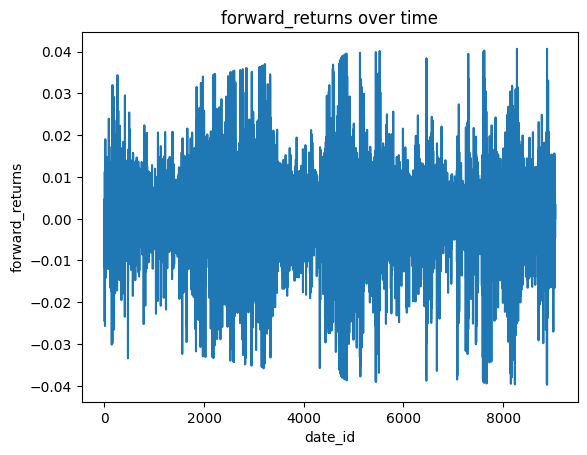

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


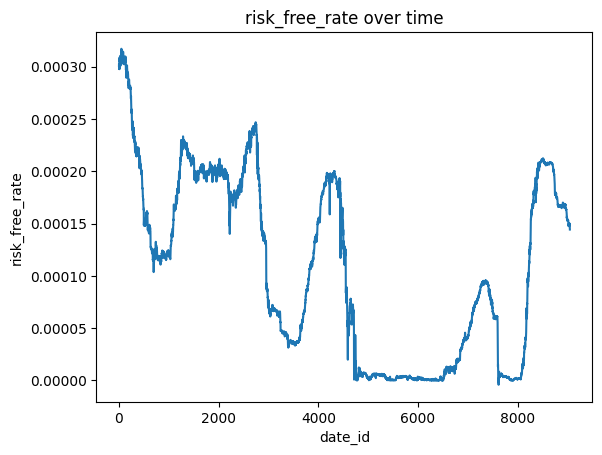

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


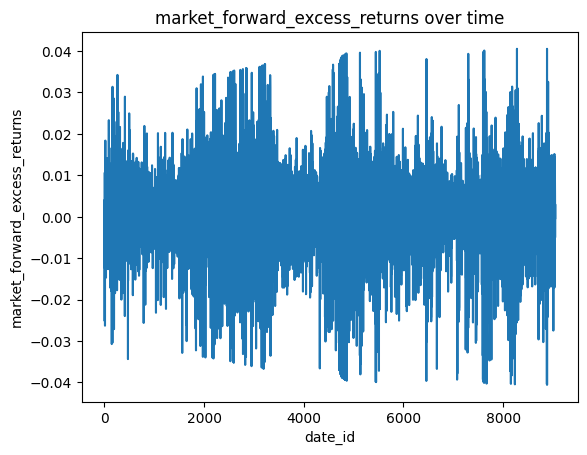

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
temp = ["forward_returns",	"risk_free_rate",	"market_forward_excess_returns"]
for col in temp:
    sns.lineplot(x="date_id", y=col, data=df_train)
    plt.title(f"{col} over time")
    plt.show()

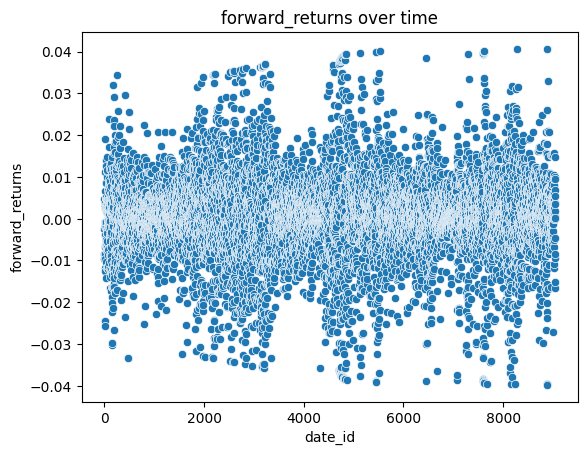

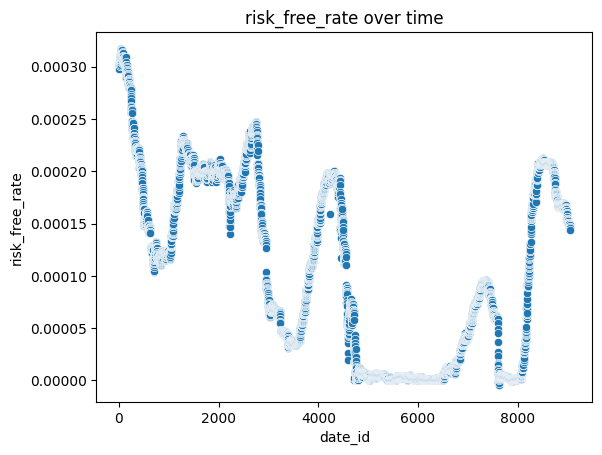

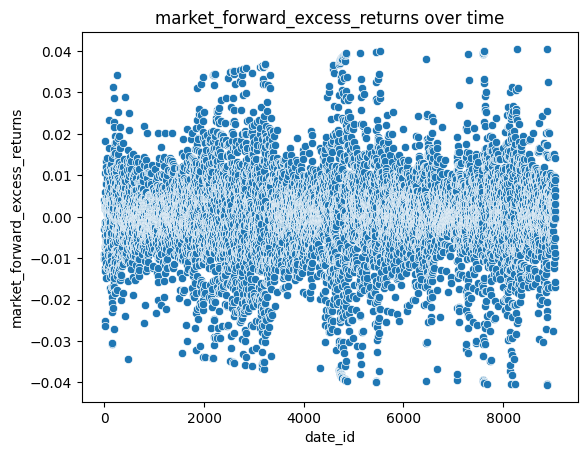

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
temp = ["forward_returns",	"risk_free_rate",	"market_forward_excess_returns"]
for col in temp:
    sns.scatterplot(x="date_id", y=col, data=df_train)
    plt.title(f"{col} over time")
    plt.show()

## Interpretation:
##### Excess returns is pure noise with no obvious trends, patterns. So, we will rely on feature engineering more than the modeling phase.

In [12]:
pd.set_option('display.max_rows', None)
missing_data = df_train.isnull().sum()
missing_data

date_id                             0
D1                                  0
D2                                  0
D3                                  0
D4                                  0
D5                                  0
D6                                  0
D7                                  0
D8                                  0
D9                                  0
E1                               1784
E10                              1006
E11                              1006
E12                              1006
E13                              1006
E14                              1006
E15                              1006
E16                              1006
E17                              1006
E18                              1006
E19                              1006
E2                               1006
E20                              1616
E3                               1006
E4                               1006
E5                               1006
E6          

# Train-Test Split:
##### Last 180 rows are reserved for test data. Everything else is in train data
##### Update: This training pipeline is for submission file. So, will be using complete training dataset. 

In [13]:
src_data = df_train
#df_train = src_data.iloc[0:-360, :].copy()
df_train = df_train
df_test = src_data.iloc[-360:, :].copy()

In [14]:
print("Shape of Train set:", df_train.shape, "Shape of Test set:", df_test.shape)

Shape of Train set: (9048, 98) Shape of Test set: (360, 98)


# FEATURE ENGINEERING

### Missing Flag Columns:
In finance, missing values often indicate some extraordinary events technological shifts or government regulations. So, missing flag columns are created to extract some valuable information out.

In [15]:
added_columns = []
for col in df_train.columns:
    if df_train[col].isna().sum() > 0:
        added_columns.append(col)
        df_train[col + "_missing"] = df_train[col].isna().astype(int)

for col in added_columns:
    df_test[col + "_missing"] = df_test[col].isna().astype(int)
        
df_train = df_train.ffill().bfill()
df_test = df_test.ffill().bfill()

In [16]:
print("Shape of Train set:", df_train.shape, "Shape of Test set:", df_test.shape)

Shape of Train set: (9048, 183) Shape of Test set: (360, 183)


Missing values removed

In [17]:
pd.set_option('display.max_rows', None)
missing_data = df_train.isnull().sum()
missing_data

date_id                          0
D1                               0
D2                               0
D3                               0
D4                               0
D5                               0
D6                               0
D7                               0
D8                               0
D9                               0
E1                               0
E10                              0
E11                              0
E12                              0
E13                              0
E14                              0
E15                              0
E16                              0
E17                              0
E18                              0
E19                              0
E2                               0
E20                              0
E3                               0
E4                               0
E5                               0
E6                               0
E7                               0
E8                  

In [18]:
pd.set_option('display.max_columns', None)
df_train.head(50)

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11  \
0         0   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
1         1   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
2         2   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053   
3         3   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
4         4   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
5         5   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
6         6   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
7         7   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
8         8   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
9         9   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
10       10   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
11       11   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
12       12   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
13       13   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
14       14   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
15       15   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
16       16   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
17       17   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
18       18   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
19       19   0   0   0   1   0   0   0   1   0  2.337132  0.597222  0.035053   
20       20   0   0   0   1   1   0   0   1   0  2.337132  0.597222  0.035053   
21       21   0   0   0   1   1   0   0   1   0  2.337132  0.597222  0.035053   
22       22   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
23       23   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
24       24   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053   
25       25   1   1   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
26       26   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
27       27   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
28       28   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
29       29   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
30       30   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
31       31   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
32       32   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
33       33   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
34       34   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
35       35   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
36       36   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
37       37   0   0   0   1   0  -1   0   0   0  2.337132  0.597222  0.035053   
38       38   0   0   0   1   0   0   0   1   0  2.337132  0.597222  0.035053   
39       39   0   0   0   1   1   0   0   1   0  2.337132  0.597222  0.035053   
40       40   0   0   0   1   1   0   0   1   0  2.337132  0.597222  0.035053   
41       41   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
42       42   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
43       43   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053   
44       44   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
45       45   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
46       46   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
47       47   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
48       48   0   0   0   1   0   0

# Moving Averages

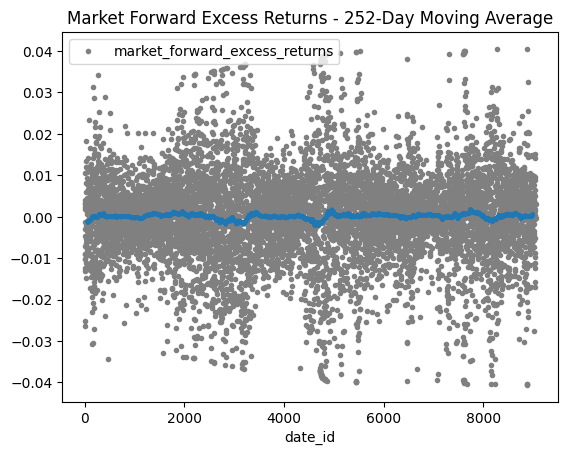

In [19]:
date_target = df_train[["date_id", "market_forward_excess_returns"]]
date_target = date_target.set_index("date_id")

date_target_test = df_test[["date_id", "market_forward_excess_returns"]]
date_target_test = date_target_test.set_index("date_id")

moving_average = date_target.rolling(
    window=252,
    center=True,
    min_periods=183,
).mean()

ax = date_target.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Market Forward Excess Returns - 252-Day Moving Average", legend=False,
);

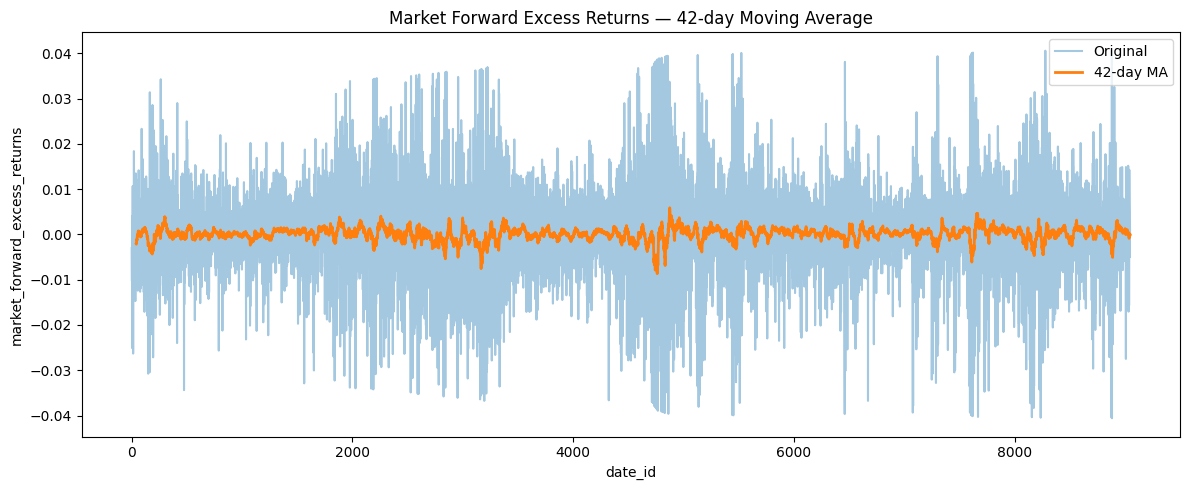

In [20]:
date_target["ma_42"] = (
    date_target["market_forward_excess_returns"]
    .rolling(42)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["ma_42"], 
         label="42-day MA", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — 42-day Moving Average")
plt.legend()
plt.tight_layout()

plt.show()

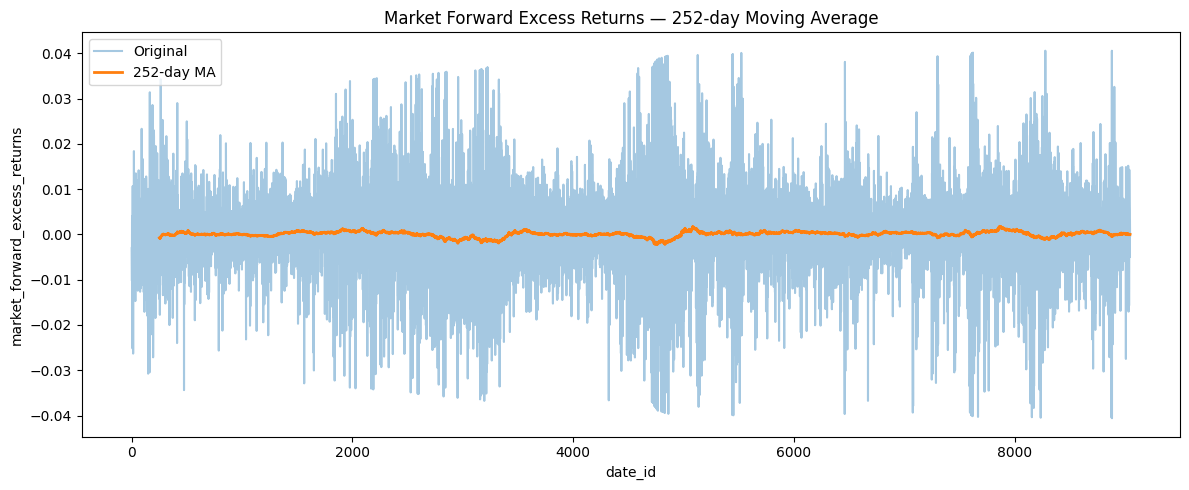

In [21]:
date_target["ma_year"] = (
    date_target["market_forward_excess_returns"]
    .rolling(252)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["ma_year"], 
         label="252-day MA", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — 252-day Moving Average")
plt.legend()
plt.tight_layout()

plt.show()

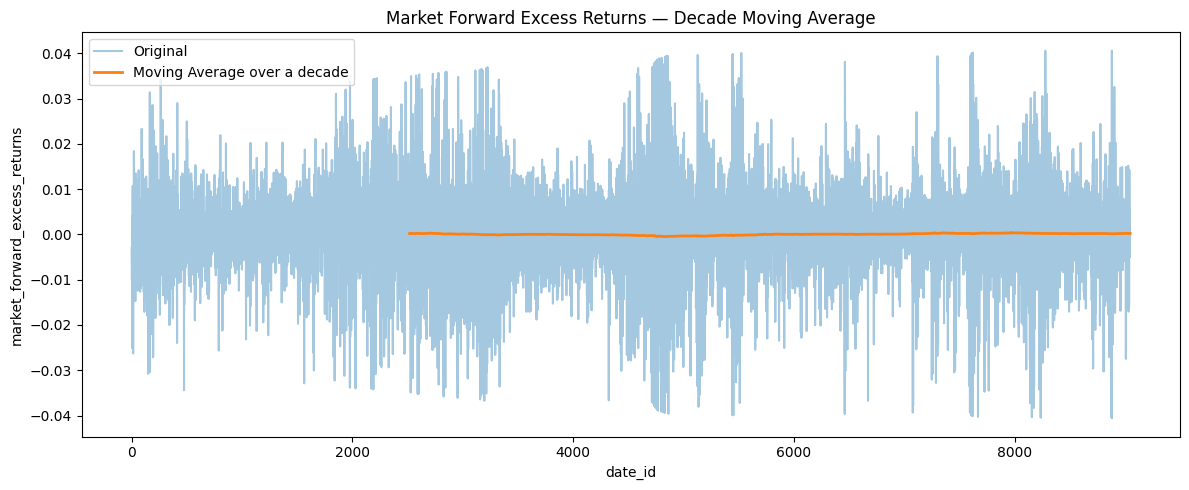

In [22]:
date_target["ma_decade"] = (
    date_target["market_forward_excess_returns"]
    .rolling(252*10)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["ma_decade"], 
         label="Moving Average over a decade", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — Decade Moving Average")
plt.legend()
plt.tight_layout()

plt.show()

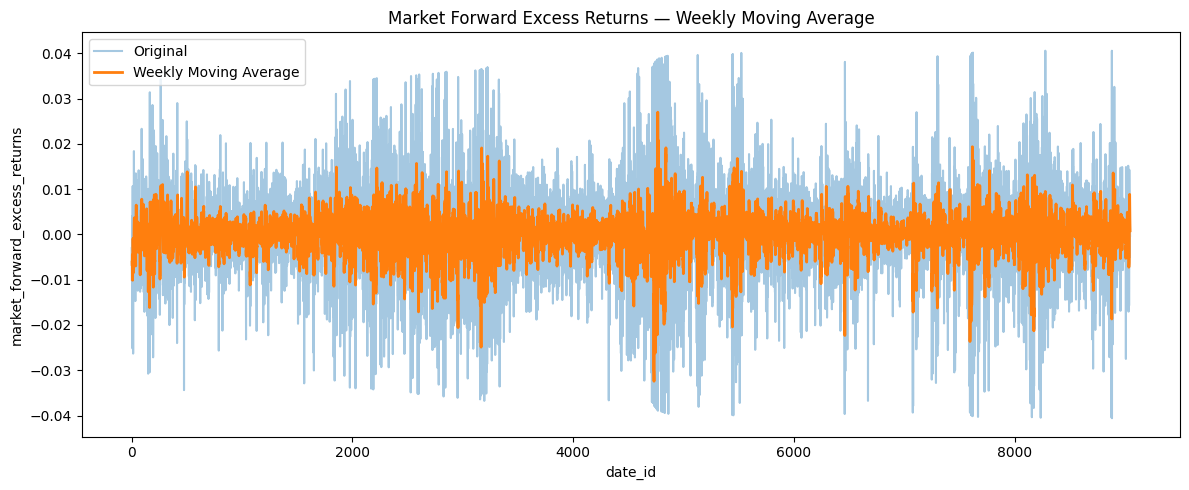

In [23]:
date_target["ma_weekly"] = (
    date_target["market_forward_excess_returns"]
    .rolling(5)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["ma_weekly"], 
         label="Weekly Moving Average", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — Weekly Moving Average")
plt.legend()
plt.tight_layout()

plt.show()

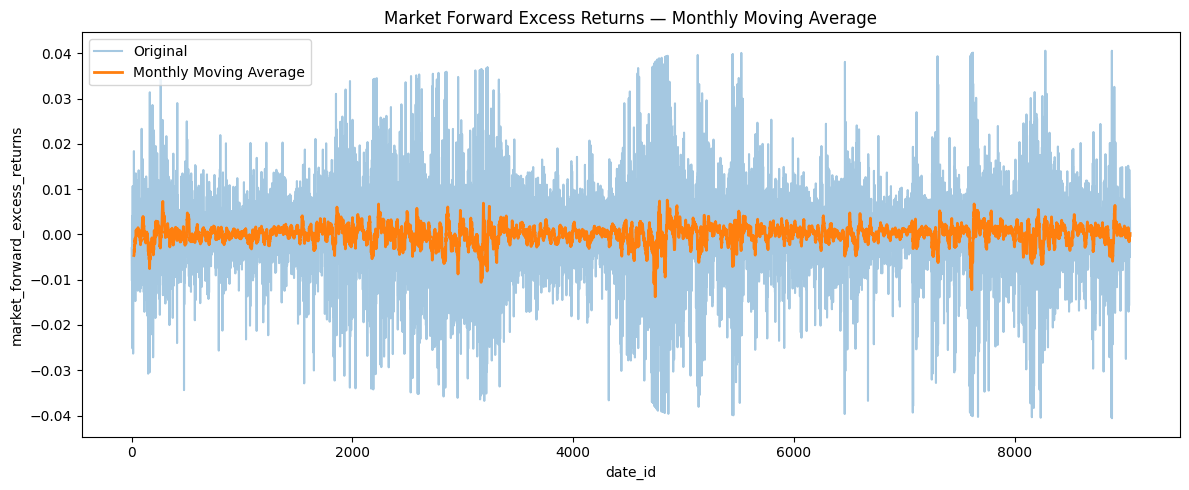

In [24]:
date_target["ma_monthly"] = (
    date_target["market_forward_excess_returns"]
    .rolling(21)
    .mean()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["ma_monthly"], 
         label="Monthly Moving Average", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — Monthly Moving Average")
plt.legend()
plt.tight_layout()

plt.show()

### Interpretation: 
Moving averages does not show any meaningful trend that could be exploited. This is because the competition target intentionally removes low-frequency trends and extreme tail events to ensure that models focus on predicting unexpected, conditional return components rather than exploiting persistent drift or regime effects.

# Lag

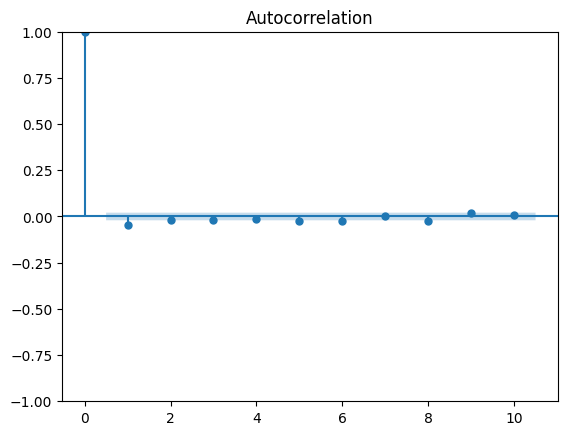

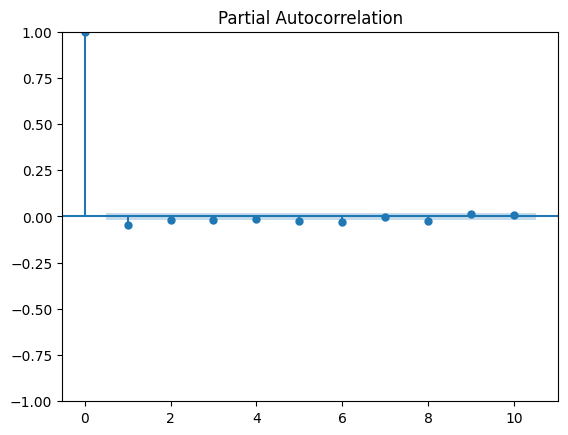

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(date_target["market_forward_excess_returns"].dropna(), lags=10);
plot_pacf(date_target["market_forward_excess_returns"].dropna(), lags=10);


### Interpretation:
The PACF indicates that the first lag (one trading day) exhibits statistically significant partial autocorrelation, suggesting that it may contain predictive information and is therefore included as a model feature.

# Moving Volatility

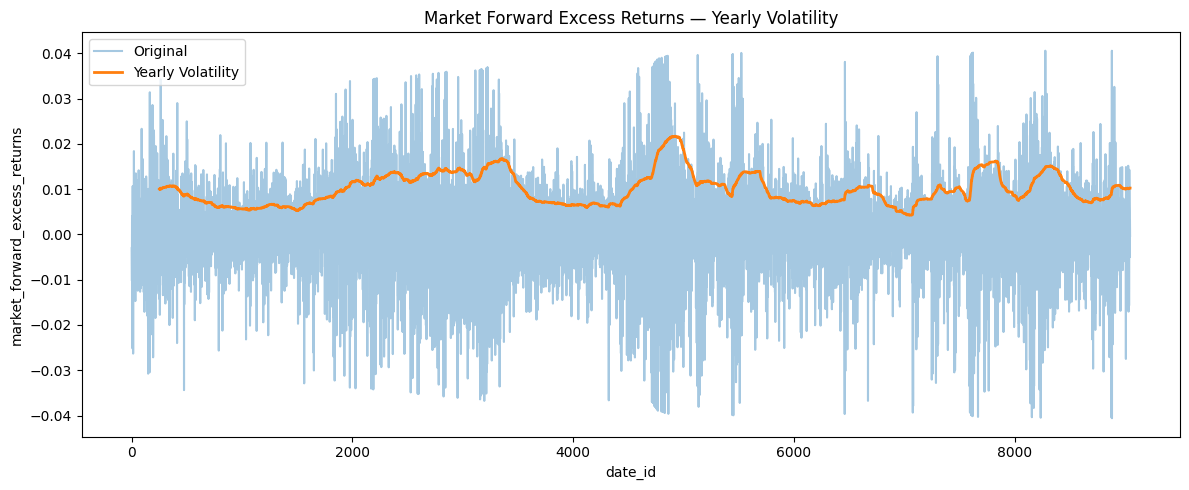

In [26]:
date_target["volatility_year"] = (
    date_target["market_forward_excess_returns"]
    .rolling(12*21)
    .std()
)

plt.figure(figsize=(12, 5))

plt.plot(date_target.index, 
         date_target["market_forward_excess_returns"], 
         label="Original", 
         alpha=0.4)

plt.plot(date_target.index, 
         date_target["volatility_year"], 
         label="Yearly Volatility", 
         linewidth=2)

plt.xlabel("date_id")
plt.ylabel("market_forward_excess_returns")
plt.title("Market Forward Excess Returns — Yearly Volatility")
plt.legend()
plt.tight_layout()

plt.show()

In [27]:
window_sizes = [5, 21, 63, 126]
for w in window_sizes:
    date_target[f"volatility_{w}"] = (
        date_target["market_forward_excess_returns"]
        .rolling(w)
        .std()
    )

for w in window_sizes:
    date_target_test[f"volatility_{w}"] = (
        date_target_test["market_forward_excess_returns"]
        .rolling(w)
        .std()
    )



In [28]:
# Generalized function (I didn't thought it before)
def plot_time_series_curve(dataframe, column_to_plot):
    plt.figure(figsize=(12, 5))
    
    plt.plot(dataframe.index, 
             dataframe["market_forward_excess_returns"], 
             label="Original", 
             alpha=0.4)
    
    plt.plot(dataframe.index, 
             dataframe[column_to_plot], 
             label=column_to_plot, 
             linewidth=2)
    
    plt.xlabel("date_id")
    plt.ylabel("market_forward_excess_returns")
    plt.title(f"Market Forward Excess Returns — {column_to_plot} Days")
    plt.legend()
    plt.tight_layout()
    
    plt.show()

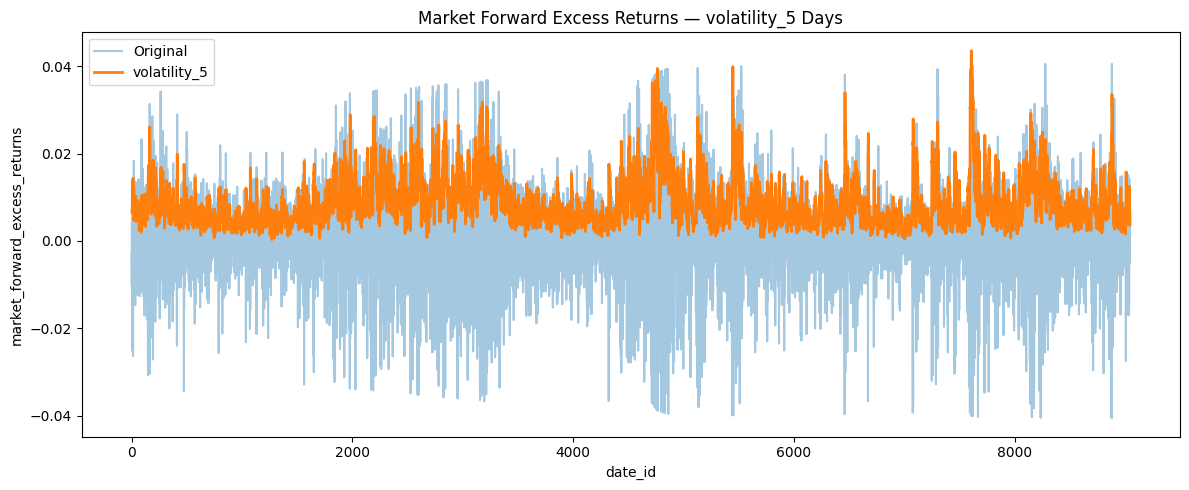

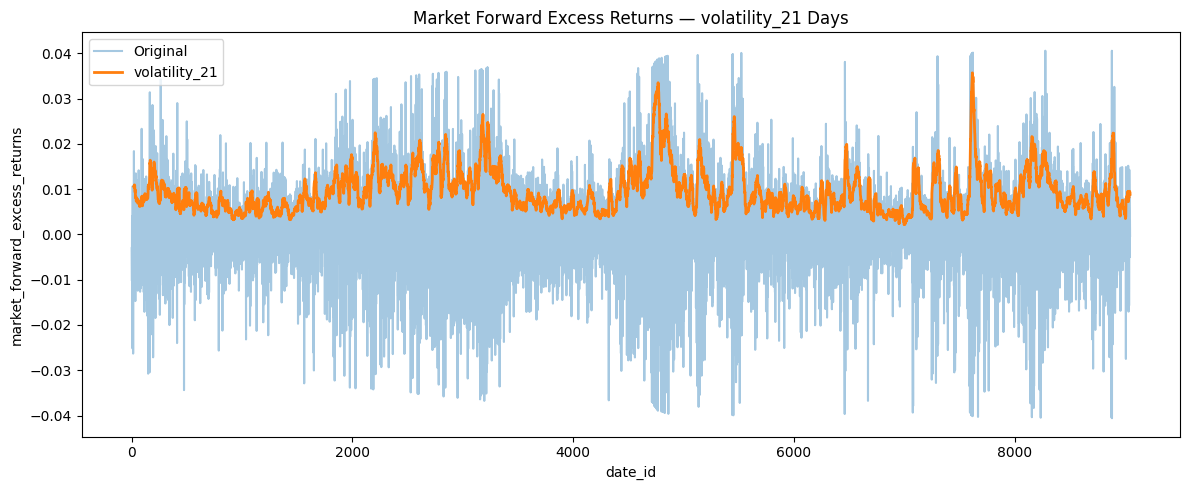

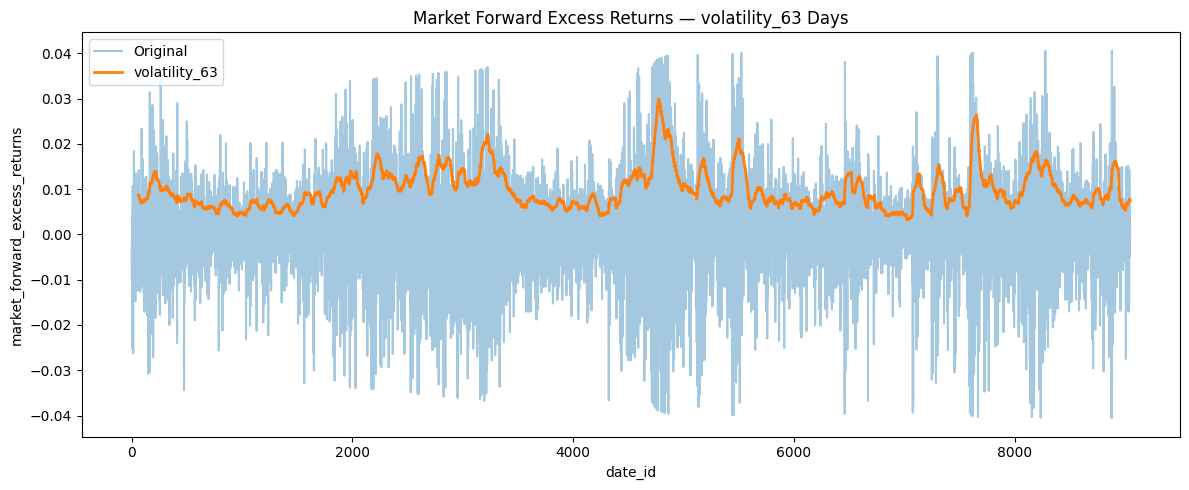

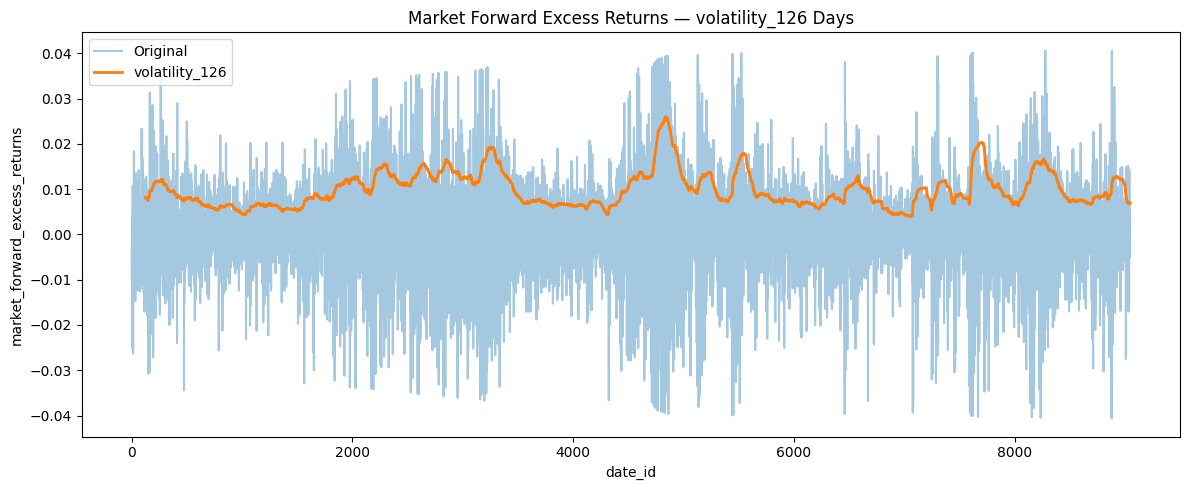

In [29]:
for w in window_sizes:
    plot_time_series_curve(date_target, f"volatility_{w}")

### Interpretation:
Market dynamics often alternate between high and low activity regimes. Although price returns themselves are noisy, volatility tends to cluster over time, revealing persistent patterns that may be leveraged after appropriate noise reduction

In [30]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram

    # Samples per year = 252 trading days OR 365 calendar days
    fs = 252 

    freq, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling="spectrum",
    )

    if ax is None:
        _, ax = plt.subplots(figsize=(12, 4))

    ax.step(freq, spectrum, color="purple")
    ax.set_xscale("log")

    # Frequencies are in cycles per year now
    xticks = [
        1/252,   # annual
        2/252,   # 2 cycles/year
        4/252,
        6/252,
        12/252,  # monthly
        26/252,
        52/252,  # weekly
        104/252,
    ]

    labels = [
        "Annual (1)",
        "Semiannual (2)",
        "Quarterly (4)",
        "Bimonthly (6)",
        "Monthly (12)",
        "Biweekly (26)",
        "Weekly (52)",
        "Semiweekly (104)",
    ]

    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, rotation=30)

    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

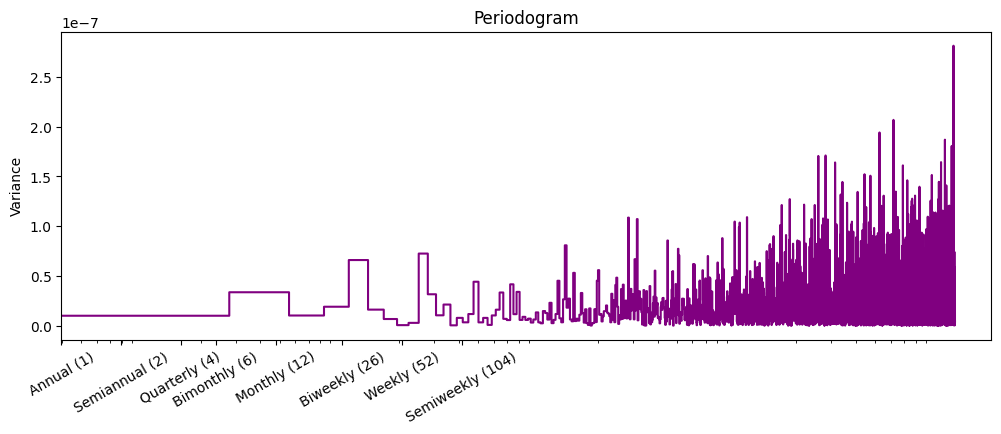

In [31]:
plot_periodogram(date_target['market_forward_excess_returns'])

### Interpretation:
The periodogram suggests the presence of recurring components at approximately weekly and biweekly frequencies.

# Fourier Feature:
Fourier features are created as to remove noise from raw volatilities and create a generalizable trend that will be beneficial for sequential models. 

In [32]:
def plot_fourier_curve(dataframe, raw_volatility, fourier_volatility):
    plt.figure(figsize=(12, 5))
    
    plt.plot(dataframe.index, 
             dataframe["market_forward_excess_returns"], 
             label="Original", 
             alpha=0.4)
    
    plt.plot(dataframe.index, 
             dataframe[raw_volatility], 
             label=raw_volatility, 
             linewidth=2)

    plt.plot(dataframe.index, 
         dataframe[fourier_volatility], 
         label=fourier_volatility, 
         linewidth=2)

    plt.xlabel("date_id")
    plt.ylabel("market_forward_excess_returns")
    plt.title(f"Market Forward Excess Returns — {raw_volatility} Days")
    plt.legend()
    plt.tight_layout()
    
    plt.show()

In [33]:
def add_fourier_terms(df, index_col, periods, K=3, prefix="fourier"):
    """
    df: dataframe
    index_col: column containing trading day index (or use df.index)
    periods: dict of name -> period_length, e.g. {"weekly": 5, "monthly": 21}
    K: number of harmonics
    """
    t = df[index_col].values if index_col in df else df.index.values

    for name, P in periods.items():
        for k in range(1, K + 1):
            df[f"{prefix}_{name}_sin_{k}"] = np.sin(2 * np.pi * k * t / P)
            df[f"{prefix}_{name}_cos_{k}"] = np.cos(2 * np.pi * k * t / P)

    return df

In [34]:
fourier_target = date_target.copy()
fourier_target_test = date_target_test.copy()


In [35]:
fourier_target.tail()

market_forward_excess_returns     ma_42   ma_year  ma_decade  \
date_id                                                                 
9043                          0.004998  0.000131  0.000035   0.000206   
9044                         -0.005024 -0.000059 -0.000003   0.000202   
9045                          0.001395 -0.000042  0.000016   0.000203   
9046                          0.003006  0.000041  0.000005   0.000204   
9047                         -0.000339 -0.000041 -0.000001   0.000204   

         ma_weekly  ma_monthly  volatility_year  volatility_5  volatility_21  \
date_id                                                                        
9043      0.008830   -0.000696         0.010236      0.003546       0.009523   
9044      0.005925   -0.000389         0.010236      0.007064       0.009259   
9045      0.003352   -0.000457         0.010234      0.005422       0.009240   
9046      0.002164   -0.000381         0.010230      0.004454       0.009262   
9047      0.000807    0.000189         0.010229      0.003810       0.008850   

         volatility_63  volatility_126  
date_id                                 
9043          0.007719        0.006914  
9044          0.007677        0.006922  
9045          0.007657        0.006910  
9046          0.007605        0.006912  
9047          0.007591        0.006892

In [36]:
total_len = len(fourier_target)
periods = {
    "weekly": 5,
    "monthly": 21,
    "yearly": 252,
    "cycle_1": total_len,      # One full wave over the whole history
    "cycle_2": total_len / 2,  # Two waves over the whole history
    "cycle_5": total_len / 5   # Five waves (good for capturing those 5-6 big spikes)
}
fourier_target["t"] = fourier_target.index

fourier_target = add_fourier_terms(
    df=fourier_target,
    index_col="t",
    periods=periods,
    K=3,               
    prefix="fourier"        # prefix for "Fourier Trend"
)


In [37]:
from sklearn.linear_model import LinearRegression
macro_cols = [c for c in fourier_target.columns if "cycle" in c or "yearly" in c]
mask = ~fourier_target["volatility_21"].isna()
mask = mask & ~fourier_target[macro_cols].isna().any(axis=1)  

model = LinearRegression()
model.fit(fourier_target.loc[mask, macro_cols], fourier_target.loc[mask, "volatility_21"])
fourier_target["vol_fourier_trend"] = model.predict(fourier_target[macro_cols])


In [38]:
last_train_index = fourier_target.index[-1]

fourier_target_test['t'] = fourier_target_test.index

fourier_target_test = add_fourier_terms(
    df=fourier_target_test,
    index_col="t",
    periods=periods, 
    K=3,
    prefix="fourier"
)


macro_cols = [c for c in fourier_target_test.columns if any(p in c for p in ["cycle", "yearly"])]

fourier_target_test["vol_fourier_trend"] = model.predict(fourier_target_test[macro_cols])

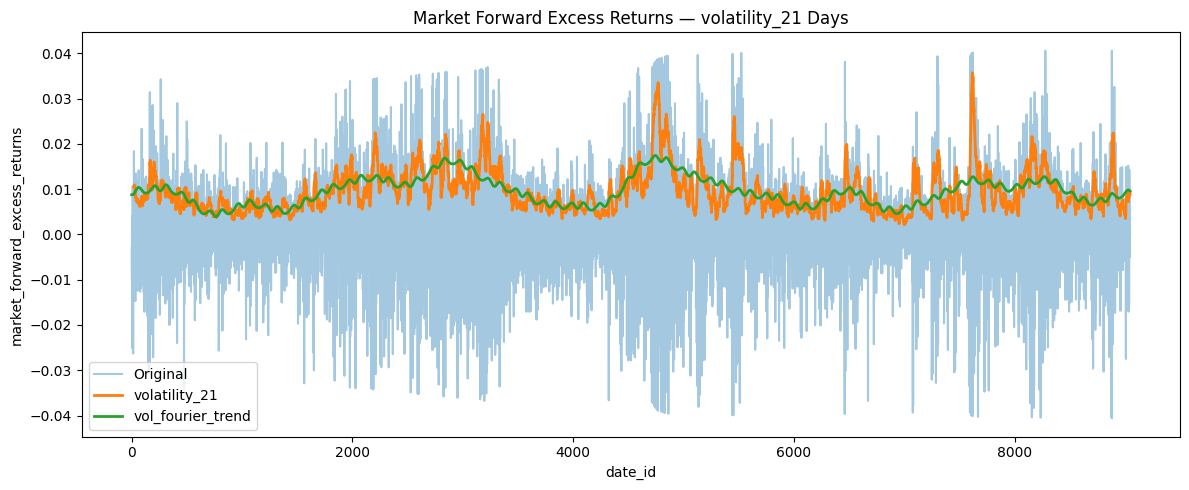

In [39]:
plot_fourier_curve(fourier_target, "volatility_21", "vol_fourier_trend")

### Interpretation:
A generalizable Fourier curve is obtained by fitting sinusoidal basis functions to the raw volatility using linear regression, yielding a smoothed approximation of the underlying volatility dynamics.

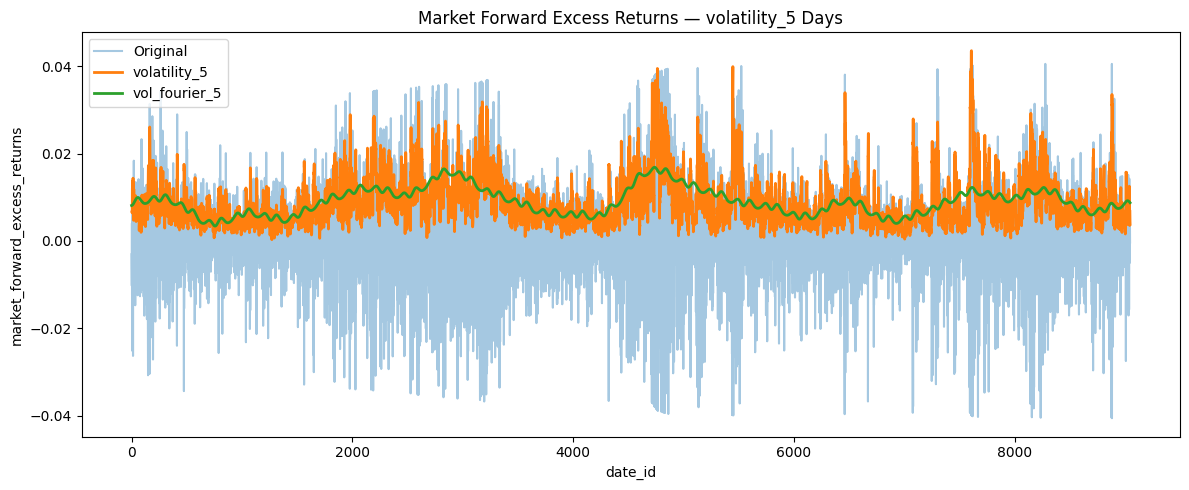

In [40]:
macro_cols = [c for c in fourier_target.columns if "cycle" in c or "yearly" in c]
mask = ~fourier_target["volatility_5"].isna()
mask = mask & ~fourier_target[macro_cols].isna().any(axis=1)  

model = LinearRegression()
model.fit(fourier_target.loc[mask, macro_cols], fourier_target.loc[mask, "volatility_5"])
fourier_target["vol_fourier_5"] = model.predict(fourier_target[macro_cols])

plot_fourier_curve(fourier_target, "volatility_5", "vol_fourier_5")

In [41]:
macro_cols = [c for c in fourier_target_test.columns if any(p in c for p in ["cycle", "yearly"])]

fourier_target_test["vol_fourier_5"] = model.predict(fourier_target_test[macro_cols])

In [42]:
df_train.tail()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10  \
9043     9043   0   0   0   1   1   0   0   1   0  1.434993  0.300595   
9044     9044   0   0   0   1   1   0   0   1   0  1.432918  0.300265   
9045     9045   0   0   0   1   1   0   0   0   1  1.430848  0.299934   
9046     9046   0   0   0   1   1   0   0   0   1  1.428784  0.299603   
9047     9047   0   0   0   1   0   0   0   0   1  1.426724  0.299272   

           E11       E12       E13       E14       E15       E16       E17  \
9043  0.001653  0.001653  0.001653  0.001653  0.943783 -0.325789 -0.576835   
9044  0.001323  0.001323  0.001323  0.001323  0.950397 -0.325815 -0.576901   
9045  0.000992  0.000992  0.000992  0.000992  0.950728 -0.558892 -0.669792   
9046  0.000661  0.000661  0.000661  0.000661  0.951058 -0.558728 -0.669774   
9047  0.006614  0.006614  0.006614  0.006614  0.951389 -0.558563 -0.669756   

           E18       E19        E2       E20        E3        E4        E5  \
9043 -0.181773 -0.336484  1.379103  1.705453  1.783608  0.046958  0.549934   
9044 -0.182374 -0.914223  1.426299  1.702654  1.833289  0.046627  0.549603   
9045 -0.150182 -0.518010  1.369694  1.699799  1.772236  0.046296  0.549272   
9046 -0.150795 -0.257640  1.388816  1.696990  1.791988  0.045966  0.548942   
9047 -0.151409 -0.524694  1.412991  1.695611  1.817066  0.045635  0.548611   

            E6        E7        E8        E9        I1        I2        I3  \
9043  0.015542  0.101432 -0.330159  0.941138  0.346892  0.774224  0.089947   
9044  0.015212  0.101231 -0.330149  0.941468  0.346561  0.755745  0.087963   
9045  0.014881  0.100751 -0.330138  0.941799  0.342262  0.772152  0.090939   
9046  0.014550  0.100551 -0.330127  0.942130  0.320106  0.832127  0.091270   
9047  0.014220  0.099657 -0.330117  0.942460  0.307540  0.813581  0.092593   

            I4        I5        I6        I7        I8        I9        M1  \
9043  0.398148  0.486642  0.677910  0.339286  0.370370  0.484299 -1.125047   
9044  0.397817  0.460221  0.669312  0.338294  0.376984  0.464592 -1.137117   
9045  0.397487  0.457736  0.669312  0.332672  0.372354  0.451041 -1.076542   
9046  0.397156  0.447436  0.666667  0.331349  0.365741  0.438710 -1.109149   
9047  0.396825  0.429788  0.669312  0.333995  0.373677  0.421727 -1.154207   

           M10       M11       M12       M13       M14       M15       M16  \
9043 -0.815917  0.108115  0.092563 -1.135833 -0.697549  0.640212  0.456349   
9044 -0.725354  0.072177  0.149743 -1.145635 -0.697749  0.645503  0.404101   
9045 -0.691466  0.008513  0.200205 -1.159545 -0.697692  0.647156  0.314815   
9046 -0.687855  0.061719  0.229847 -1.165766 -0.696622  0.661376  0.291005   
9047 -0.669349  0.047801  0.199678 -1.176066 -0.696423  0.664352  0.263889   

           M17       M18        M2        M3        M4        M5        M6  \
9043  0.224868  0.185847 -1.249984  0.974317  0.566699  1.841539 -0.365179   
9044  0.224537  0.185516 -0.887531  0.219565  1.078439  1.600329 -0.755566   
9045  0.236111  0.185185  1.040018  0.794786  0.926673  0.256945 -0.255815   
9046  0.232804  0.184854  0.202053  0.709835  1.030717  1.821387 -0.310917   
9047  0.227183  0.184524 -1.085864  0.746487  0.802818  1.748835 -0.291522   

            M7        M8        M9        P1       P10       P11       P12  \
9043 -0.086850  0.693783  0.285293  0.427910  2.128138  2.256488 -0.708674   
9044 -0.087520  0.566138  0.309127  0.442460  2.149090  2.290269 -0.707988   
9045 -0.088191  0.527778  0.280041  0.465278  2.120745  2.245673 -0.707302   
9046 -0.088861  0.667328  0.292503  0.473214  2.120585  2.254884 -0.200284   
9047 -0.089533  0.490079  0.307960  0.487434  2.130543  2.278716 -0.453769   

           P13        P2        P3        P4        P5        P6        P7  \
9043  0.616402 -1.483122  0.045635  0.412368  0.319328 -0.398645  1.514824   
9044  0.323413 -1.509612  0.153108  0.477183  0.595838 -0.453730  0.841733   
9045  0.459325 -1.467578  0.955688  0.066138  0.13

In [43]:
fourier_target.tail()

market_forward_excess_returns     ma_42   ma_year  ma_decade  \
date_id                                                                 
9043                          0.004998  0.000131  0.000035   0.000206   
9044                         -0.005024 -0.000059 -0.000003   0.000202   
9045                          0.001395 -0.000042  0.000016   0.000203   
9046                          0.003006  0.000041  0.000005   0.000204   
9047                         -0.000339 -0.000041 -0.000001   0.000204   

         ma_weekly  ma_monthly  volatility_year  volatility_5  volatility_21  \
date_id                                                                        
9043      0.008830   -0.000696         0.010236      0.003546       0.009523   
9044      0.005925   -0.000389         0.010236      0.007064       0.009259   
9045      0.003352   -0.000457         0.010234      0.005422       0.009240   
9046      0.002164   -0.000381         0.010230      0.004454       0.009262   
9047      0.000807    0.000189         0.010229      0.003810       0.008850   

         volatility_63  volatility_126     t  fourier_weekly_sin_1  \
date_id                                                              
9043          0.007719        0.006914  9043         -5.877853e-01   
9044          0.007677        0.006922  9044         -9.510565e-01   
9045          0.007657        0.006910  9045         -1.233330e-13   
9046          0.007605        0.006912  9046          9.510565e-01   
9047          0.007591        0.006892  9047          5.877853e-01   

         fourier_weekly_cos_1  fourier_weekly_sin_2  fourier_weekly_cos_2  \
date_id                                                                     
9043                -0.809017          9.510565e-01              0.309017   
9044                 0.309017         -5.877853e-01             -0.809017   
9045                 1.000000         -2.466660e-13              1.000000   
9046                 0.309017          5.877853e-01             -0.809017   
9047                -0.809017         -9.510565e-01              0.309017   

         fourier_weekly_sin_3  fourier_weekly_cos_3  fourier_monthly_sin_1  \
date_id                                                                      
9043            -9.510565e-01              0.309017              -0.680173   
9044             5.877853e-01             -0.809017              -0.866025   
9045             1.448990e-12              1.000000              -0.974928   
9046            -5.877853e-01             -0.809017              -0.997204   
9047             9.510565e-01              0.309017              -0.930874   

         fourier_monthly_cos_1  fourier_monthly_sin_2  fourier_monthly_cos_2  \
date_id                                                                        
9043                 -0.733052               0.997204               0.074730   
9044                 -0.500000               0.866025              -0.500000   
9045                 -0.222521               0.433884              -0.900969   
9046                  0.074730              -0.149042              -0.988831   
9047                  0.365341              -0.680173              -0.733052   

         fourier_monthly_sin_3  fourier_monthly_cos_3  fourier_yearly_sin_1  \
date_id                                                                       
9043             -7.818315e-01               0.623490             -0.661686   
9044             -5.722441e-13               1.000000             -0.642788   
9045              7.818315e-01               0.623490             -0.623490   
9046              9.749279e-01              -0.222521             -0.603804   
9047              4.338837e-01              -0.900969             -0.583744   

         fourier_yearly_cos_1  fourier_yearly_sin_2  fourier_yearly_cos_2  \
date_id                                                                     
9043                 0.749781             -0.992239              0.124344   
9044        

In [44]:
fourier_target = fourier_target.reset_index().rename(columns={"index": "date_id"})
fourier_target_test = fourier_target_test.reset_index().rename(columns={"index": "date_id"})



df_train = df_train.merge(
    fourier_target[['date_id','vol_fourier_trend', 'vol_fourier_5']],
    on="date_id",
    how="left"
)

df_test = df_test.merge(
    fourier_target_test[['date_id', 'vol_fourier_trend', 'vol_fourier_5']],
    on="date_id",
    how="left"
)


print(df_train.shape)
print(df_test.shape)

(9048, 185)
(360, 185)


In [45]:
df_test.tail()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10  \
355     9043   0   0   0   1   1   0   0   1   0  1.434993  0.300595   
356     9044   0   0   0   1   1   0   0   1   0  1.432918  0.300265   
357     9045   0   0   0   1   1   0   0   0   1  1.430848  0.299934   
358     9046   0   0   0   1   1   0   0   0   1  1.428784  0.299603   
359     9047   0   0   0   1   0   0   0   0   1  1.426724  0.299272   

          E11       E12       E13       E14       E15       E16       E17  \
355  0.001653  0.001653  0.001653  0.001653  0.943783 -0.325789 -0.576835   
356  0.001323  0.001323  0.001323  0.001323  0.950397 -0.325815 -0.576901   
357  0.000992  0.000992  0.000992  0.000992  0.950728 -0.558892 -0.669792   
358  0.000661  0.000661  0.000661  0.000661  0.951058 -0.558728 -0.669774   
359  0.006614  0.006614  0.006614  0.006614  0.951389 -0.558563 -0.669756   

          E18       E19        E2       E20        E3        E4        E5  \
355 -0.181773 -0.336484  1.379103  1.705453  1.783608  0.046958  0.549934   
356 -0.182374 -0.914223  1.426299  1.702654  1.833289  0.046627  0.549603   
357 -0.150182 -0.518010  1.369694  1.699799  1.772236  0.046296  0.549272   
358 -0.150795 -0.257640  1.388816  1.696990  1.791988  0.045966  0.548942   
359 -0.151409 -0.524694  1.412991  1.695611  1.817066  0.045635  0.548611   

           E6        E7        E8        E9        I1        I2        I3  \
355  0.015542  0.101432 -0.330159  0.941138  0.346892  0.774224  0.089947   
356  0.015212  0.101231 -0.330149  0.941468  0.346561  0.755745  0.087963   
357  0.014881  0.100751 -0.330138  0.941799  0.342262  0.772152  0.090939   
358  0.014550  0.100551 -0.330127  0.942130  0.320106  0.832127  0.091270   
359  0.014220  0.099657 -0.330117  0.942460  0.307540  0.813581  0.092593   

           I4        I5        I6        I7        I8        I9        M1  \
355  0.398148  0.486642  0.677910  0.339286  0.370370  0.484299 -1.125047   
356  0.397817  0.460221  0.669312  0.338294  0.376984  0.464592 -1.137117   
357  0.397487  0.457736  0.669312  0.332672  0.372354  0.451041 -1.076542   
358  0.397156  0.447436  0.666667  0.331349  0.365741  0.438710 -1.109149   
359  0.396825  0.429788  0.669312  0.333995  0.373677  0.421727 -1.154207   

          M10       M11       M12       M13       M14       M15       M16  \
355 -0.815917  0.108115  0.092563 -1.135833 -0.697549  0.640212  0.456349   
356 -0.725354  0.072177  0.149743 -1.145635 -0.697749  0.645503  0.404101   
357 -0.691466  0.008513  0.200205 -1.159545 -0.697692  0.647156  0.314815   
358 -0.687855  0.061719  0.229847 -1.165766 -0.696622  0.661376  0.291005   
359 -0.669349  0.047801  0.199678 -1.176066 -0.696423  0.664352  0.263889   

          M17       M18        M2        M3        M4        M5        M6  \
355  0.224868  0.185847 -1.249984  0.974317  0.566699  1.841539 -0.365179   
356  0.224537  0.185516 -0.887531  0.219565  1.078439  1.600329 -0.755566   
357  0.236111  0.185185  1.040018  0.794786  0.926673  0.256945 -0.255815   
358  0.232804  0.184854  0.202053  0.709835  1.030717  1.821387 -0.310917   
359  0.227183  0.184524 -1.085864  0.746487  0.802818  1.748835 -0.291522   

           M7        M8        M9        P1       P10       P11       P12  \
355 -0.086850  0.693783  0.285293  0.427910  2.128138  2.256488 -0.708674   
356 -0.087520  0.566138  0.309127  0.442460  2.149090  2.290269 -0.707988   
357 -0.088191  0.527778  0.280041  0.465278  2.120745  2.245673 -0.707302   
358 -0.088861  0.667328  0.292503  0.473214  2.120585  2.254884 -0.200284   
359 -0.089533  0.490079  0.307960  0.487434  2.130543  2.278716 -0.453769   

          P13        P2        P3        P4        P5        P6        P7  \
355  0.616402 -1.483122  0.045635  0.412368  0.319328 -0.398645  1.514824   
356  0.323413 -1.509612  0.153108  0.477183  0.595838 -0.453730  0.841733   
357  0.459325 -1.467578  0.955688  0.066138  0.133734 -0.490300 -0.714037   
358  0.802249 -1.509324

### Creating Lag Features:
Lagged features are constructed for forward returns, excess returns, and the risk-free rate, and their correlations are subsequently examined.

In [46]:
df_train["lagged_market_forward_excess_returns"] = df_train["market_forward_excess_returns"].shift(1)
df_train[["market_forward_excess_returns", "lagged_market_forward_excess_returns"]].head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


market_forward_excess_returns  lagged_market_forward_excess_returns
0                      -0.003038                                   NaN
1                      -0.009114                             -0.003038
2                      -0.010243                             -0.009114
3                       0.004046                             -0.010243
4                      -0.012301                              0.004046

<Axes: xlabel='lagged_market_forward_excess_returns', ylabel='market_forward_excess_returns'>

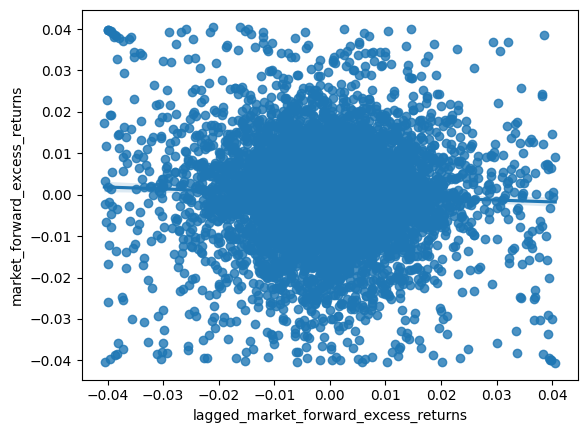

In [47]:
sns.regplot(x="lagged_market_forward_excess_returns", y="market_forward_excess_returns", data=df_train)

In [48]:
df_train["market_forward_excess_returns"].corr(
    df_train["market_forward_excess_returns"].shift(1)
)


-0.04478747215138458

### Interpretation:
Although the correlation is small (-0.04), it may still provide useful insights given the inherently noisy nature of excess returns.

In [49]:
df_train["lagged_forward_returns"] = df_train["forward_returns"].shift(1)
fr_corr = df_train["forward_returns"].corr(df_train['lagged_forward_returns'])
df_train["lagged_risk_free_rate"] = df_train["risk_free_rate"].shift(1)
rfr_corr = df_train["risk_free_rate"].corr(df_train["lagged_risk_free_rate"])

print("Correlation between Risk free rate and its lag", rfr_corr)
print("Correlation between Forward returns and its lag", fr_corr)

Correlation between Risk free rate and its lag 0.9997818824940329
Correlation between Forward returns and its lag -0.044555751863047936


<Axes: xlabel='lagged_risk_free_rate', ylabel='risk_free_rate'>

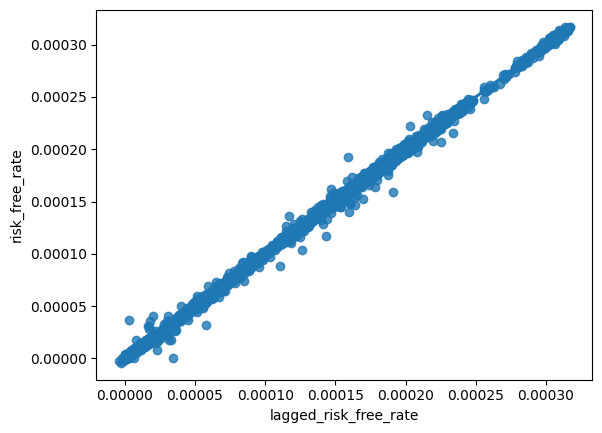

In [50]:
sns.regplot(x="lagged_risk_free_rate", y="risk_free_rate", data=df_train)

In [51]:
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11  \
0        0   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
1        1   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
2        2   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053   
3        3   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
4        4   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   

        E12       E13       E14       E15       E16       E17       E18  \
0  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
1  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
2  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
3  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
4  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   

        E19        E2       E20        E3        E4        E5        E6  \
0 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
1 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
2 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
3 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
4 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   

         E7       E8        E9        I1        I2        I3        I4  \
0  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
1  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
2  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
3  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
4  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   

         I5        I6        I7        I8        I9        M1       M10  \
0 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
1 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
2 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
3 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
4 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   

        M11      M12       M13       M14       M15       M16       M17  \
0 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
1 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
2 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
3 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
4 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   

        M18        M2        M3        M4        M5        M6        M7  \
0  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
1  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
2  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
3  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
4  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   

         M8        M9        P1       P10       P11       P12       P13  \
0  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
1  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
2  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
3  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
4  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   

         P2        P3        P4        P5        P6        P7        P8  \
0 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
1 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
2 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
3 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
4 

In [52]:
last_train_row = df_train.iloc[[-1]]
unseen_data = df_test
unseen_data = pd.concat([last_train_row,unseen_data], ignore_index=True)
print("Shape of test data with training row: ", unseen_data.shape)

unseen_data["lagged_forward_returns"] = unseen_data["forward_returns"].shift(1)
unseen_data["lagged_risk_free_rate"] = unseen_data["risk_free_rate"].shift(1)
unseen_data["lagged_market_forward_excess_returns"] = unseen_data["market_forward_excess_returns"].shift(1)

df_test = unseen_data.iloc[1:].copy()
print("Shape of test data without training row: ", df_test.shape)

df_test.head()

Shape of test data with training row:  (361, 188)
Shape of test data without training row:  (360, 188)


date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11  \
1     8688   0   0   0   0   1   0   0   1   0  2.910593  0.260913  0.083333   
2     8689   0   0   0   0   1   0   0   0   1  2.712770  0.260582  0.006614   
3     8690   0   0   0   0   1   0   0   0   1  2.705797  0.260251  0.006283   
4     8691   0   0   0   0   0   0   0   0   1  2.698874  0.259921  0.005952   
5     8692   0   0   0   0   0   0   0   0   0  2.692000  0.259590  0.005622   

        E12       E13       E14       E15       E16       E17       E18  \
1  0.029762  0.013228  0.000661  0.845238 -0.970918 -0.836749 -0.208347   
2  0.006614  0.006614  0.006614  0.845569 -0.522677 -0.872078 -0.517567   
3  0.006283  0.006283  0.006283  0.845899 -0.521758 -0.870911 -0.516627   
4  0.005952  0.005952  0.005952  0.860450 -0.520839 -0.869744 -0.515688   
5  0.005622  0.005622  0.005622  0.860780 -0.519920 -0.868579 -0.514748   

        E19        E2       E20        E3        E4        E5        E6  \
1 -0.241309  0.772556  1.232385  1.293295  0.003968  0.594577  0.007606   
2 -0.186087  0.793845  1.238209  1.318461  0.003638  0.594246  0.007275   
3 -0.725858  0.846578  1.236521  1.381500  0.003307  0.593915  0.006944   
4 -1.006944  0.889594  1.234837  1.432661  0.002976  0.593585  0.006614   
5 -0.766937  0.936050  1.233156  1.487855  0.002646  0.593254  0.006283   

         E7        E8        E9        I1        I2        I3        I4  \
1 -0.051508 -0.304185  0.705357  0.601521  1.191131  0.417328  0.508598   
2 -0.099649 -0.304199  0.705688  0.601190  1.257989  0.408069  0.508267   
3 -0.099480 -0.304214  0.706019  0.577712  1.373216  0.395503  0.487765   
4 -0.116244 -0.297633  0.706349  0.577381  1.332776  0.411376  0.487434   
5 -0.075259 -0.297643  0.706680  0.577050  1.234274  0.423942  0.487103   

         I5        I6        I7        I8        I9        M1       M10  \
1  1.534768  0.355159  0.598545  0.543651  1.541982 -2.157276 -0.034265   
2  1.534998  0.357804  0.572751  0.532407  1.540547 -2.212959 -0.074353   
3  1.537743  0.364418  0.579365  0.534392  1.543932 -2.227021 -0.058305   
4  1.536444  0.371032  0.590608  0.540344  1.548527 -2.263206  0.038874   
5  1.531622  0.363095  0.593915  0.547619  1.542457 -2.221610  0.014026   

        M11       M12       M13       M14       M15       M16       M17  \
1 -0.411717  0.640760 -1.791486 -1.060373  0.052249  0.387566  0.144511   
2 -0.379337  0.621985 -1.781126 -1.058479  0.051918  0.524471  0.143519   
3 -0.248075  0.674337 -1.815780 -1.059135  0.051587  0.419312  0.148810   
4 -0.277802  0.672826 -1.821106 -1.058592  0.081349  0.335317  0.150132   
5 -0.244006  0.708789 -1.801475 -1.057241  0.097222  0.308862  0.148479   

        M18        M2        M3        M4        M5        M6        M7  \
1  0.512897 -0.204455 -0.406775 -0.313797  0.431348 -0.047362 -1.047957   
2  0.512566  0.943488 -0.821854 -0.268422  0.570943 -0.547266 -1.047577   
3  0.512235 -0.779711 -1.205553  0.106141  0.793138 -0.522242 -1.046418   
4  0.511905 -1.090614 -0.938508  0.250926  0.678628 -0.841205 -1.069273   
5  0.511574  0.012400 -1.179107  0.404964  0.029657 -0.585845 -1.068076   

         M8        M9        P1       P10       P11       P12       P13  \
1  0.545304  0.438421  0.384921  2.389261  2.083396  0.119313  0.256614   
2  0.266534  0.451267  0.440146  2.394250  2.091919  0.650750  0.191799   
3  0.719246  0.474643  0.374339  2.407247  2.128864  0.385305  0.363757   
4  0.662698  0.485884  0.415344  2.415829  2.159140 -0.144372  0.271495   
5  0.767196  0.525532  0.451720  2.431307  2.187252  0.388582  0.293981   

         P2        P3        P4        P5        P6        P7        P8  \
1 -1.374944  0.567460  0.445767 -0.630745 -0.108847  0.293019  2.124940   
2 -1.385857  0.353505  0.968915 -0.272734 -0.152226 -0.798930  2.136626   
3 -1.431461  0.736111  0.417659 -0.403197  0.030565  0.918974  2.142467   
4 -1.430246  0.408399  0.969246 -0.419437  0.039447  1.047196  2.

TO DO: separate train test before lags above
Dimensionality reduction

In [53]:
df_train = df_train.dropna(subset=[
    'lagged_market_forward_excess_returns',
    'lagged_forward_returns',
    'lagged_risk_free_rate'
])

df_train.head()


date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11  \
1        1   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053   
2        2   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053   
3        3   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
4        4   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   
5        5   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053   

        E12       E13       E14       E15       E16       E17       E18  \
1  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
2  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
3  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
4  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   
5  0.018519  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948   

        E19        E2       E20        E3        E4        E5        E6  \
1 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
2 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
3 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
4 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   
5 -0.882935  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577   

         E7       E8        E9        I1        I2        I3        I4  \
1  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
2  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
3  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
4  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   
5  1.036085 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344   

         I5        I6        I7        I8        I9        M1       M10  \
1 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
2 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
3 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
4 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   
5 -1.320764  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719   

        M11      M12       M13       M14       M15       M16       M17  \
1 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
2 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
3 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
4 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   
5 -1.127094 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849   

        M18        M2        M3        M4        M5        M6        M7  \
1  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
2  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
3  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
4  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   
5  0.495701  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217   

         M8        M9        P1       P10       P11       P12       P13  \
1  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
2  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
3  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
4  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   
5  0.000661  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413   

         P2        P3        P4        P5        P6        P7        P8  \
1 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
2 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
3 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
4 -1.576455  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894   
5 

In [54]:
X_train = df_train.drop([
    'market_forward_excess_returns',
    'forward_returns',
    'risk_free_rate'
], axis=1)

y_train = df_train['market_forward_excess_returns']

print("X train shape: ", X_train.shape)
print("Y train shape: ", y_train.shape)

X train shape:  (9047, 185)
Y train shape:  (9047,)


In [55]:
df_test.head()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11  \
1     8688   0   0   0   0   1   0   0   1   0  2.910593  0.260913  0.083333   
2     8689   0   0   0   0   1   0   0   0   1  2.712770  0.260582  0.006614   
3     8690   0   0   0   0   1   0   0   0   1  2.705797  0.260251  0.006283   
4     8691   0   0   0   0   0   0   0   0   1  2.698874  0.259921  0.005952   
5     8692   0   0   0   0   0   0   0   0   0  2.692000  0.259590  0.005622   

        E12       E13       E14       E15       E16       E17       E18  \
1  0.029762  0.013228  0.000661  0.845238 -0.970918 -0.836749 -0.208347   
2  0.006614  0.006614  0.006614  0.845569 -0.522677 -0.872078 -0.517567   
3  0.006283  0.006283  0.006283  0.845899 -0.521758 -0.870911 -0.516627   
4  0.005952  0.005952  0.005952  0.860450 -0.520839 -0.869744 -0.515688   
5  0.005622  0.005622  0.005622  0.860780 -0.519920 -0.868579 -0.514748   

        E19        E2       E20        E3        E4        E5        E6  \
1 -0.241309  0.772556  1.232385  1.293295  0.003968  0.594577  0.007606   
2 -0.186087  0.793845  1.238209  1.318461  0.003638  0.594246  0.007275   
3 -0.725858  0.846578  1.236521  1.381500  0.003307  0.593915  0.006944   
4 -1.006944  0.889594  1.234837  1.432661  0.002976  0.593585  0.006614   
5 -0.766937  0.936050  1.233156  1.487855  0.002646  0.593254  0.006283   

         E7        E8        E9        I1        I2        I3        I4  \
1 -0.051508 -0.304185  0.705357  0.601521  1.191131  0.417328  0.508598   
2 -0.099649 -0.304199  0.705688  0.601190  1.257989  0.408069  0.508267   
3 -0.099480 -0.304214  0.706019  0.577712  1.373216  0.395503  0.487765   
4 -0.116244 -0.297633  0.706349  0.577381  1.332776  0.411376  0.487434   
5 -0.075259 -0.297643  0.706680  0.577050  1.234274  0.423942  0.487103   

         I5        I6        I7        I8        I9        M1       M10  \
1  1.534768  0.355159  0.598545  0.543651  1.541982 -2.157276 -0.034265   
2  1.534998  0.357804  0.572751  0.532407  1.540547 -2.212959 -0.074353   
3  1.537743  0.364418  0.579365  0.534392  1.543932 -2.227021 -0.058305   
4  1.536444  0.371032  0.590608  0.540344  1.548527 -2.263206  0.038874   
5  1.531622  0.363095  0.593915  0.547619  1.542457 -2.221610  0.014026   

        M11       M12       M13       M14       M15       M16       M17  \
1 -0.411717  0.640760 -1.791486 -1.060373  0.052249  0.387566  0.144511   
2 -0.379337  0.621985 -1.781126 -1.058479  0.051918  0.524471  0.143519   
3 -0.248075  0.674337 -1.815780 -1.059135  0.051587  0.419312  0.148810   
4 -0.277802  0.672826 -1.821106 -1.058592  0.081349  0.335317  0.150132   
5 -0.244006  0.708789 -1.801475 -1.057241  0.097222  0.308862  0.148479   

        M18        M2        M3        M4        M5        M6        M7  \
1  0.512897 -0.204455 -0.406775 -0.313797  0.431348 -0.047362 -1.047957   
2  0.512566  0.943488 -0.821854 -0.268422  0.570943 -0.547266 -1.047577   
3  0.512235 -0.779711 -1.205553  0.106141  0.793138 -0.522242 -1.046418   
4  0.511905 -1.090614 -0.938508  0.250926  0.678628 -0.841205 -1.069273   
5  0.511574  0.012400 -1.179107  0.404964  0.029657 -0.585845 -1.068076   

         M8        M9        P1       P10       P11       P12       P13  \
1  0.545304  0.438421  0.384921  2.389261  2.083396  0.119313  0.256614   
2  0.266534  0.451267  0.440146  2.394250  2.091919  0.650750  0.191799   
3  0.719246  0.474643  0.374339  2.407247  2.128864  0.385305  0.363757   
4  0.662698  0.485884  0.415344  2.415829  2.159140 -0.144372  0.271495   
5  0.767196  0.525532  0.451720  2.431307  2.187252  0.388582  0.293981   

         P2        P3        P4        P5        P6        P7        P8  \
1 -1.374944  0.567460  0.445767 -0.630745 -0.108847  0.293019  2.124940   
2 -1.385857  0.353505  0.968915 -0.272734 -0.152226 -0.798930  2.136626   
3 -1.431461  0.736111  0.417659 -0.403197  0.030565  0.918974  2.142467   
4 -1.430246  0.408399  0.969246 -0.419437  0.039447  1.047196  2.

In [56]:
# This data is reserved for position creation to compute sharpe ratio
returns_array = df_test['forward_returns'].values
rfr_array = df_test['risk_free_rate'].values

MIN_INVESTMENT=0
MAX_INVESTMENT=1.5
TRADING_DAYS=252

In [57]:
#test data
test_date_ids = df_test['date_id']
X_test = df_test.drop(['date_id', 
                      "forward_returns",
                       "risk_free_rate",	
                       "market_forward_excess_returns"], axis=1)

y_test = df_test['market_forward_excess_returns']
print("X test shape: ", X_test.shape)
print("Y test shape: ", y_test.shape)

X test shape:  (360, 184)
Y test shape:  (360,)


In [58]:
date_ids = X_train['date_id']
X_train = X_train.drop(['date_id'], axis=1)
X_train.shape

(9047, 184)

In [59]:
# df_train.corr()

# Feature Processing

Given the heterogeneous nature of the features, they are processed differently and later combined for modeling:


* **Continuous Features:** Scaled and reduced via SVD to 25 dimensions, capturing approximately 95% of the variance.
* **Missing-Flag Features:** Passed through SVD to generate 5 dimensions.
* **Lagged and Fourier Features:** Standard scaled to ensure comparable ranges.
* **Binary Features:** Retained in their original form without transformation


In [60]:
continuous_cols = X_train.filter(regex='^(M|E|I|P|V|S|MOM)').columns
continuous_cols = [c for c in continuous_cols if not c.endswith('_missing')]
X_train_continuous = X_train[continuous_cols]


missing_cols = [c for c in X_train.columns if c.endswith("_missing")]
binary_cols = [c for c in X_train.columns if c.startswith("D")]

#binary_cols.extend(missing_cols)

X_train_missing = X_train[missing_cols]
X_train_binary = X_train[binary_cols]

X_train_lags = X_train[['lagged_market_forward_excess_returns', 'lagged_forward_returns', 'lagged_risk_free_rate']]
X_train_fouriers = X_train[['vol_fourier_trend', 'vol_fourier_5']]


X_test_continuous = X_test[continuous_cols]
X_test_binary = X_test[binary_cols]
X_test_missing = X_test[missing_cols]
X_test_lags = X_test[['lagged_market_forward_excess_returns', 'lagged_forward_returns', 'lagged_risk_free_rate']]
X_test_fouriers = X_test[['vol_fourier_trend', 'vol_fourier_5']]

In [61]:
total_cols = len(X_train.columns)
sep_cols = len(X_train_continuous.columns)+len(X_train_binary.columns)+len(X_train_lags.columns)+len(X_train_fouriers.columns)+len(X_train_missing.columns)
sep_cols_test = len(X_test_continuous.columns)+len(X_test_binary.columns)+len(X_test_lags.columns)+len(X_test_fouriers.columns)+len(X_test_missing.columns)
total_cols_test = len(X_test.columns)
print(total_cols==sep_cols)
print(total_cols_test, sep_cols_test==total_cols_test)

True
184 True


In [62]:
from sklearn.preprocessing import StandardScaler
#standard scaler for continuous columns
scaler = StandardScaler()
scaler.fit(X_train_continuous)

X_train_continuous_scaled = scaler.transform(X_train_continuous)
X_test_continuous_scaled = scaler.transform(X_test_continuous)

#standard scaler for Lag columns
scaler_lags = StandardScaler()
scaler_lags.fit(X_train_lags)

X_train_lags_scaled = scaler_lags.transform(X_train_lags)
X_test_lags_scaled = scaler_lags.transform(X_test_lags)

#standard scaler for fourier columns
scaler_fouriers = StandardScaler()
scaler_fouriers.fit(X_train_fouriers)

X_train_fouriers_scaled = scaler_fouriers.transform(X_train_fouriers)
X_test_fouriers_scaled = scaler_fouriers.transform(X_test_fouriers)

##### Update: n_components increased from 25 to 40 for continuous features and 5 to 10 for missing flag columns. Maybe it will help squeeze useful information from data for LSTM in the best case scenario. Worst case scenario is if it squeezes out the noise. 

In [63]:
from sklearn.decomposition import TruncatedSVD

# svd for continuous columns
svd = TruncatedSVD(n_components=40, algorithm="randomized", random_state=42)

svd.fit(X_train_continuous_scaled)
X_train_svd = svd.transform(X_train_continuous_scaled)
X_test_svd = svd.transform(X_test_continuous_scaled)

#svd for missing flag columns
svd_missing = TruncatedSVD(n_components=5, algorithm="randomized", random_state=42)
svd_missing.fit(X_train_missing)
X_train_svd_missing = svd_missing.transform(X_train_missing)
X_test_svd_missing = svd_missing.transform(X_test_missing)

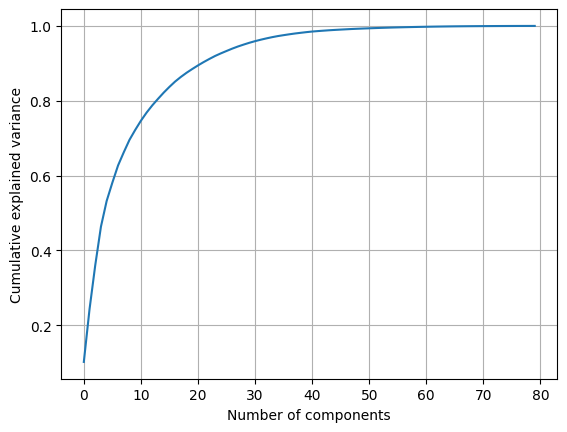

In [64]:
svd2 = TruncatedSVD(n_components=min(X_train.shape[1], 80))  # max 50 or number of features
svd2.fit(X_train_continuous)  # continuous features only

cum_var = np.cumsum(svd2.explained_variance_ratio_)

plt.plot(cum_var)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

### Interpretation:
Analysis of the explained variance curve shows that retaining 25 dimensions accounts for roughly 95% of the total variance in the data.

In [65]:
# def optimize_svd(X_train_continuous, X_test_continuous, n_components, n_iter, random_state=42):
#     svd = TruncatedSVD(n_components=n_components, n_iter=n_iter)
#     svd.fit(X_train_continuous)
#     X_train_svd = svd.transform(X_train_continuous)
#     X_test_svd = svd.transform(X_test_continuous)

#     return X_train_svd, X_test_svd

In [66]:
X_train_svd[0:5]

array([[-4.94511896e+00, -2.24729761e+00,  1.86330373e+00,
         5.80573871e-01, -1.97099556e+00, -3.26753436e-01,
        -3.47973281e-02,  6.62941023e-01, -4.92635808e-01,
        -5.70414883e-01, -1.05735238e+00,  1.17477388e+00,
         2.11920832e-01,  1.76221856e-01,  3.12581321e-01,
        -3.96948096e-01,  1.27090064e-01, -1.56737754e-01,
        -8.44218750e-02, -1.85276568e-01, -5.24453203e-02,
         9.15778897e-02, -6.62907781e-02, -3.43884204e-01,
         3.37084562e-01,  1.48759159e-02, -3.38514043e-02,
         1.23156770e-01,  6.11073662e-02, -9.41954390e-02,
        -4.85787210e-02, -5.59927594e-02, -1.14213669e-01,
         4.90583772e-03,  6.90713622e-02,  1.29495481e-02,
         8.64088638e-02, -3.27152183e-02,  9.55475976e-02,
         5.66806224e-02],
       [-4.94511896e+00, -2.24729761e+00,  1.86330373e+00,
         5.80573871e-01, -1.97099556e+00, -3.26753436e-01,
        -3.47973281e-02,  6.62941023e-01, -4.92635808e-01,
        -5.70414883e-01, -1.05

In [67]:
X_train.head()

D1  D2  D3  D4  D5  D6  D7  D8  D9        E1       E10       E11       E12  \
1   0   0   0   1   1   0   0   0   1  2.337132  0.597222  0.035053  0.018519   
2   0   0   0   1   0   0   0   0   1  2.337132  0.597222  0.035053  0.018519   
3   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053  0.018519   
4   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053  0.018519   
5   0   0   0   1   0   0   0   0   0  2.337132  0.597222  0.035053  0.018519   

        E13       E14       E15       E16       E17       E18       E19  \
1  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948 -0.882935   
2  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948 -0.882935   
3  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948 -0.882935   
4  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948 -0.882935   
5  0.005952  0.005952  0.520172  1.116487  0.680294 -0.199948 -0.882935   

         E2       E20        E3        E4        E5        E6        E7  \
1  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577  1.036085   
2  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577  1.036085   
3  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577  1.036085   
4  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577  1.036085   
5  2.021695  1.903562  1.794863  0.003638  0.864087  0.344577  1.036085   

        E8        E9        I1        I2        I3        I4        I5  \
1 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344 -1.320764   
2 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344 -1.320764   
3 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344 -1.320764   
4 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344 -1.320764   
5 -0.66887  0.003307  0.987103 -1.921693  0.597222  0.540344 -1.320764   

         I6        I7        I8        I9        M1       M10       M11  \
1  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719 -1.127094   
2  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719 -1.127094   
3  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719 -1.127094   
4  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719 -1.127094   
5  0.650794  0.793651  0.595238 -1.319295  1.639695  0.546719 -1.127094   

       M12       M13       M14       M15       M16       M17       M18  \
1 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849  0.495701   
2 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849  0.495701   
3 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849  0.495701   
4 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849  0.495701   
5 -1.44174  0.014566 -1.161911  0.630952  0.000661  0.018849  0.495701   

         M2        M3        M4        M5        M6        M7        M8  \
1  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217  0.000661   
2  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217  0.000661   
3  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217  0.000661   
4  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217  0.000661   
5  1.470488 -0.633441  0.308196  0.759627  0.580828  1.193217  0.000661   

         M9        P1       P10       P11       P12       P13        P2  \
1  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413 -1.576455   
2  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413 -1.576455   
3  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413 -1.576455   
4  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413 -1.576455   
5  1.147322  0.666005  1.757342  1.787456  0.539249  0.573413 -1.576455   

         P3        P4        P5        P6        P7        P8        P9  \
1  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894  0.652778   
2  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894  0.652778   
3  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894  0.652778   
4  0.640873  0.087632  0.228621  0.018716  1.198853  1.763894  0.652778

Joining all the seperate dataframes to form final dataframe. All done separately for train and test dataset to prevent data leakage

In [68]:
X_train_svd = pd.DataFrame(X_train_svd, index=X_train.index)
X_train_svd.columns = [f"svd_{i}" for i in range(X_train_svd.shape[1])]
X_test_svd = pd.DataFrame(X_test_svd,index=X_test.index)
X_test_svd.columns = [f"svd_{i}" for i in range(X_test_svd.shape[1])]

X_train_lags_scaled = pd.DataFrame(X_train_lags_scaled, index=X_train.index)
X_train_lags_scaled.columns = X_train_lags.columns
X_test_lags_scaled = pd.DataFrame(X_test_lags_scaled, index=X_test.index)
X_test_lags_scaled.columns = X_test_lags.columns

X_train_fouriers_scaled = pd.DataFrame(X_train_fouriers_scaled, index=X_train.index)
X_train_fouriers_scaled.columns = X_train_fouriers.columns
X_test_fouriers_scaled = pd.DataFrame(X_test_fouriers_scaled, index=X_test.index)
X_test_fouriers_scaled.columns = X_test_fouriers.columns

X_train_svd_missing = pd.DataFrame(X_train_svd_missing, index=X_train.index)
X_train_svd_missing.columns = [f"svd_missing_{i}" for i in range(X_train_svd_missing.shape[1])]
X_test_svd_missing = pd.DataFrame(X_test_svd_missing, index=X_test.index)
X_test_svd_missing.columns = [f"svd_missing_{i}" for i in range(X_test_svd_missing.shape[1])]


X_train_final = pd.concat([X_train_svd, X_train_lags_scaled, X_train_binary, X_train_fouriers_scaled, X_train_svd_missing], axis=1)
X_test_final = pd.concat([X_test_svd, X_test_lags_scaled, X_test_binary, X_test_fouriers_scaled, X_test_svd_missing], axis=1)

print("Train shape: ", X_train_final.shape, "Test shape: ", X_test_final.shape)
print("Train shape (Target): ", y_train.shape, "Test shape (Target): ", y_test.shape)

X_train_final.head()


Train shape:  (9047, 59) Test shape:  (360, 59)
Train shape (Target):  (9047,) Test shape (Target):  (360,)


svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
1 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
2 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
3 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
4 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
5 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   

      svd_7     svd_8     svd_9    svd_10    svd_11    svd_12    svd_13  \
1  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
2  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
3  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
4  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
5  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   

     svd_14    svd_15   svd_16    svd_17    svd_18    svd_19    svd_20  \
1  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
2  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
3  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
4  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
5  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   

     svd_21    svd_22    svd_23    svd_24    svd_25    svd_26    svd_27  \
1  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
2  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
3  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
4  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
5  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   

     svd_28    svd_29    svd_30    svd_31    svd_32    svd_33    svd_34  \
1  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
2  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
3  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
4  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
5  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   

    svd_35    svd_36    svd_37    svd_38    svd_39  \
1  0.01295  0.086409 -0.032715  0.095548  0.056681   
2  0.01295  0.086409 -0.032715  0.095548  0.056681   
3  0.01295  0.086409 -0.032715  0.095548  0.056681   
4  0.01295  0.086409 -0.032715  0.095548  0.056681   
5  0.01295  0.086409 -0.032715  0.095548  0.056681   

   lagged_market_forward_excess_returns  lagged_forward_returns  \
1                             -0.292839               -0.274434   
2                             -0.868602               -0.850944   
3                             -0.975546               -0.958187   
4                              0.378554                0.397953   
5                             -1.170587               -1.153849   

   lagged_risk_free_rate  D1  D2  D3  D4  D5  D6  D7  D8  D9  \
1               2.205497   0   0   0   1   1   0   0   0   1   
2               2.228096   0   0   0   1   0   0   0   0   1   
3               2.210017   0   0   0   1   0   0   0   0   0   
4               2.187417   0   0   0   1   0   0   0   0   0   
5               2.187417   0   0   0   1   0   0   0   0   0   

   vol_fourier_trend  vol_fourier_5  svd_missing_0  svd_missing_1  \
1          -0.246977      -0.304453       8.955088       -2.18312   
2          -0.250362      -0.301977       8.955088       -2.18312   
3          -0.253007      -0.298635       8.955088       -2.18312   
4          -0.254893      -0.294427       8.955088       -2.18312   
5          -0.256001      -0.289358       8.955088       -2.18312   

   svd_missing_2  svd_missing_3  svd_missing_4  
1      -0.195898      -0.044804       0.001538  
2      -0.195898      -0.044804       0.001538  
3      -0.195898      -0.044804       0.001538  
4      -0.195898      -0.044804  

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### Competition's metric

In [70]:
def compute_score(returns_array, rf_array, positions_array):
    positions_array = np.clip(positions_array, MIN_INVESTMENT, MAX_INVESTMENT)
    strategy_returns = rf_array * (1.0 - positions_array) + positions_array * returns_array
    strategy_excess = strategy_returns - rf_array
    
    if len(strategy_excess) == 0:
        strategy_mean = 0.0
    else:
        if np.any(strategy_excess <= -1):
            strategy_mean = np.mean(strategy_excess)
        else:
            cum_prod = np.prod(1.0 + strategy_excess)
            if cum_prod > 0:
                strategy_mean = cum_prod ** (1.0 / len(strategy_excess)) - 1.0
            else:
                strategy_mean = np.mean(strategy_excess)
    
    if len(strategy_returns) < 2:
        strategy_std = 1e-8
    else:
        strategy_std = np.std(strategy_returns, ddof=1)
        if strategy_std == 0:
            strategy_std = 1e-8
    
    sharpe = strategy_mean / strategy_std * np.sqrt(TRADING_DAYS)
    strategy_vol = strategy_std * np.sqrt(TRADING_DAYS) * 100.0
    
    market_excess = returns_array - rf_array
    market_mean = np.mean(market_excess) if len(market_excess) > 0 else 0.0
    market_std = np.std(returns_array, ddof=1) if len(returns_array) > 1 else 1e-8
    market_vol = market_std * np.sqrt(TRADING_DAYS) * 100.0
    
    vol_ratio = strategy_vol / (market_vol + 1e-8)
    excess_vol = max(0.0, vol_ratio - 1.2)
    vol_penalty = 1.0 + excess_vol
    
    return_gap = max(0.0, (market_mean - strategy_mean) * 100.0 * TRADING_DAYS)
    return_penalty = 1.0 + (return_gap ** 2) / 100.0
    
    return float(sharpe / (vol_penalty * return_penalty))

##### Functions for converting raw returns into positions. Conservative positions showed really poor results. So adapted aggresive positions

In [71]:
#=====Conservative Positions=========
# def create_positions(raw_preds):
#     smoothed = pd.Series(raw_preds).ewm(span=4, min_periods=1).mean().values
    
#     scaled_positions = smoothed * 1.45
#     final_positions = np.clip(scaled_positions + 0.05, MIN_INVESTMENT, MAX_INVESTMENT)
#     return final_positions

#=====Aggressive Positions========
def create_positions(preds, span=10):
    s = pd.Series(preds)

    # normalize
    z = (s - s.mean()) / (s.std() + 1e-8)

    # smooth aggressively
    z = z.ewm(span=span, min_periods=1).mean()

    # non-linear squash
    pos = np.tanh(2.5 * z)

    return np.clip(pos.values, MIN_INVESTMENT, MAX_INVESTMENT)


In [72]:
X_train_final.head()

svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
1 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
2 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
3 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
4 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
5 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   

      svd_7     svd_8     svd_9    svd_10    svd_11    svd_12    svd_13  \
1  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
2  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
3  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
4  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
5  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   

     svd_14    svd_15   svd_16    svd_17    svd_18    svd_19    svd_20  \
1  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
2  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
3  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
4  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
5  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   

     svd_21    svd_22    svd_23    svd_24    svd_25    svd_26    svd_27  \
1  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
2  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
3  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
4  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
5  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   

     svd_28    svd_29    svd_30    svd_31    svd_32    svd_33    svd_34  \
1  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
2  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
3  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
4  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
5  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   

    svd_35    svd_36    svd_37    svd_38    svd_39  \
1  0.01295  0.086409 -0.032715  0.095548  0.056681   
2  0.01295  0.086409 -0.032715  0.095548  0.056681   
3  0.01295  0.086409 -0.032715  0.095548  0.056681   
4  0.01295  0.086409 -0.032715  0.095548  0.056681   
5  0.01295  0.086409 -0.032715  0.095548  0.056681   

   lagged_market_forward_excess_returns  lagged_forward_returns  \
1                             -0.292839               -0.274434   
2                             -0.868602               -0.850944   
3                             -0.975546               -0.958187   
4                              0.378554                0.397953   
5                             -1.170587               -1.153849   

   lagged_risk_free_rate  D1  D2  D3  D4  D5  D6  D7  D8  D9  \
1               2.205497   0   0   0   1   1   0   0   0   1   
2               2.228096   0   0   0   1   0   0   0   0   1   
3               2.210017   0   0   0   1   0   0   0   0   0   
4               2.187417   0   0   0   1   0   0   0   0   0   
5               2.187417   0   0   0   1   0   0   0   0   0   

   vol_fourier_trend  vol_fourier_5  svd_missing_0  svd_missing_1  \
1          -0.246977      -0.304453       8.955088       -2.18312   
2          -0.250362      -0.301977       8.955088       -2.18312   
3          -0.253007      -0.298635       8.955088       -2.18312   
4          -0.254893      -0.294427       8.955088       -2.18312   
5          -0.256001      -0.289358       8.955088       -2.18312   

   svd_missing_2  svd_missing_3  svd_missing_4  
1      -0.195898      -0.044804       0.001538  
2      -0.195898      -0.044804       0.001538  
3      -0.195898      -0.044804       0.001538  
4      -0.195898      -0.044804  

In [73]:
def directional_accuracy(y_true, y_pred):
    return np.mean(np.sign(y_true) == np.sign(y_pred))



# Linear Regression

In [74]:
model = LinearRegression()
model.fit(X_train_final, y_train)

yhat = model.predict(X_test_final)

y_pred = create_positions(yhat)

r_squared_lr = r2_score(y_test, yhat)

mse_lr = mean_squared_error(y_test, yhat)

rmse_lr = np.sqrt(mse_lr)
print("R-Squared: ", r_squared_lr)
print("Mean Squared Error: ", mse_lr)
print("Root Mean Squared Error: ", rmse_lr)

da = directional_accuracy(y_test, yhat)
print("Directional Accuracy:", da)

sharpe = compute_score(returns_array, rfr_array, y_pred)
print("Sharpe Ratio:", sharpe)




R-Squared:  -0.01579443472508313
Mean Squared Error:  9.795281502147961e-05
Root Mean Squared Error:  0.009897111448371167
Directional Accuracy: 0.5
Sharpe Ratio: 0.6536066844330981


In [75]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# XGBoost

In [76]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_final, y_train)
y_pred = xgb_model.predict(X_test_final)

y_pos = create_positions(yhat)




r_squ_xgb = r2_score(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print(r_squ_xgb)
print(mse_xgb)
print(rmse_xgb)

da = directional_accuracy(y_test, y_pred)
print("Directional Accuracy:", da)

sharpe = compute_score(returns_array, rfr_array, y_pos)
print("Sharpe Ratio:", sharpe)

0.3002341236405256
6.747825652730032e-05
0.008214514990387462
Directional Accuracy: 0.6694444444444444
Sharpe Ratio: 0.6536066844330981


In [77]:
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train_final.columns)
xgb_importances_sorted = xgb_importances.sort_values(ascending=False)
xgb_importances_sorted

svd_missing_2                           0.058741
svd_missing_0                           0.028966
svd_9                                   0.026841
svd_missing_4                           0.026762
svd_15                                  0.022728
vol_fourier_5                           0.022249
svd_missing_3                           0.021917
svd_25                                  0.021485
svd_27                                  0.021031
svd_26                                  0.020722
svd_38                                  0.020242
svd_3                                   0.020154
svd_11                                  0.019237
lagged_forward_returns                  0.019202
svd_21                                  0.018926
svd_4                                   0.018783
svd_31                                  0.018746
svd_32                                  0.018607
vol_fourier_trend                       0.018544
svd_24                                  0.018129
D7                  

In [78]:
print("Target mean:", y_train.mean())
print("Target std:", y_train.std())
print("RMSE:", np.sqrt(mse_xgb))

Target mean: 5.1920988643307185e-05
Target std: 0.01055273803257769
RMSE: 0.008214514990387462


# Random Forest

In [79]:
# rf_model = RandomForestRegressor(n_estimators=100)
# rf_model.fit(X_train_final, y_train)
# y_pred = rf_model.predict(X_test_final)

# y_pos = create_positions(y_pred)

# r_squ_rf = r2_score(y_test, y_pred)
# mse_rf = mean_squared_error(y_test, y_pred)
# rmse_rf = np.sqrt(mse_rf)
# print('R Squared', r_squ_rf)
# print('Mean Squared Error:', mse_rf)
# print('Root Mean Squared Error:', rmse_rf)
# da = directional_accuracy(y_test, y_pred)
# print("Directional Accuracy:", da)

# sharpe = compute_score(returns_array, rfr_array, y_pos)
# print("Sharpe Ratio:", sharpe)

In [80]:
# rf_importances = pd.Series(rf_model.feature_importances_, index=X_train_final.columns)
# rf_importances_sorted = rf_importances.sort_values(ascending=False)
# rf_importances_sorted

# LSTM

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


In [82]:
y_train.head()

1   -0.009114
2   -0.010243
3    0.004046
4   -0.012301
5   -0.007066
Name: market_forward_excess_returns, dtype: float64

In [83]:
train_dataset = pd.concat([X_train_final, y_train], axis=1)
test_dataset = pd.concat([X_test_final, y_test], axis=1)
train_dataset.head()

svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
1 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
2 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
3 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
4 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   
5 -4.945119 -2.247298  1.863304  0.580574 -1.970996 -0.326753 -0.034797   

      svd_7     svd_8     svd_9    svd_10    svd_11    svd_12    svd_13  \
1  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
2  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
3  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
4  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   
5  0.662941 -0.492636 -0.570415 -1.057352  1.174774  0.211921  0.176222   

     svd_14    svd_15   svd_16    svd_17    svd_18    svd_19    svd_20  \
1  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
2  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
3  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
4  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   
5  0.312581 -0.396948  0.12709 -0.156738 -0.084422 -0.185277 -0.052445   

     svd_21    svd_22    svd_23    svd_24    svd_25    svd_26    svd_27  \
1  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
2  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
3  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
4  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   
5  0.091578 -0.066291 -0.343884  0.337085  0.014876 -0.033851  0.123157   

     svd_28    svd_29    svd_30    svd_31    svd_32    svd_33    svd_34  \
1  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
2  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
3  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
4  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   
5  0.061107 -0.094195 -0.048579 -0.055993 -0.114214  0.004906  0.069071   

    svd_35    svd_36    svd_37    svd_38    svd_39  \
1  0.01295  0.086409 -0.032715  0.095548  0.056681   
2  0.01295  0.086409 -0.032715  0.095548  0.056681   
3  0.01295  0.086409 -0.032715  0.095548  0.056681   
4  0.01295  0.086409 -0.032715  0.095548  0.056681   
5  0.01295  0.086409 -0.032715  0.095548  0.056681   

   lagged_market_forward_excess_returns  lagged_forward_returns  \
1                             -0.292839               -0.274434   
2                             -0.868602               -0.850944   
3                             -0.975546               -0.958187   
4                              0.378554                0.397953   
5                             -1.170587               -1.153849   

   lagged_risk_free_rate  D1  D2  D3  D4  D5  D6  D7  D8  D9  \
1               2.205497   0   0   0   1   1   0   0   0   1   
2               2.228096   0   0   0   1   0   0   0   0   1   
3               2.210017   0   0   0   1   0   0   0   0   0   
4               2.187417   0   0   0   1   0   0   0   0   0   
5               2.187417   0   0   0   1   0   0   0   0   0   

   vol_fourier_trend  vol_fourier_5  svd_missing_0  svd_missing_1  \
1          -0.246977      -0.304453       8.955088       -2.18312   
2          -0.250362      -0.301977       8.955088       -2.18312   
3          -0.253007      -0.298635       8.955088       -2.18312   
4          -0.254893      -0.294427       8.955088       -2.18312   
5          -0.256001      -0.289358       8.955088       -2.18312   

   svd_missing_2  svd_missing_3  svd_missing_4  market_forward_excess_returns  
1      -0.195898      -0.044804       0.001538                      -0.009114  
2      -0.195898      -0.044804       0.001538                      -

In [84]:
SEQUENCE_LENGTH = 60  
#HORIZON = 120
INPUT_DIM = X_train_final.shape[1]
HIDDEN_SIZE_1=128
HIDDEN_SIZE_2=64
HIDDEN_SIZE_3=32
MLP_OUTPUT_DIM = 1
DROPOUT=0.2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [85]:
class SequentialDataset(Dataset):
    def __init__(self, X, y, sequence_length):
        self.X = X.values
        self.y= y.values
        self.sequence_length = sequence_length
        #self.horizon = horizon

    def __len__(self):
        return len(self.X)-self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.X[idx: idx+self.sequence_length]
        seq_y = self.y[idx + self.sequence_length]

        seq_x_torch = torch.tensor(seq_x, dtype=torch.float32)
        seq_y_torch = torch.tensor(seq_y, dtype=torch.float32)

        return seq_x_torch, seq_y_torch

In [86]:
train_seq_dataset = SequentialDataset(X_train_final,y_train, SEQUENCE_LENGTH)
test_seq_dataset = SequentialDataset(X_test_final, y_test, SEQUENCE_LENGTH)

train_loader = DataLoader(train_seq_dataset, batch_size=32, shuffle=False, drop_last=False)
test_loader = DataLoader(test_seq_dataset, batch_size=32, shuffle=False, drop_last=False)

In [87]:
class LSTM_Architecture(nn.Module):
    def __init__(self, input_dim=332, hidden_size_1=128,hidden_size_2=64,hidden_size_3=32, mlp_output_dim=1, dropout=0.2):
        super(LSTM_Architecture, self).__init__()

        self.input_size = input_dim
        self.hidden_sizes = [hidden_size_1, hidden_size_2, hidden_size_3]
        self.output_size = mlp_output_dim
        
        self.dropout_layer = nn.Dropout(dropout)
        
        self.lstm1 = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_sizes[0], num_layers=1, dropout=0.2,batch_first=True)
        self.lstm2 = nn.LSTM(input_size=self.hidden_sizes[0], hidden_size=self.hidden_sizes[1], num_layers=1, dropout=0.2,batch_first=True)
        self.lstm3 = nn.LSTM(input_size=self.hidden_sizes[1], hidden_size=self.hidden_sizes[2], num_layers=1, dropout=0.2,batch_first=True)
        
        self.layernorm1 = nn.LayerNorm(self.hidden_sizes[0])
        self.layernorm2 = nn.LayerNorm(self.hidden_sizes[1])
        self.layernorm3 = nn.LayerNorm(self.hidden_sizes[2])

        self.fc1 = nn.Linear(self.hidden_sizes[-1], 16)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(16, self.output_size)

    def forward(self, x):

        out, _ = self.lstm1(x)
        out = self.layernorm1(out)
        out = self.dropout_layer(out)
        out, _ = self.lstm2(out)
        out = self.layernorm2(out)
        out = self.dropout_layer(out)
        out, _ = self.lstm3(out)
        out = self.layernorm3(out)
        out = self.dropout_layer(out)
        #out = self.fc(out)
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.activation(out)
        out = self.fc2(out)
        return out.squeeze(-1)
        

In [88]:

train_losses, test_losses = [], []
train_rmse_lst, test_rmse_lst = [], []
train_r2_lst, test_r2_lst = [], []
best_model_state = None
sharpe_ratios = []
directional_acc_lst = []

def model_training(model, optimizer, criterion, train_loader, test_loader, seq, epochs=50, patience=100, min_delta=0.0):
    global best_model_state
    best_val_loss = float('inf')
    counter = 0
    best_val_sharpe = float('-inf')
    for epoch in range(epochs):
        # ---------- Training ----------
        model.train()
        epoch_loss = 0
        all_preds, all_targets = [], []

        for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device) # ensure correct shape
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            all_preds.append(outputs.detach().cpu().numpy())
            all_targets.append(y_batch.cpu().numpy())

        all_preds = np.concatenate(all_preds).reshape(-1)
        all_targets = np.concatenate(all_targets).reshape(-1)
        
        train_r2 = r2_score(all_targets, all_preds)
        train_rmse = np.sqrt(mean_squared_error(all_targets, all_preds))
        train_losses.append(epoch_loss / len(train_loader))
        train_rmse_lst.append(train_rmse)
        train_r2_lst.append(train_r2)
        # ---------- Evaluation ----------
        model.eval()
        test_loss = 0
        test_preds, test_targets = [], []

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                test_loss += loss.item()
                test_preds.append(outputs.cpu().numpy())
                test_targets.append(y_batch.cpu().numpy())

        test_preds = np.concatenate(test_preds).reshape(-1)
        test_targets = np.concatenate(test_targets).reshape(-1)

        
        #val_indices = np.arange(60, 180)
        val_indices = np.arange(seq, 360)
        returns_array_val = df_test.iloc[val_indices]['forward_returns'].values
        rfr_array_val = df_test.iloc[val_indices]['risk_free_rate'].values


        
        test_positions = create_positions(test_preds)
        
        test_r2 = r2_score(test_targets, test_preds)
        test_rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
        current_val_loss = test_loss / len(test_loader)
        test_losses.append(current_val_loss)
        test_rmse_lst.append(test_rmse)
        test_r2_lst.append(test_r2)
        
        
        da = directional_accuracy(test_targets, test_preds)
        directional_acc_lst.append(da)
        sharpe = compute_score(returns_array_val, rfr_array_val, test_positions)
        sharpe_ratios.append(sharpe)
        current_val_sharpe = sharpe
        
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Test Loss: {test_losses[-1]:.4f}")
#        print(f"Train R2: {train_r2:.4f} | Test R2: {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
#        print("Directional Accuracy:", da)
        print("Sharpe Ratio:", sharpe)

        if current_val_sharpe > best_val_sharpe + min_delta:
            best_val_sharpe = current_val_sharpe
            counter = 0
            best_model_state = model.state_dict()

        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs.")
                break


In [89]:
model = LSTM_Architecture(input_dim=INPUT_DIM, 
                          hidden_size_1=HIDDEN_SIZE_1,
                          hidden_size_2=HIDDEN_SIZE_2,
                          hidden_size_3=HIDDEN_SIZE_3, 
                          mlp_output_dim=1, dropout=DROPOUT).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


In [90]:
model_training(model, optimizer, criterion, train_loader, test_loader, seq=SEQUENCE_LENGTH, epochs=100)
torch.save(best_model_state, "/kaggle/working/best_lstm_model.pth")


Epoch 1/100: 100%|██████████| 281/281 [00:02<00:00, 126.93it/s]


Epoch 1/100 | Train Loss: 0.0133 | Test Loss: 0.0019
Train RMSE: 0.1152 | Test RMSE: 0.0449
Sharpe Ratio: 1.370802717087564


Epoch 2/100: 100%|██████████| 281/281 [00:01<00:00, 175.24it/s]


Epoch 2/100 | Train Loss: 0.0039 | Test Loss: 0.0021
Train RMSE: 0.0627 | Test RMSE: 0.0449
Sharpe Ratio: 1.5118980563794828


Epoch 3/100: 100%|██████████| 281/281 [00:01<00:00, 175.35it/s]


Epoch 3/100 | Train Loss: 0.0017 | Test Loss: 0.0009
Train RMSE: 0.0417 | Test RMSE: 0.0305
Sharpe Ratio: 1.2189036079472948


Epoch 4/100: 100%|██████████| 281/281 [00:01<00:00, 177.90it/s]


Epoch 4/100 | Train Loss: 0.0011 | Test Loss: 0.0004
Train RMSE: 0.0334 | Test RMSE: 0.0189
Sharpe Ratio: 2.247743256553668


Epoch 5/100: 100%|██████████| 281/281 [00:01<00:00, 177.79it/s]


Epoch 5/100 | Train Loss: 0.0008 | Test Loss: 0.0002
Train RMSE: 0.0287 | Test RMSE: 0.0142
Sharpe Ratio: 1.9614753270661838


Epoch 6/100: 100%|██████████| 281/281 [00:01<00:00, 174.73it/s]


Epoch 6/100 | Train Loss: 0.0006 | Test Loss: 0.0001
Train RMSE: 0.0254 | Test RMSE: 0.0124
Sharpe Ratio: 2.2011929058918565


Epoch 7/100: 100%|██████████| 281/281 [00:01<00:00, 178.66it/s]


Epoch 7/100 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0230 | Test RMSE: 0.0115
Sharpe Ratio: 2.075878463228327


Epoch 8/100: 100%|██████████| 281/281 [00:01<00:00, 178.98it/s]


Epoch 8/100 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0212 | Test RMSE: 0.0116
Sharpe Ratio: 2.2367725698627923


Epoch 9/100: 100%|██████████| 281/281 [00:01<00:00, 175.97it/s]


Epoch 9/100 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0197 | Test RMSE: 0.0109
Sharpe Ratio: 2.270863636938419


Epoch 10/100: 100%|██████████| 281/281 [00:01<00:00, 178.95it/s]


Epoch 10/100 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0179 | Test RMSE: 0.0106
Sharpe Ratio: 1.979303226119841


Epoch 11/100: 100%|██████████| 281/281 [00:01<00:00, 179.88it/s]


Epoch 11/100 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0172 | Test RMSE: 0.0103
Sharpe Ratio: 1.8620985191550634


Epoch 12/100: 100%|██████████| 281/281 [00:01<00:00, 181.63it/s]


Epoch 12/100 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0162 | Test RMSE: 0.0101
Sharpe Ratio: 1.8967383011524872


Epoch 13/100: 100%|██████████| 281/281 [00:01<00:00, 176.70it/s]


Epoch 13/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0157 | Test RMSE: 0.0101
Sharpe Ratio: 1.2868621422825246


Epoch 14/100: 100%|██████████| 281/281 [00:01<00:00, 182.92it/s]


Epoch 14/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0149 | Test RMSE: 0.0102
Sharpe Ratio: 1.4252825604289452


Epoch 15/100: 100%|██████████| 281/281 [00:01<00:00, 180.89it/s]


Epoch 15/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0146 | Test RMSE: 0.0100
Sharpe Ratio: 1.6665056359099146


Epoch 16/100: 100%|██████████| 281/281 [00:01<00:00, 177.17it/s]


Epoch 16/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0139 | Test RMSE: 0.0102
Sharpe Ratio: 0.5254189946177418


Epoch 17/100: 100%|██████████| 281/281 [00:01<00:00, 179.45it/s]


Epoch 17/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0138 | Test RMSE: 0.0099
Sharpe Ratio: 1.3115953060561938


Epoch 18/100: 100%|██████████| 281/281 [00:01<00:00, 178.11it/s]


Epoch 18/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0133 | Test RMSE: 0.0102
Sharpe Ratio: 0.2591869885902876


Epoch 19/100: 100%|██████████| 281/281 [00:01<00:00, 175.54it/s]


Epoch 19/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0129 | Test RMSE: 0.0100
Sharpe Ratio: 0.05624952267886225


Epoch 20/100: 100%|██████████| 281/281 [00:01<00:00, 179.16it/s]


Epoch 20/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0126 | Test RMSE: 0.0099
Sharpe Ratio: 0.1389361440412825


Epoch 21/100: 100%|██████████| 281/281 [00:01<00:00, 180.90it/s]


Epoch 21/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0125 | Test RMSE: 0.0099
Sharpe Ratio: 0.14116977111894097


Epoch 22/100: 100%|██████████| 281/281 [00:01<00:00, 174.87it/s]


Epoch 22/100 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0123 | Test RMSE: 0.0098
Sharpe Ratio: 0.03331861741498019


Epoch 23/100: 100%|██████████| 281/281 [00:01<00:00, 178.47it/s]


Epoch 23/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0100
Sharpe Ratio: 0.2965080644673107


Epoch 24/100: 100%|██████████| 281/281 [00:01<00:00, 175.47it/s]


Epoch 24/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0122 | Test RMSE: 0.0098
Sharpe Ratio: 0.24821413502941236


Epoch 25/100: 100%|██████████| 281/281 [00:01<00:00, 176.74it/s]


Epoch 25/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0098
Sharpe Ratio: 0.20083168510890254


Epoch 26/100: 100%|██████████| 281/281 [00:01<00:00, 174.50it/s]


Epoch 26/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0098
Sharpe Ratio: 1.293300456967156


Epoch 27/100: 100%|██████████| 281/281 [00:01<00:00, 178.29it/s]


Epoch 27/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0098
Sharpe Ratio: 1.0816159968994954


Epoch 28/100: 100%|██████████| 281/281 [00:01<00:00, 175.44it/s]


Epoch 28/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0098
Sharpe Ratio: 0.08118567085571506


Epoch 29/100: 100%|██████████| 281/281 [00:01<00:00, 180.22it/s]


Epoch 29/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0098
Sharpe Ratio: -0.02124540417204711


Epoch 30/100: 100%|██████████| 281/281 [00:01<00:00, 178.57it/s]


Epoch 30/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0098
Sharpe Ratio: 0.14760173271262836


Epoch 31/100: 100%|██████████| 281/281 [00:01<00:00, 178.05it/s]


Epoch 31/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0098
Sharpe Ratio: 0.28356966714090087


Epoch 32/100: 100%|██████████| 281/281 [00:01<00:00, 178.98it/s]


Epoch 32/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0097
Sharpe Ratio: 0.9904654094800716


Epoch 33/100: 100%|██████████| 281/281 [00:01<00:00, 179.18it/s]


Epoch 33/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0098
Sharpe Ratio: 1.613160403461946


Epoch 34/100: 100%|██████████| 281/281 [00:01<00:00, 176.00it/s]


Epoch 34/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0098
Sharpe Ratio: -0.030464129693269705


Epoch 35/100: 100%|██████████| 281/281 [00:01<00:00, 179.04it/s]


Epoch 35/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0098
Sharpe Ratio: 1.3289178030294992


Epoch 36/100: 100%|██████████| 281/281 [00:01<00:00, 180.59it/s]


Epoch 36/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0098
Sharpe Ratio: 0.3674409239870014


Epoch 37/100: 100%|██████████| 281/281 [00:01<00:00, 178.37it/s]


Epoch 37/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0098
Sharpe Ratio: 0.4563509517265074


Epoch 38/100: 100%|██████████| 281/281 [00:01<00:00, 177.01it/s]


Epoch 38/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0097
Sharpe Ratio: 0.4046607330930751


Epoch 39/100: 100%|██████████| 281/281 [00:01<00:00, 178.39it/s]


Epoch 39/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.08903996434717061


Epoch 40/100: 100%|██████████| 281/281 [00:01<00:00, 177.13it/s]


Epoch 40/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.05596552404103731


Epoch 41/100: 100%|██████████| 281/281 [00:01<00:00, 172.17it/s]


Epoch 41/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.6823397206304429


Epoch 42/100: 100%|██████████| 281/281 [00:01<00:00, 179.64it/s]


Epoch 42/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.7114983786735434


Epoch 43/100: 100%|██████████| 281/281 [00:01<00:00, 176.56it/s]


Epoch 43/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0097
Sharpe Ratio: 0.6130417352186731


Epoch 44/100: 100%|██████████| 281/281 [00:01<00:00, 179.99it/s]


Epoch 44/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0097
Sharpe Ratio: 0.5289743261190066


Epoch 45/100: 100%|██████████| 281/281 [00:01<00:00, 177.17it/s]


Epoch 45/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0098
Sharpe Ratio: 0.5033146517589686


Epoch 46/100: 100%|██████████| 281/281 [00:01<00:00, 175.03it/s]


Epoch 46/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0098
Sharpe Ratio: 0.5376174289192506


Epoch 47/100: 100%|██████████| 281/281 [00:01<00:00, 173.75it/s]


Epoch 47/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.20678913785254593


Epoch 48/100: 100%|██████████| 281/281 [00:01<00:00, 179.35it/s]


Epoch 48/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.9379948225209799


Epoch 49/100: 100%|██████████| 281/281 [00:01<00:00, 180.93it/s]


Epoch 49/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0097
Sharpe Ratio: 1.222183744135933


Epoch 50/100: 100%|██████████| 281/281 [00:01<00:00, 178.78it/s]


Epoch 50/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0097
Sharpe Ratio: 0.7258097479086932


Epoch 51/100: 100%|██████████| 281/281 [00:01<00:00, 177.97it/s]


Epoch 51/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0103
Sharpe Ratio: 0.4667182560764126


Epoch 52/100: 100%|██████████| 281/281 [00:01<00:00, 180.80it/s]


Epoch 52/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0098
Sharpe Ratio: 0.23290243126532986


Epoch 53/100: 100%|██████████| 281/281 [00:01<00:00, 175.94it/s]


Epoch 53/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0098
Sharpe Ratio: 0.4609277463569238


Epoch 54/100: 100%|██████████| 281/281 [00:01<00:00, 177.31it/s]


Epoch 54/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0099
Sharpe Ratio: 1.1171735860632321


Epoch 55/100: 100%|██████████| 281/281 [00:01<00:00, 174.98it/s]


Epoch 55/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0101
Sharpe Ratio: 0.7711508859140733


Epoch 56/100: 100%|██████████| 281/281 [00:01<00:00, 178.42it/s]


Epoch 56/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0102
Sharpe Ratio: 0.4141272682248396


Epoch 57/100: 100%|██████████| 281/281 [00:01<00:00, 179.52it/s]


Epoch 57/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0108 | Test RMSE: 0.0099
Sharpe Ratio: 0.4046910168602451


Epoch 58/100: 100%|██████████| 281/281 [00:01<00:00, 178.13it/s]


Epoch 58/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0107 | Test RMSE: 0.0098
Sharpe Ratio: 0.29827656391509316


Epoch 59/100: 100%|██████████| 281/281 [00:01<00:00, 175.54it/s]


Epoch 59/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 0.27302686722319636


Epoch 60/100: 100%|██████████| 281/281 [00:01<00:00, 176.95it/s]


Epoch 60/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.21211762430249279


Epoch 61/100: 100%|██████████| 281/281 [00:01<00:00, 176.41it/s]


Epoch 61/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.3410235127218336


Epoch 62/100: 100%|██████████| 281/281 [00:01<00:00, 175.96it/s]


Epoch 62/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 0.41031229887854237


Epoch 63/100: 100%|██████████| 281/281 [00:01<00:00, 176.61it/s]


Epoch 63/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 0.42337849077930445


Epoch 64/100: 100%|██████████| 281/281 [00:01<00:00, 174.69it/s]


Epoch 64/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0107 | Test RMSE: 0.0097
Sharpe Ratio: 0.5322025248348721


Epoch 65/100: 100%|██████████| 281/281 [00:01<00:00, 175.10it/s]


Epoch 65/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 0.6175600055611661


Epoch 66/100: 100%|██████████| 281/281 [00:01<00:00, 178.23it/s]


Epoch 66/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 0.6245688964444808


Epoch 67/100: 100%|██████████| 281/281 [00:01<00:00, 178.66it/s]


Epoch 67/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0107 | Test RMSE: 0.0098
Sharpe Ratio: 0.38456788204299963


Epoch 68/100: 100%|██████████| 281/281 [00:01<00:00, 178.19it/s]


Epoch 68/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0108 | Test RMSE: 0.0098
Sharpe Ratio: 0.21746954986606892


Epoch 69/100: 100%|██████████| 281/281 [00:01<00:00, 178.88it/s]


Epoch 69/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.5388092984948591


Epoch 70/100: 100%|██████████| 281/281 [00:01<00:00, 179.77it/s]


Epoch 70/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.6292473631464937


Epoch 71/100: 100%|██████████| 281/281 [00:01<00:00, 178.78it/s]


Epoch 71/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.6670253766883637


Epoch 72/100: 100%|██████████| 281/281 [00:01<00:00, 176.64it/s]


Epoch 72/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 0.6740044303470522


Epoch 73/100: 100%|██████████| 281/281 [00:01<00:00, 176.52it/s]


Epoch 73/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 1.0776900711149515


Epoch 74/100: 100%|██████████| 281/281 [00:01<00:00, 177.29it/s]


Epoch 74/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 1.8269719453047097


Epoch 75/100: 100%|██████████| 281/281 [00:01<00:00, 179.27it/s]


Epoch 75/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0096
Sharpe Ratio: 1.9291457484410883


Epoch 76/100: 100%|██████████| 281/281 [00:01<00:00, 179.59it/s]


Epoch 76/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 1.8900751075889506


Epoch 77/100: 100%|██████████| 281/281 [00:01<00:00, 179.51it/s]


Epoch 77/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0100
Sharpe Ratio: 2.3716416169341428


Epoch 78/100: 100%|██████████| 281/281 [00:01<00:00, 176.07it/s]


Epoch 78/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 2.2681277321695537


Epoch 79/100: 100%|██████████| 281/281 [00:01<00:00, 175.76it/s]


Epoch 79/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 2.1065211078351056


Epoch 80/100: 100%|██████████| 281/281 [00:01<00:00, 177.91it/s]


Epoch 80/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0100
Sharpe Ratio: 1.2824984688800787


Epoch 81/100: 100%|██████████| 281/281 [00:01<00:00, 179.88it/s]


Epoch 81/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0103
Sharpe Ratio: 0.6931365224740317


Epoch 82/100: 100%|██████████| 281/281 [00:01<00:00, 174.89it/s]


Epoch 82/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0104
Sharpe Ratio: 0.5920915112816154


Epoch 83/100: 100%|██████████| 281/281 [00:01<00:00, 176.75it/s]


Epoch 83/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0104
Sharpe Ratio: 0.5733011498708299


Epoch 84/100: 100%|██████████| 281/281 [00:01<00:00, 176.21it/s]


Epoch 84/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0101
Sharpe Ratio: 0.7716016666364346


Epoch 85/100: 100%|██████████| 281/281 [00:01<00:00, 174.98it/s]


Epoch 85/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0099
Sharpe Ratio: 1.0668356353151895


Epoch 86/100: 100%|██████████| 281/281 [00:01<00:00, 179.26it/s]


Epoch 86/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0097
Sharpe Ratio: 1.2671477099816923


Epoch 87/100: 100%|██████████| 281/281 [00:01<00:00, 173.54it/s]


Epoch 87/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.071582530036768


Epoch 88/100: 100%|██████████| 281/281 [00:01<00:00, 178.74it/s]


Epoch 88/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 1.9877902736128459


Epoch 89/100: 100%|██████████| 281/281 [00:01<00:00, 178.38it/s]


Epoch 89/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.218721217374179


Epoch 90/100: 100%|██████████| 281/281 [00:01<00:00, 176.42it/s]


Epoch 90/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.348615466878392


Epoch 91/100: 100%|██████████| 281/281 [00:01<00:00, 179.46it/s]


Epoch 91/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.2545858984286737


Epoch 92/100: 100%|██████████| 281/281 [00:01<00:00, 181.60it/s]


Epoch 92/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0095
Sharpe Ratio: 2.999916754777783


Epoch 93/100: 100%|██████████| 281/281 [00:01<00:00, 179.74it/s]


Epoch 93/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.257286342536114


Epoch 94/100: 100%|██████████| 281/281 [00:01<00:00, 177.48it/s]


Epoch 94/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0095
Sharpe Ratio: 2.1157693355149023


Epoch 95/100: 100%|██████████| 281/281 [00:01<00:00, 177.87it/s]


Epoch 95/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0095
Sharpe Ratio: 3.2272719410477078


Epoch 96/100: 100%|██████████| 281/281 [00:01<00:00, 178.50it/s]


Epoch 96/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0094
Sharpe Ratio: 3.2626457791487673


Epoch 97/100: 100%|██████████| 281/281 [00:01<00:00, 178.55it/s]


Epoch 97/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0095
Sharpe Ratio: 2.9671762445070984


Epoch 98/100: 100%|██████████| 281/281 [00:01<00:00, 180.75it/s]


Epoch 98/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0107 | Test RMSE: 0.0102
Sharpe Ratio: 1.964391633447995


Epoch 99/100: 100%|██████████| 281/281 [00:01<00:00, 174.26it/s]


Epoch 99/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0106 | Test RMSE: 0.0098
Sharpe Ratio: 1.973263874598795


Epoch 100/100: 100%|██████████| 281/281 [00:01<00:00, 175.20it/s]

Epoch 100/100 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0105 | Test RMSE: 0.0096
Sharpe Ratio: 2.075768464390816


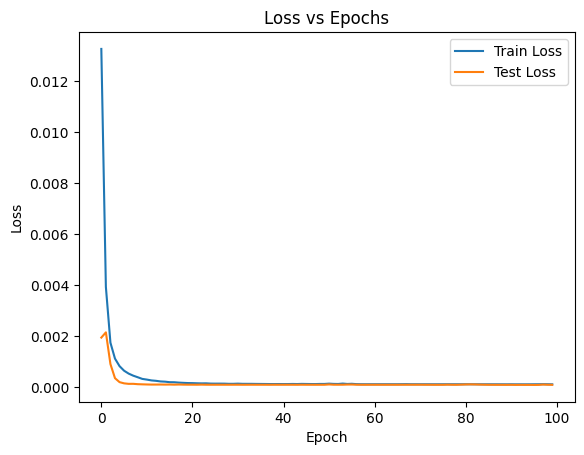

In [91]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

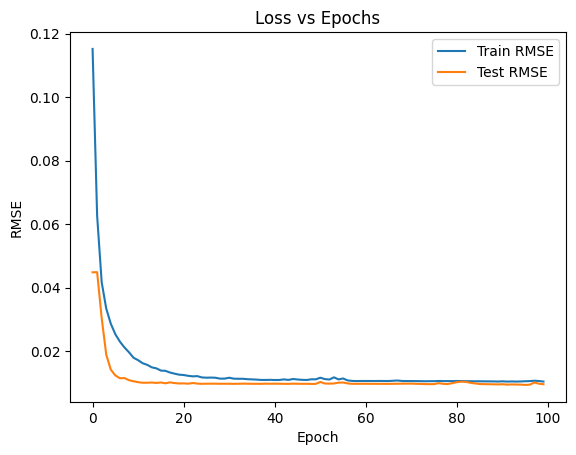

In [92]:
plt.plot(train_rmse_lst, label='Train RMSE')
plt.plot(test_rmse_lst, label='Test RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

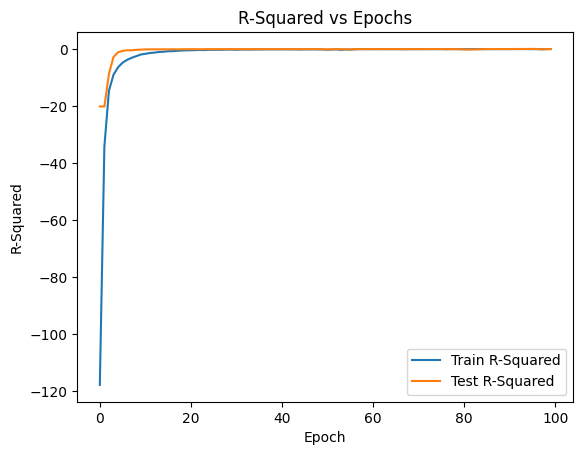

In [93]:
plt.plot(train_r2_lst, label='Train R-Squared')
plt.plot(test_r2_lst, label='Test R-Squared')
plt.xlabel("Epoch")
plt.ylabel("R-Squared")
plt.title("R-Squared vs Epochs")
plt.legend()
plt.show()

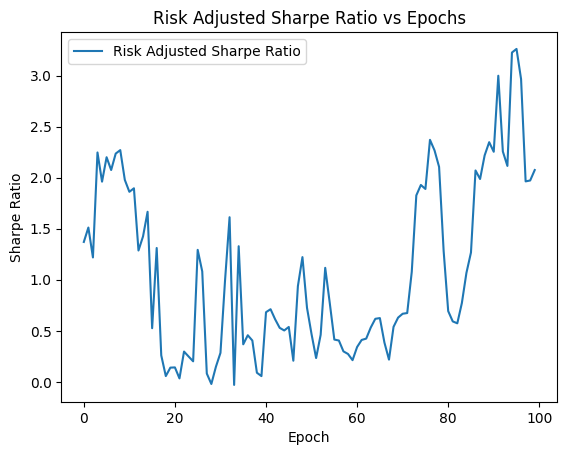

In [94]:
plt.plot(sharpe_ratios, label='Risk Adjusted Sharpe Ratio')
plt.xlabel("Epoch")
plt.ylabel("Sharpe Ratio")
plt.title("Risk Adjusted Sharpe Ratio vs Epochs")
plt.legend()
plt.show()

In [95]:
def plot_sharpe_ratio(sharpe_ratios):
    plt.plot(sharpe_ratios, label='Risk Adjusted Sharpe Ratio')
    plt.xlabel("Epoch")
    plt.ylabel("Sharpe Ratio")
    plt.title("Risk Adjusted Sharpe Ratio vs Epochs")
    plt.legend()
    plt.show()

def plot_directional_accuracy(da_lst):
    plt.plot(da_lst, label='Directional Accuracies')
    plt.xlabel("Epoch")
    plt.ylabel("Directional Accuracy")
    plt.title("Directional Accuracy vs Epochs")
    plt.legend()
    plt.show() 

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=30==========


Epoch 1/50: 100%|██████████| 282/282 [00:01<00:00, 180.06it/s]


Epoch 1/50 | Train Loss: 0.0412 | Test Loss: 0.0105
Train RMSE: 0.2030 | Test RMSE: 0.0967
Sharpe Ratio: 0.864685451242693


Epoch 2/50: 100%|██████████| 282/282 [00:01<00:00, 185.47it/s]


Epoch 2/50 | Train Loss: 0.0148 | Test Loss: 0.0040
Train RMSE: 0.1215 | Test RMSE: 0.0631
Sharpe Ratio: 0.3143305017766875


Epoch 3/50: 100%|██████████| 282/282 [00:01<00:00, 185.62it/s]


Epoch 3/50 | Train Loss: 0.0064 | Test Loss: 0.0014
Train RMSE: 0.0801 | Test RMSE: 0.0379
Sharpe Ratio: 0.062421704914784576


Epoch 4/50: 100%|██████████| 282/282 [00:01<00:00, 167.57it/s]


Epoch 4/50 | Train Loss: 0.0039 | Test Loss: 0.0009
Train RMSE: 0.0627 | Test RMSE: 0.0283
Sharpe Ratio: 0.3334397525922033


Epoch 5/50: 100%|██████████| 282/282 [00:01<00:00, 187.72it/s]


Epoch 5/50 | Train Loss: 0.0029 | Test Loss: 0.0006
Train RMSE: 0.0535 | Test RMSE: 0.0249
Sharpe Ratio: 0.1751948936580951


Epoch 6/50: 100%|██████████| 282/282 [00:01<00:00, 187.60it/s]


Epoch 6/50 | Train Loss: 0.0022 | Test Loss: 0.0006
Train RMSE: 0.0467 | Test RMSE: 0.0247
Sharpe Ratio: 0.0012606433066064263


Epoch 7/50: 100%|██████████| 282/282 [00:01<00:00, 183.51it/s]


Epoch 7/50 | Train Loss: 0.0016 | Test Loss: 0.0005
Train RMSE: 0.0399 | Test RMSE: 0.0225
Sharpe Ratio: 0.1606705622218661


Epoch 8/50: 100%|██████████| 282/282 [00:01<00:00, 186.81it/s]


Epoch 8/50 | Train Loss: 0.0013 | Test Loss: 0.0004
Train RMSE: 0.0364 | Test RMSE: 0.0205
Sharpe Ratio: 0.14621496459759445


Epoch 9/50: 100%|██████████| 282/282 [00:01<00:00, 184.92it/s]


Epoch 9/50 | Train Loss: 0.0011 | Test Loss: 0.0003
Train RMSE: 0.0338 | Test RMSE: 0.0184
Sharpe Ratio: 0.23638483165374233


Epoch 10/50: 100%|██████████| 282/282 [00:01<00:00, 181.32it/s]


Epoch 10/50 | Train Loss: 0.0010 | Test Loss: 0.0003
Train RMSE: 0.0312 | Test RMSE: 0.0167
Sharpe Ratio: 0.2370007718316537


Epoch 11/50: 100%|██████████| 282/282 [00:01<00:00, 184.51it/s]


Epoch 11/50 | Train Loss: 0.0008 | Test Loss: 0.0002
Train RMSE: 0.0287 | Test RMSE: 0.0152
Sharpe Ratio: 0.18206834465328461


Epoch 12/50: 100%|██████████| 282/282 [00:01<00:00, 183.89it/s]


Epoch 12/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0266 | Test RMSE: 0.0140
Sharpe Ratio: 0.3849649547156931


Epoch 13/50: 100%|██████████| 282/282 [00:01<00:00, 183.70it/s]


Epoch 13/50 | Train Loss: 0.0006 | Test Loss: 0.0002
Train RMSE: 0.0251 | Test RMSE: 0.0128
Sharpe Ratio: 0.33951388578788955


Epoch 14/50: 100%|██████████| 282/282 [00:01<00:00, 179.64it/s]


Epoch 14/50 | Train Loss: 0.0006 | Test Loss: 0.0001
Train RMSE: 0.0239 | Test RMSE: 0.0122
Sharpe Ratio: 0.3244540761895833


Epoch 15/50: 100%|██████████| 282/282 [00:01<00:00, 185.51it/s]


Epoch 15/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0227 | Test RMSE: 0.0119
Sharpe Ratio: 0.3433723240928019


Epoch 16/50: 100%|██████████| 282/282 [00:01<00:00, 184.05it/s]


Epoch 16/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0215 | Test RMSE: 0.0115
Sharpe Ratio: 0.2975924231098517


Epoch 17/50: 100%|██████████| 282/282 [00:01<00:00, 183.77it/s]


Epoch 17/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0200 | Test RMSE: 0.0111
Sharpe Ratio: 0.5774260585108567


Epoch 18/50: 100%|██████████| 282/282 [00:01<00:00, 184.60it/s]


Epoch 18/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0192 | Test RMSE: 0.0108
Sharpe Ratio: 0.6085979560877853


Epoch 19/50: 100%|██████████| 282/282 [00:01<00:00, 183.56it/s]


Epoch 19/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0185 | Test RMSE: 0.0107
Sharpe Ratio: 0.9512328388314939


Epoch 20/50: 100%|██████████| 282/282 [00:01<00:00, 178.22it/s]


Epoch 20/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0174 | Test RMSE: 0.0101
Sharpe Ratio: 0.789072155611672


Epoch 21/50: 100%|██████████| 282/282 [00:01<00:00, 184.50it/s]


Epoch 21/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0171 | Test RMSE: 0.0110
Sharpe Ratio: 0.884525685996163


Epoch 22/50: 100%|██████████| 282/282 [00:01<00:00, 187.36it/s]


Epoch 22/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0162 | Test RMSE: 0.0107
Sharpe Ratio: 0.630582144187822


Epoch 23/50: 100%|██████████| 282/282 [00:01<00:00, 183.79it/s]


Epoch 23/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0158 | Test RMSE: 0.0109
Sharpe Ratio: 0.9688851975281223


Epoch 24/50: 100%|██████████| 282/282 [00:01<00:00, 185.16it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0153 | Test RMSE: 0.0104
Sharpe Ratio: 0.5508071175634174


Epoch 25/50: 100%|██████████| 282/282 [00:01<00:00, 185.07it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0147 | Test RMSE: 0.0104
Sharpe Ratio: 0.6182621303542142


Epoch 26/50: 100%|██████████| 282/282 [00:01<00:00, 187.34it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0145 | Test RMSE: 0.0099
Sharpe Ratio: 0.5263254028579405


Epoch 27/50: 100%|██████████| 282/282 [00:01<00:00, 181.10it/s]


Epoch 27/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0140 | Test RMSE: 0.0103
Sharpe Ratio: 0.5421361358815815


Epoch 28/50: 100%|██████████| 282/282 [00:01<00:00, 187.25it/s]


Epoch 28/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0135 | Test RMSE: 0.0101
Sharpe Ratio: 1.1917601124457913


Epoch 29/50: 100%|██████████| 282/282 [00:01<00:00, 183.44it/s]


Epoch 29/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0135 | Test RMSE: 0.0099
Sharpe Ratio: 0.5313428924375859


Epoch 30/50: 100%|██████████| 282/282 [00:01<00:00, 183.40it/s]


Epoch 30/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0132 | Test RMSE: 0.0098
Sharpe Ratio: 0.8344924591967843


Epoch 31/50: 100%|██████████| 282/282 [00:01<00:00, 183.89it/s]


Epoch 31/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0128 | Test RMSE: 0.0098
Sharpe Ratio: 0.6493546560265745


Epoch 32/50: 100%|██████████| 282/282 [00:01<00:00, 181.61it/s]


Epoch 32/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0127 | Test RMSE: 0.0097
Sharpe Ratio: 0.5565586605534659


Epoch 33/50: 100%|██████████| 282/282 [00:01<00:00, 181.47it/s]


Epoch 33/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0124 | Test RMSE: 0.0097
Sharpe Ratio: 0.8115390167839743


Epoch 34/50: 100%|██████████| 282/282 [00:01<00:00, 188.11it/s]


Epoch 34/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0123 | Test RMSE: 0.0097
Sharpe Ratio: 0.7082420582147875


Epoch 35/50: 100%|██████████| 282/282 [00:01<00:00, 184.64it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0097
Sharpe Ratio: 0.8151577520203743


Epoch 36/50: 100%|██████████| 282/282 [00:01<00:00, 186.44it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0098
Sharpe Ratio: 0.36621944116842026


Epoch 37/50: 100%|██████████| 282/282 [00:01<00:00, 181.70it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0119 | Test RMSE: 0.0097
Sharpe Ratio: 0.7682587926640767


Epoch 38/50: 100%|██████████| 282/282 [00:01<00:00, 183.49it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0097
Sharpe Ratio: 0.19550772101963967


Epoch 39/50: 100%|██████████| 282/282 [00:01<00:00, 182.19it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0097
Sharpe Ratio: 0.7207257166088876


Epoch 40/50: 100%|██████████| 282/282 [00:01<00:00, 185.38it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0097
Sharpe Ratio: 0.7629928150405975


Epoch 41/50: 100%|██████████| 282/282 [00:01<00:00, 184.54it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0097
Sharpe Ratio: 0.3651365811201844


Epoch 42/50: 100%|██████████| 282/282 [00:01<00:00, 184.59it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0097
Sharpe Ratio: 0.577472257857602


Epoch 43/50: 100%|██████████| 282/282 [00:01<00:00, 182.20it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0097
Sharpe Ratio: 0.4560238565885524


Epoch 44/50: 100%|██████████| 282/282 [00:01<00:00, 184.11it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0097
Sharpe Ratio: 0.4684410610527412


Epoch 45/50: 100%|██████████| 282/282 [00:01<00:00, 185.88it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0097
Sharpe Ratio: 0.6411258866794618


Epoch 46/50: 100%|██████████| 282/282 [00:01<00:00, 179.84it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0097
Sharpe Ratio: 0.6695373402703841


Epoch 47/50: 100%|██████████| 282/282 [00:01<00:00, 186.09it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0097
Sharpe Ratio: 0.7383820641607981


Epoch 48/50: 100%|██████████| 282/282 [00:01<00:00, 181.45it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0097
Sharpe Ratio: 0.8368895479358031


Epoch 49/50: 100%|██████████| 282/282 [00:01<00:00, 185.42it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0097
Sharpe Ratio: 0.7524688040424651


Epoch 50/50: 100%|██████████| 282/282 [00:01<00:00, 185.81it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0097
Sharpe Ratio: 0.6816528217060424


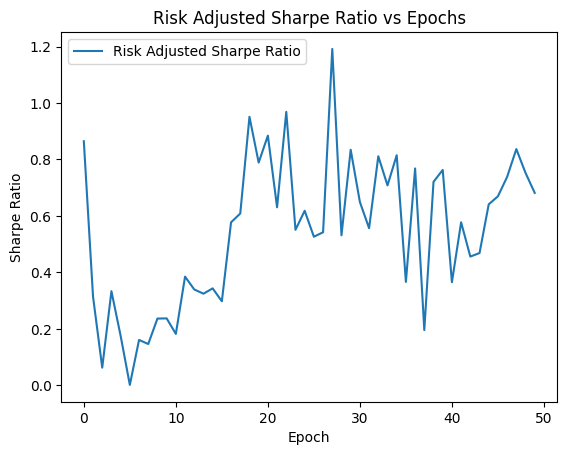

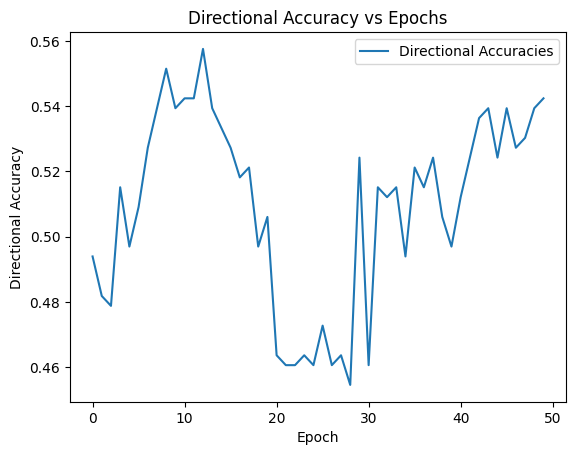

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=60==========


Epoch 1/50: 100%|██████████| 281/281 [00:01<00:00, 176.27it/s]


Epoch 1/50 | Train Loss: 0.0548 | Test Loss: 0.0103
Train RMSE: 0.2340 | Test RMSE: 0.1030
Sharpe Ratio: 0.48706510422223775


Epoch 2/50: 100%|██████████| 281/281 [00:01<00:00, 172.38it/s]


Epoch 2/50 | Train Loss: 0.0183 | Test Loss: 0.0068
Train RMSE: 0.1352 | Test RMSE: 0.0748
Sharpe Ratio: 1.6289474351791804


Epoch 3/50: 100%|██████████| 281/281 [00:01<00:00, 177.54it/s]


Epoch 3/50 | Train Loss: 0.0087 | Test Loss: 0.0019
Train RMSE: 0.0934 | Test RMSE: 0.0433
Sharpe Ratio: 0.10522478028234401


Epoch 4/50: 100%|██████████| 281/281 [00:01<00:00, 176.94it/s]


Epoch 4/50 | Train Loss: 0.0055 | Test Loss: 0.0011
Train RMSE: 0.0739 | Test RMSE: 0.0331
Sharpe Ratio: 0.47229043814400384


Epoch 5/50: 100%|██████████| 281/281 [00:01<00:00, 180.57it/s]


Epoch 5/50 | Train Loss: 0.0039 | Test Loss: 0.0009
Train RMSE: 0.0625 | Test RMSE: 0.0303
Sharpe Ratio: 0.3502154593599911


Epoch 6/50: 100%|██████████| 281/281 [00:01<00:00, 178.33it/s]


Epoch 6/50 | Train Loss: 0.0030 | Test Loss: 0.0006
Train RMSE: 0.0549 | Test RMSE: 0.0253
Sharpe Ratio: 0.201956770257618


Epoch 7/50: 100%|██████████| 281/281 [00:01<00:00, 177.03it/s]


Epoch 7/50 | Train Loss: 0.0024 | Test Loss: 0.0004
Train RMSE: 0.0487 | Test RMSE: 0.0208
Sharpe Ratio: 0.03049388804770577


Epoch 8/50: 100%|██████████| 281/281 [00:01<00:00, 170.40it/s]


Epoch 8/50 | Train Loss: 0.0018 | Test Loss: 0.0003
Train RMSE: 0.0430 | Test RMSE: 0.0174
Sharpe Ratio: 0.012952139729661086


Epoch 9/50: 100%|██████████| 281/281 [00:01<00:00, 175.24it/s]


Epoch 9/50 | Train Loss: 0.0015 | Test Loss: 0.0002
Train RMSE: 0.0382 | Test RMSE: 0.0157
Sharpe Ratio: -0.12374167653071313


Epoch 10/50: 100%|██████████| 281/281 [00:01<00:00, 176.46it/s]


Epoch 10/50 | Train Loss: 0.0012 | Test Loss: 0.0002
Train RMSE: 0.0353 | Test RMSE: 0.0154
Sharpe Ratio: 0.19656048002318458


Epoch 11/50: 100%|██████████| 281/281 [00:01<00:00, 177.06it/s]


Epoch 11/50 | Train Loss: 0.0010 | Test Loss: 0.0002
Train RMSE: 0.0323 | Test RMSE: 0.0140
Sharpe Ratio: 0.16772598981547732


Epoch 12/50: 100%|██████████| 281/281 [00:01<00:00, 179.94it/s]


Epoch 12/50 | Train Loss: 0.0009 | Test Loss: 0.0002
Train RMSE: 0.0300 | Test RMSE: 0.0132
Sharpe Ratio: 0.10194891229798428


Epoch 13/50: 100%|██████████| 281/281 [00:01<00:00, 176.43it/s]


Epoch 13/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0274 | Test RMSE: 0.0128
Sharpe Ratio: 0.11191540057014303


Epoch 14/50: 100%|██████████| 281/281 [00:01<00:00, 173.19it/s]


Epoch 14/50 | Train Loss: 0.0007 | Test Loss: 0.0001
Train RMSE: 0.0257 | Test RMSE: 0.0115
Sharpe Ratio: 0.14389535608410783


Epoch 15/50: 100%|██████████| 281/281 [00:01<00:00, 178.52it/s]


Epoch 15/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0234 | Test RMSE: 0.0120
Sharpe Ratio: 0.1536045332247246


Epoch 16/50: 100%|██████████| 281/281 [00:01<00:00, 176.19it/s]


Epoch 16/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0226 | Test RMSE: 0.0121
Sharpe Ratio: 0.1565906436815643


Epoch 17/50: 100%|██████████| 281/281 [00:01<00:00, 179.32it/s]


Epoch 17/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0211 | Test RMSE: 0.0111
Sharpe Ratio: 0.06908284581923524


Epoch 18/50: 100%|██████████| 281/281 [00:01<00:00, 177.80it/s]


Epoch 18/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0195 | Test RMSE: 0.0108
Sharpe Ratio: 0.08295092530106256


Epoch 19/50: 100%|██████████| 281/281 [00:01<00:00, 177.06it/s]


Epoch 19/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0185 | Test RMSE: 0.0106
Sharpe Ratio: 0.12079852460625244


Epoch 20/50: 100%|██████████| 281/281 [00:01<00:00, 177.12it/s]


Epoch 20/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0179 | Test RMSE: 0.0105
Sharpe Ratio: 0.09880938742643952


Epoch 21/50: 100%|██████████| 281/281 [00:01<00:00, 174.65it/s]


Epoch 21/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0169 | Test RMSE: 0.0103
Sharpe Ratio: 0.14982895530490858


Epoch 22/50: 100%|██████████| 281/281 [00:01<00:00, 175.66it/s]


Epoch 22/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0165 | Test RMSE: 0.0101
Sharpe Ratio: 0.16663236246470098


Epoch 23/50: 100%|██████████| 281/281 [00:01<00:00, 176.63it/s]


Epoch 23/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0158 | Test RMSE: 0.0102
Sharpe Ratio: 0.14287668671501919


Epoch 24/50: 100%|██████████| 281/281 [00:01<00:00, 177.27it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0153 | Test RMSE: 0.0102
Sharpe Ratio: 0.220848021609762


Epoch 25/50: 100%|██████████| 281/281 [00:01<00:00, 176.51it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0149 | Test RMSE: 0.0101
Sharpe Ratio: 0.40125447386613927


Epoch 26/50: 100%|██████████| 281/281 [00:01<00:00, 177.87it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0143 | Test RMSE: 0.0099
Sharpe Ratio: 0.2765469216729857


Epoch 27/50: 100%|██████████| 281/281 [00:01<00:00, 174.32it/s]


Epoch 27/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0138 | Test RMSE: 0.0101
Sharpe Ratio: 0.4978658710411397


Epoch 28/50: 100%|██████████| 281/281 [00:01<00:00, 176.33it/s]


Epoch 28/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0135 | Test RMSE: 0.0099
Sharpe Ratio: 0.5236886399387642


Epoch 29/50: 100%|██████████| 281/281 [00:01<00:00, 176.11it/s]


Epoch 29/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0135 | Test RMSE: 0.0098
Sharpe Ratio: 0.701487518255234


Epoch 30/50: 100%|██████████| 281/281 [00:01<00:00, 175.15it/s]


Epoch 30/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0129 | Test RMSE: 0.0098
Sharpe Ratio: 0.8360255573855444


Epoch 31/50: 100%|██████████| 281/281 [00:01<00:00, 176.91it/s]


Epoch 31/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0127 | Test RMSE: 0.0098
Sharpe Ratio: 0.5914127955370214


Epoch 32/50: 100%|██████████| 281/281 [00:01<00:00, 174.29it/s]


Epoch 32/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0125 | Test RMSE: 0.0098
Sharpe Ratio: 0.7396419788861034


Epoch 33/50: 100%|██████████| 281/281 [00:01<00:00, 174.46it/s]


Epoch 33/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0124 | Test RMSE: 0.0098
Sharpe Ratio: 0.5594484001781813


Epoch 34/50: 100%|██████████| 281/281 [00:01<00:00, 178.45it/s]


Epoch 34/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0122 | Test RMSE: 0.0098
Sharpe Ratio: 0.26785885502751267


Epoch 35/50: 100%|██████████| 281/281 [00:01<00:00, 175.55it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0122 | Test RMSE: 0.0098
Sharpe Ratio: 0.2506615439102881


Epoch 36/50: 100%|██████████| 281/281 [00:01<00:00, 176.93it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0119 | Test RMSE: 0.0098
Sharpe Ratio: 0.49061968162406366


Epoch 37/50: 100%|██████████| 281/281 [00:01<00:00, 173.47it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0099
Sharpe Ratio: 0.11819577151225359


Epoch 38/50: 100%|██████████| 281/281 [00:01<00:00, 174.49it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0098
Sharpe Ratio: 1.064188393764521


Epoch 39/50: 100%|██████████| 281/281 [00:01<00:00, 172.08it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0098
Sharpe Ratio: 0.10765964136223118


Epoch 40/50: 100%|██████████| 281/281 [00:01<00:00, 174.67it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0100
Sharpe Ratio: 0.5765475143623984


Epoch 41/50: 100%|██████████| 281/281 [00:01<00:00, 174.59it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0097
Sharpe Ratio: 0.1865198181845197


Epoch 42/50: 100%|██████████| 281/281 [00:01<00:00, 175.48it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0098
Sharpe Ratio: 0.624717731965549


Epoch 43/50: 100%|██████████| 281/281 [00:01<00:00, 172.57it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0098
Sharpe Ratio: 0.6364781698428791


Epoch 44/50: 100%|██████████| 281/281 [00:01<00:00, 175.91it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0098
Sharpe Ratio: 0.6699510353694863


Epoch 45/50: 100%|██████████| 281/281 [00:01<00:00, 170.42it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0097
Sharpe Ratio: 0.43998862359096463


Epoch 46/50: 100%|██████████| 281/281 [00:01<00:00, 174.98it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0099
Sharpe Ratio: 0.7855796151858805


Epoch 47/50: 100%|██████████| 281/281 [00:01<00:00, 175.90it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0099
Sharpe Ratio: 0.24837006223234867


Epoch 48/50: 100%|██████████| 281/281 [00:01<00:00, 177.34it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0098
Sharpe Ratio: 0.38751700148667223


Epoch 49/50: 100%|██████████| 281/281 [00:01<00:00, 173.45it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0098
Sharpe Ratio: 0.8693939058448314


Epoch 50/50: 100%|██████████| 281/281 [00:01<00:00, 173.39it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0099
Sharpe Ratio: 0.391212892530043


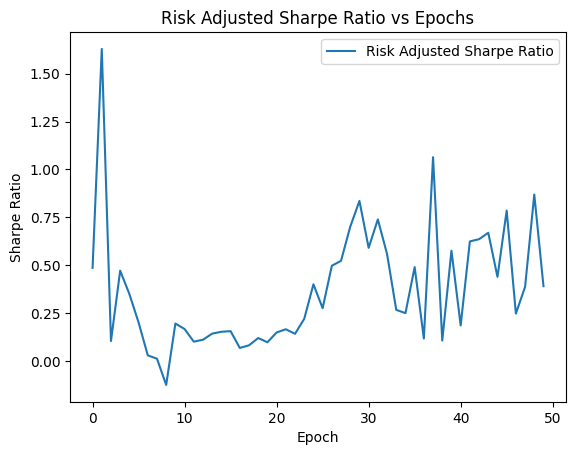

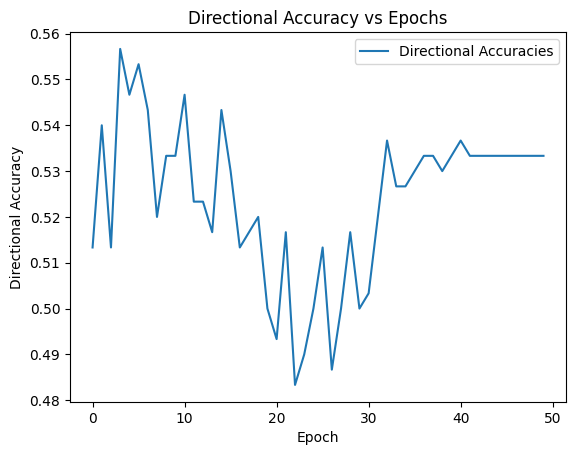

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=90==========


Epoch 1/50: 100%|██████████| 280/280 [00:01<00:00, 163.72it/s]


Epoch 1/50 | Train Loss: 0.0337 | Test Loss: 0.0087
Train RMSE: 0.1835 | Test RMSE: 0.0901
Sharpe Ratio: -0.0470872598147952


Epoch 2/50: 100%|██████████| 280/280 [00:01<00:00, 170.26it/s]


Epoch 2/50 | Train Loss: 0.0087 | Test Loss: 0.0018
Train RMSE: 0.0935 | Test RMSE: 0.0407
Sharpe Ratio: 0.07090048080346488


Epoch 3/50: 100%|██████████| 280/280 [00:01<00:00, 171.00it/s]


Epoch 3/50 | Train Loss: 0.0049 | Test Loss: 0.0012
Train RMSE: 0.0700 | Test RMSE: 0.0328
Sharpe Ratio: -0.046064265020580836


Epoch 4/50: 100%|██████████| 280/280 [00:01<00:00, 170.25it/s]


Epoch 4/50 | Train Loss: 0.0033 | Test Loss: 0.0008
Train RMSE: 0.0571 | Test RMSE: 0.0279
Sharpe Ratio: 0.03790358512628423


Epoch 5/50: 100%|██████████| 280/280 [00:01<00:00, 173.95it/s]


Epoch 5/50 | Train Loss: 0.0027 | Test Loss: 0.0007
Train RMSE: 0.0523 | Test RMSE: 0.0258
Sharpe Ratio: 0.17970220003504864


Epoch 6/50: 100%|██████████| 280/280 [00:01<00:00, 169.18it/s]


Epoch 6/50 | Train Loss: 0.0020 | Test Loss: 0.0004
Train RMSE: 0.0444 | Test RMSE: 0.0195
Sharpe Ratio: 0.1837718976918326


Epoch 7/50: 100%|██████████| 280/280 [00:01<00:00, 168.17it/s]


Epoch 7/50 | Train Loss: 0.0016 | Test Loss: 0.0003
Train RMSE: 0.0398 | Test RMSE: 0.0169
Sharpe Ratio: 0.15928234012082906


Epoch 8/50: 100%|██████████| 280/280 [00:01<00:00, 172.38it/s]


Epoch 8/50 | Train Loss: 0.0013 | Test Loss: 0.0002
Train RMSE: 0.0356 | Test RMSE: 0.0149
Sharpe Ratio: 0.06400769121507474


Epoch 9/50: 100%|██████████| 280/280 [00:01<00:00, 170.56it/s]


Epoch 9/50 | Train Loss: 0.0010 | Test Loss: 0.0002
Train RMSE: 0.0312 | Test RMSE: 0.0148
Sharpe Ratio: 0.0552916409292924


Epoch 10/50: 100%|██████████| 280/280 [00:01<00:00, 170.00it/s]


Epoch 10/50 | Train Loss: 0.0008 | Test Loss: 0.0002
Train RMSE: 0.0282 | Test RMSE: 0.0135
Sharpe Ratio: 0.001815225816376078


Epoch 11/50: 100%|██████████| 280/280 [00:01<00:00, 170.39it/s]


Epoch 11/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0258 | Test RMSE: 0.0126
Sharpe Ratio: -0.009867374925889915


Epoch 12/50: 100%|██████████| 280/280 [00:01<00:00, 167.60it/s]


Epoch 12/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0234 | Test RMSE: 0.0115
Sharpe Ratio: 0.02964624773368825


Epoch 13/50: 100%|██████████| 280/280 [00:01<00:00, 167.07it/s]


Epoch 13/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0225 | Test RMSE: 0.0111
Sharpe Ratio: 0.07935270719480166


Epoch 14/50: 100%|██████████| 280/280 [00:01<00:00, 171.35it/s]


Epoch 14/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0203 | Test RMSE: 0.0115
Sharpe Ratio: 0.04430558311456577


Epoch 15/50: 100%|██████████| 280/280 [00:01<00:00, 169.47it/s]


Epoch 15/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0191 | Test RMSE: 0.0107
Sharpe Ratio: 0.10693659689382008


Epoch 16/50: 100%|██████████| 280/280 [00:01<00:00, 169.91it/s]


Epoch 16/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0182 | Test RMSE: 0.0107
Sharpe Ratio: 0.05386552339874332


Epoch 17/50: 100%|██████████| 280/280 [00:01<00:00, 172.66it/s]


Epoch 17/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0174 | Test RMSE: 0.0105
Sharpe Ratio: 0.034157059924198256


Epoch 18/50: 100%|██████████| 280/280 [00:01<00:00, 168.43it/s]


Epoch 18/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0167 | Test RMSE: 0.0105
Sharpe Ratio: 0.1423851585260213


Epoch 19/50: 100%|██████████| 280/280 [00:01<00:00, 168.50it/s]


Epoch 19/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0160 | Test RMSE: 0.0105
Sharpe Ratio: 0.1115920405769778


Epoch 20/50: 100%|██████████| 280/280 [00:01<00:00, 167.18it/s]


Epoch 20/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0152 | Test RMSE: 0.0103
Sharpe Ratio: 0.17626434262936425


Epoch 21/50: 100%|██████████| 280/280 [00:01<00:00, 168.59it/s]


Epoch 21/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0148 | Test RMSE: 0.0102
Sharpe Ratio: 0.175355338603084


Epoch 22/50: 100%|██████████| 280/280 [00:01<00:00, 168.51it/s]


Epoch 22/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0143 | Test RMSE: 0.0102
Sharpe Ratio: 0.23653772963557176


Epoch 23/50: 100%|██████████| 280/280 [00:01<00:00, 169.87it/s]


Epoch 23/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0142 | Test RMSE: 0.0102
Sharpe Ratio: 0.23373531684650614


Epoch 24/50: 100%|██████████| 280/280 [00:01<00:00, 169.79it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0134 | Test RMSE: 0.0102
Sharpe Ratio: 0.2607604827840982


Epoch 25/50: 100%|██████████| 280/280 [00:01<00:00, 167.78it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0131 | Test RMSE: 0.0104
Sharpe Ratio: 0.41505968573391305


Epoch 26/50: 100%|██████████| 280/280 [00:01<00:00, 171.28it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0131 | Test RMSE: 0.0102
Sharpe Ratio: 0.4333312164421246


Epoch 27/50: 100%|██████████| 280/280 [00:01<00:00, 168.94it/s]


Epoch 27/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0126 | Test RMSE: 0.0102
Sharpe Ratio: 0.3789857781083717


Epoch 28/50: 100%|██████████| 280/280 [00:01<00:00, 172.85it/s]


Epoch 28/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0124 | Test RMSE: 0.0102
Sharpe Ratio: 0.6297139758967609


Epoch 29/50: 100%|██████████| 280/280 [00:01<00:00, 169.01it/s]


Epoch 29/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0123 | Test RMSE: 0.0102
Sharpe Ratio: 0.7726502302403968


Epoch 30/50: 100%|██████████| 280/280 [00:01<00:00, 172.09it/s]


Epoch 30/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0102
Sharpe Ratio: 0.9621987998193736


Epoch 31/50: 100%|██████████| 280/280 [00:01<00:00, 165.60it/s]


Epoch 31/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0119 | Test RMSE: 0.0101
Sharpe Ratio: 1.392418408398011


Epoch 32/50: 100%|██████████| 280/280 [00:01<00:00, 170.78it/s]


Epoch 32/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0102
Sharpe Ratio: 1.0821104109137814


Epoch 33/50: 100%|██████████| 280/280 [00:01<00:00, 170.96it/s]


Epoch 33/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0101
Sharpe Ratio: 1.5375243619059362


Epoch 34/50: 100%|██████████| 280/280 [00:01<00:00, 171.37it/s]


Epoch 34/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0103
Sharpe Ratio: 1.262118041856685


Epoch 35/50: 100%|██████████| 280/280 [00:01<00:00, 169.10it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0101
Sharpe Ratio: 1.558538399758239


Epoch 36/50: 100%|██████████| 280/280 [00:01<00:00, 175.45it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0103
Sharpe Ratio: 1.7320136820288012


Epoch 37/50: 100%|██████████| 280/280 [00:01<00:00, 167.26it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0102
Sharpe Ratio: 1.7706830207710553


Epoch 38/50: 100%|██████████| 280/280 [00:01<00:00, 174.22it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0101
Sharpe Ratio: 1.7190455909005937


Epoch 39/50: 100%|██████████| 280/280 [00:01<00:00, 171.66it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0101
Sharpe Ratio: 1.7042596268830472


Epoch 40/50: 100%|██████████| 280/280 [00:01<00:00, 169.82it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0101
Sharpe Ratio: 1.3933877674164654


Epoch 41/50: 100%|██████████| 280/280 [00:01<00:00, 171.52it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0101
Sharpe Ratio: 1.2652705800841428


Epoch 42/50: 100%|██████████| 280/280 [00:01<00:00, 169.32it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0101
Sharpe Ratio: 1.1495195310972721


Epoch 43/50: 100%|██████████| 280/280 [00:01<00:00, 168.76it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0101
Sharpe Ratio: 0.856668246587132


Epoch 44/50: 100%|██████████| 280/280 [00:01<00:00, 171.03it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0101
Sharpe Ratio: 1.2088607351083693


Epoch 45/50: 100%|██████████| 280/280 [00:01<00:00, 169.89it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0101
Sharpe Ratio: 1.2522513044329082


Epoch 46/50: 100%|██████████| 280/280 [00:01<00:00, 169.79it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0100
Sharpe Ratio: 1.0039158222823457


Epoch 47/50: 100%|██████████| 280/280 [00:01<00:00, 172.21it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0101
Sharpe Ratio: 0.897661750258054


Epoch 48/50: 100%|██████████| 280/280 [00:01<00:00, 168.70it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.6280280760082129


Epoch 49/50: 100%|██████████| 280/280 [00:01<00:00, 166.14it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0103
Sharpe Ratio: 0.7192626427193498


Epoch 50/50: 100%|██████████| 280/280 [00:01<00:00, 170.16it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.9491046471376436


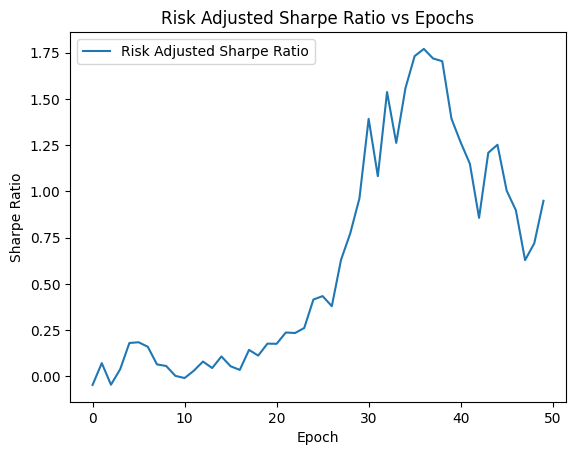

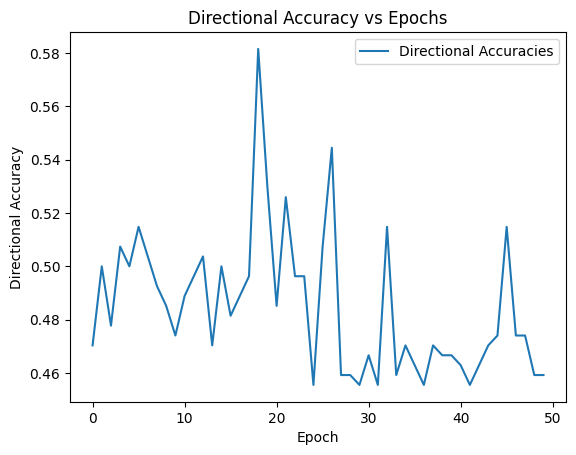

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=120==========


Epoch 1/50: 100%|██████████| 279/279 [00:01<00:00, 163.99it/s]


Epoch 1/50 | Train Loss: 0.0292 | Test Loss: 0.0057
Train RMSE: 0.1710 | Test RMSE: 0.0779
Sharpe Ratio: -0.024358831369119836


Epoch 2/50: 100%|██████████| 279/279 [00:01<00:00, 163.78it/s]


Epoch 2/50 | Train Loss: 0.0084 | Test Loss: 0.0017
Train RMSE: 0.0918 | Test RMSE: 0.0419
Sharpe Ratio: -0.004449999493532127


Epoch 3/50: 100%|██████████| 279/279 [00:01<00:00, 162.80it/s]


Epoch 3/50 | Train Loss: 0.0038 | Test Loss: 0.0008
Train RMSE: 0.0613 | Test RMSE: 0.0280
Sharpe Ratio: 0.034008629206078805


Epoch 4/50: 100%|██████████| 279/279 [00:01<00:00, 159.71it/s]


Epoch 4/50 | Train Loss: 0.0023 | Test Loss: 0.0004
Train RMSE: 0.0475 | Test RMSE: 0.0208
Sharpe Ratio: 0.02815591381363304


Epoch 5/50: 100%|██████████| 279/279 [00:01<00:00, 161.63it/s]


Epoch 5/50 | Train Loss: 0.0015 | Test Loss: 0.0003
Train RMSE: 0.0392 | Test RMSE: 0.0171
Sharpe Ratio: 0.573713910229573


Epoch 6/50: 100%|██████████| 279/279 [00:01<00:00, 160.86it/s]


Epoch 6/50 | Train Loss: 0.0011 | Test Loss: 0.0002
Train RMSE: 0.0336 | Test RMSE: 0.0154
Sharpe Ratio: 1.3118067829994862


Epoch 7/50: 100%|██████████| 279/279 [00:01<00:00, 165.30it/s]


Epoch 7/50 | Train Loss: 0.0009 | Test Loss: 0.0002
Train RMSE: 0.0303 | Test RMSE: 0.0138
Sharpe Ratio: 1.6317152187807955


Epoch 8/50: 100%|██████████| 279/279 [00:01<00:00, 164.90it/s]


Epoch 8/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0271 | Test RMSE: 0.0137
Sharpe Ratio: 1.5791557629792776


Epoch 9/50: 100%|██████████| 279/279 [00:01<00:00, 161.72it/s]


Epoch 9/50 | Train Loss: 0.0006 | Test Loss: 0.0002
Train RMSE: 0.0250 | Test RMSE: 0.0126
Sharpe Ratio: 1.1473330727549766


Epoch 10/50: 100%|██████████| 279/279 [00:01<00:00, 159.95it/s]


Epoch 10/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0233 | Test RMSE: 0.0123
Sharpe Ratio: 1.0822430927324536


Epoch 11/50: 100%|██████████| 279/279 [00:01<00:00, 163.30it/s]


Epoch 11/50 | Train Loss: 0.0005 | Test Loss: 0.0002
Train RMSE: 0.0220 | Test RMSE: 0.0127
Sharpe Ratio: 1.1464286671407666


Epoch 12/50: 100%|██████████| 279/279 [00:01<00:00, 163.14it/s]


Epoch 12/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0205 | Test RMSE: 0.0110
Sharpe Ratio: 0.7978049818368267


Epoch 13/50: 100%|██████████| 279/279 [00:01<00:00, 165.05it/s]


Epoch 13/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0201 | Test RMSE: 0.0116
Sharpe Ratio: 0.784146128011738


Epoch 14/50: 100%|██████████| 279/279 [00:01<00:00, 160.65it/s]


Epoch 14/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0189 | Test RMSE: 0.0112
Sharpe Ratio: 0.8534966493317833


Epoch 15/50: 100%|██████████| 279/279 [00:01<00:00, 163.10it/s]


Epoch 15/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0182 | Test RMSE: 0.0121
Sharpe Ratio: 0.5863317984083254


Epoch 16/50: 100%|██████████| 279/279 [00:01<00:00, 159.30it/s]


Epoch 16/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0173 | Test RMSE: 0.0114
Sharpe Ratio: 0.5246594446902453


Epoch 17/50: 100%|██████████| 279/279 [00:01<00:00, 163.54it/s]


Epoch 17/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0172 | Test RMSE: 0.0106
Sharpe Ratio: 0.5357388947561748


Epoch 18/50: 100%|██████████| 279/279 [00:01<00:00, 164.34it/s]


Epoch 18/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0166 | Test RMSE: 0.0114
Sharpe Ratio: 0.5531437478011229


Epoch 19/50: 100%|██████████| 279/279 [00:01<00:00, 163.75it/s]


Epoch 19/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0157 | Test RMSE: 0.0104
Sharpe Ratio: 0.43441477967131636


Epoch 20/50: 100%|██████████| 279/279 [00:01<00:00, 163.49it/s]


Epoch 20/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0154 | Test RMSE: 0.0105
Sharpe Ratio: 0.534612134237869


Epoch 21/50: 100%|██████████| 279/279 [00:01<00:00, 161.28it/s]


Epoch 21/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0150 | Test RMSE: 0.0105
Sharpe Ratio: 0.982352053803263


Epoch 22/50: 100%|██████████| 279/279 [00:01<00:00, 162.86it/s]


Epoch 22/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0145 | Test RMSE: 0.0104
Sharpe Ratio: 0.6562593555315092


Epoch 23/50: 100%|██████████| 279/279 [00:01<00:00, 160.89it/s]


Epoch 23/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0141 | Test RMSE: 0.0104
Sharpe Ratio: 0.8200225239845524


Epoch 24/50: 100%|██████████| 279/279 [00:01<00:00, 163.07it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0138 | Test RMSE: 0.0103
Sharpe Ratio: 0.3610697043339521


Epoch 25/50: 100%|██████████| 279/279 [00:01<00:00, 163.25it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0131 | Test RMSE: 0.0103
Sharpe Ratio: 0.48169845155563057


Epoch 26/50: 100%|██████████| 279/279 [00:01<00:00, 163.52it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0130 | Test RMSE: 0.0103
Sharpe Ratio: 0.4091157943775783


Epoch 27/50: 100%|██████████| 279/279 [00:01<00:00, 160.60it/s]


Epoch 27/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0129 | Test RMSE: 0.0102
Sharpe Ratio: 0.577136806763117


Epoch 28/50: 100%|██████████| 279/279 [00:01<00:00, 162.12it/s]


Epoch 28/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0128 | Test RMSE: 0.0102
Sharpe Ratio: 0.3125195595169471


Epoch 29/50: 100%|██████████| 279/279 [00:01<00:00, 163.80it/s]


Epoch 29/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0125 | Test RMSE: 0.0102
Sharpe Ratio: 0.23203913651086108


Epoch 30/50: 100%|██████████| 279/279 [00:01<00:00, 161.94it/s]


Epoch 30/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0122 | Test RMSE: 0.0103
Sharpe Ratio: 1.0473958493460103


Epoch 31/50: 100%|██████████| 279/279 [00:01<00:00, 158.76it/s]


Epoch 31/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0102
Sharpe Ratio: 0.48989970031974517


Epoch 32/50: 100%|██████████| 279/279 [00:01<00:00, 162.92it/s]


Epoch 32/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0120 | Test RMSE: 0.0102
Sharpe Ratio: 0.7972566868445797


Epoch 33/50: 100%|██████████| 279/279 [00:01<00:00, 161.06it/s]


Epoch 33/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0119 | Test RMSE: 0.0103
Sharpe Ratio: 0.8035658349394164


Epoch 34/50: 100%|██████████| 279/279 [00:01<00:00, 160.05it/s]


Epoch 34/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0118 | Test RMSE: 0.0102
Sharpe Ratio: 0.4594135563058565


Epoch 35/50: 100%|██████████| 279/279 [00:01<00:00, 163.85it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0102
Sharpe Ratio: 0.5034819318433014


Epoch 36/50: 100%|██████████| 279/279 [00:01<00:00, 161.06it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0102
Sharpe Ratio: 0.5565668313756157


Epoch 37/50: 100%|██████████| 279/279 [00:01<00:00, 160.44it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0103
Sharpe Ratio: 0.36852961299247544


Epoch 38/50: 100%|██████████| 279/279 [00:01<00:00, 161.79it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0102
Sharpe Ratio: 0.43883824106265645


Epoch 39/50: 100%|██████████| 279/279 [00:01<00:00, 161.61it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0103
Sharpe Ratio: 0.28273833876641086


Epoch 40/50: 100%|██████████| 279/279 [00:01<00:00, 163.38it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0103
Sharpe Ratio: 0.3706296953374904


Epoch 41/50: 100%|██████████| 279/279 [00:01<00:00, 163.40it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0102
Sharpe Ratio: 0.2980964312203491


Epoch 42/50: 100%|██████████| 279/279 [00:01<00:00, 164.11it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0102
Sharpe Ratio: 0.3029388006024493


Epoch 43/50: 100%|██████████| 279/279 [00:01<00:00, 162.57it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0103
Sharpe Ratio: 0.3922783353444704


Epoch 44/50: 100%|██████████| 279/279 [00:01<00:00, 159.08it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0102
Sharpe Ratio: 0.32167127683018165


Epoch 45/50: 100%|██████████| 279/279 [00:01<00:00, 159.81it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0102
Sharpe Ratio: 0.7852336990388809


Epoch 46/50: 100%|██████████| 279/279 [00:01<00:00, 158.52it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.46264876665521454


Epoch 47/50: 100%|██████████| 279/279 [00:01<00:00, 159.32it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.431445776972027


Epoch 48/50: 100%|██████████| 279/279 [00:01<00:00, 162.46it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.3701710857931155


Epoch 49/50: 100%|██████████| 279/279 [00:01<00:00, 161.58it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.3640167038584978


Epoch 50/50: 100%|██████████| 279/279 [00:01<00:00, 158.25it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0102
Sharpe Ratio: 0.29579193055500574


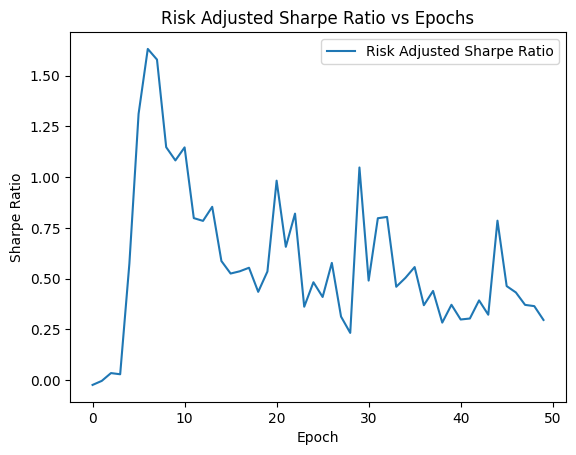

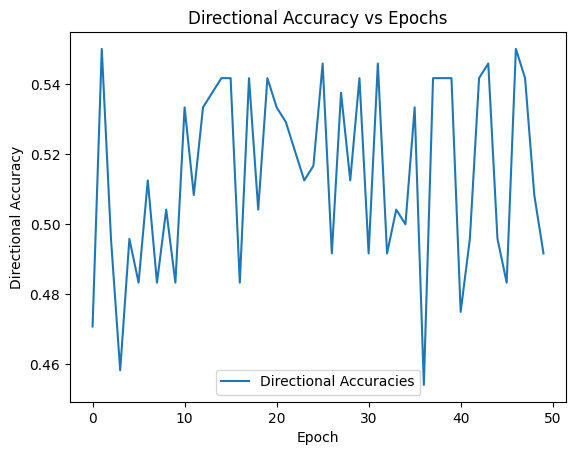

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=150==========


Epoch 1/50: 100%|██████████| 279/279 [00:01<00:00, 151.08it/s]


Epoch 1/50 | Train Loss: 0.0235 | Test Loss: 0.0044
Train RMSE: 0.1533 | Test RMSE: 0.0653
Sharpe Ratio: 0.9096160042271728


Epoch 2/50: 100%|██████████| 279/279 [00:01<00:00, 150.83it/s]


Epoch 2/50 | Train Loss: 0.0066 | Test Loss: 0.0021
Train RMSE: 0.0812 | Test RMSE: 0.0437
Sharpe Ratio: 0.3015088865911173


Epoch 3/50: 100%|██████████| 279/279 [00:01<00:00, 149.15it/s]


Epoch 3/50 | Train Loss: 0.0030 | Test Loss: 0.0006
Train RMSE: 0.0547 | Test RMSE: 0.0239
Sharpe Ratio: 0.03935172174333245


Epoch 4/50: 100%|██████████| 279/279 [00:01<00:00, 152.00it/s]


Epoch 4/50 | Train Loss: 0.0020 | Test Loss: 0.0005
Train RMSE: 0.0450 | Test RMSE: 0.0215
Sharpe Ratio: 0.0885232242186365


Epoch 5/50: 100%|██████████| 279/279 [00:01<00:00, 143.17it/s]


Epoch 5/50 | Train Loss: 0.0015 | Test Loss: 0.0003
Train RMSE: 0.0379 | Test RMSE: 0.0167
Sharpe Ratio: 0.09460643010630732


Epoch 6/50: 100%|██████████| 279/279 [00:01<00:00, 151.63it/s]


Epoch 6/50 | Train Loss: 0.0011 | Test Loss: 0.0002
Train RMSE: 0.0332 | Test RMSE: 0.0146
Sharpe Ratio: 0.154151728126447


Epoch 7/50: 100%|██████████| 279/279 [00:01<00:00, 151.28it/s]


Epoch 7/50 | Train Loss: 0.0009 | Test Loss: 0.0002
Train RMSE: 0.0299 | Test RMSE: 0.0137
Sharpe Ratio: 0.3769965158321924


Epoch 8/50: 100%|██████████| 279/279 [00:01<00:00, 152.01it/s]


Epoch 8/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0271 | Test RMSE: 0.0127
Sharpe Ratio: 0.6717570295891016


Epoch 9/50: 100%|██████████| 279/279 [00:01<00:00, 153.12it/s]


Epoch 9/50 | Train Loss: 0.0006 | Test Loss: 0.0001
Train RMSE: 0.0252 | Test RMSE: 0.0122
Sharpe Ratio: 0.9651626992873037


Epoch 10/50: 100%|██████████| 279/279 [00:01<00:00, 147.31it/s]


Epoch 10/50 | Train Loss: 0.0006 | Test Loss: 0.0001
Train RMSE: 0.0235 | Test RMSE: 0.0120
Sharpe Ratio: 0.9132104611710737


Epoch 11/50: 100%|██████████| 279/279 [00:01<00:00, 142.03it/s]


Epoch 11/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0214 | Test RMSE: 0.0120
Sharpe Ratio: 0.8568288638016993


Epoch 12/50: 100%|██████████| 279/279 [00:01<00:00, 149.54it/s]


Epoch 12/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0207 | Test RMSE: 0.0114
Sharpe Ratio: 0.8380087149335084


Epoch 13/50: 100%|██████████| 279/279 [00:01<00:00, 151.02it/s]


Epoch 13/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0191 | Test RMSE: 0.0112
Sharpe Ratio: 0.9760590248302198


Epoch 14/50: 100%|██████████| 279/279 [00:01<00:00, 149.85it/s]


Epoch 14/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0183 | Test RMSE: 0.0117
Sharpe Ratio: 0.9746265267851886


Epoch 15/50: 100%|██████████| 279/279 [00:01<00:00, 151.29it/s]


Epoch 15/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0173 | Test RMSE: 0.0112
Sharpe Ratio: 0.9867608581282298


Epoch 16/50: 100%|██████████| 279/279 [00:01<00:00, 147.49it/s]


Epoch 16/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0167 | Test RMSE: 0.0111
Sharpe Ratio: 0.6192882265249491


Epoch 17/50: 100%|██████████| 279/279 [00:01<00:00, 147.65it/s]


Epoch 17/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0158 | Test RMSE: 0.0111
Sharpe Ratio: 0.44890608207520005


Epoch 18/50: 100%|██████████| 279/279 [00:01<00:00, 147.75it/s]


Epoch 18/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0152 | Test RMSE: 0.0109
Sharpe Ratio: 0.8917954484996808


Epoch 19/50: 100%|██████████| 279/279 [00:01<00:00, 149.35it/s]


Epoch 19/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0146 | Test RMSE: 0.0108
Sharpe Ratio: 0.8205400234088536


Epoch 20/50: 100%|██████████| 279/279 [00:01<00:00, 141.38it/s]


Epoch 20/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0142 | Test RMSE: 0.0113
Sharpe Ratio: 0.43707144947671317


Epoch 21/50: 100%|██████████| 279/279 [00:01<00:00, 141.44it/s]


Epoch 21/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0137 | Test RMSE: 0.0107
Sharpe Ratio: 0.38657413178673133


Epoch 22/50: 100%|██████████| 279/279 [00:01<00:00, 147.43it/s]


Epoch 22/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0133 | Test RMSE: 0.0107
Sharpe Ratio: 0.673057801021221


Epoch 23/50: 100%|██████████| 279/279 [00:01<00:00, 150.03it/s]


Epoch 23/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0131 | Test RMSE: 0.0106
Sharpe Ratio: 0.9185998310166058


Epoch 24/50: 100%|██████████| 279/279 [00:01<00:00, 150.05it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0128 | Test RMSE: 0.0106
Sharpe Ratio: 0.761587993004081


Epoch 25/50: 100%|██████████| 279/279 [00:01<00:00, 149.58it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0125 | Test RMSE: 0.0106
Sharpe Ratio: 0.40124012017455274


Epoch 26/50: 100%|██████████| 279/279 [00:01<00:00, 145.93it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0123 | Test RMSE: 0.0105
Sharpe Ratio: 1.209651417496968


Epoch 27/50: 100%|██████████| 279/279 [00:01<00:00, 148.89it/s]


Epoch 27/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0121 | Test RMSE: 0.0105
Sharpe Ratio: 0.9388685671179986


Epoch 28/50: 100%|██████████| 279/279 [00:01<00:00, 149.90it/s]


Epoch 28/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0120 | Test RMSE: 0.0105
Sharpe Ratio: 1.54237985171736


Epoch 29/50: 100%|██████████| 279/279 [00:01<00:00, 149.49it/s]


Epoch 29/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0119 | Test RMSE: 0.0107
Sharpe Ratio: 1.5651030411542015


Epoch 30/50: 100%|██████████| 279/279 [00:01<00:00, 149.03it/s]


Epoch 30/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0105
Sharpe Ratio: 0.7263494163782082


Epoch 31/50: 100%|██████████| 279/279 [00:01<00:00, 143.37it/s]


Epoch 31/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0106
Sharpe Ratio: 2.1143056680000853


Epoch 32/50: 100%|██████████| 279/279 [00:01<00:00, 150.24it/s]


Epoch 32/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0105
Sharpe Ratio: 1.7258984450962875


Epoch 33/50: 100%|██████████| 279/279 [00:01<00:00, 146.42it/s]


Epoch 33/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0105
Sharpe Ratio: 1.5514874931785847


Epoch 34/50: 100%|██████████| 279/279 [00:01<00:00, 149.78it/s]


Epoch 34/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0106
Sharpe Ratio: 1.845690671144192


Epoch 35/50: 100%|██████████| 279/279 [00:01<00:00, 145.98it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0107
Sharpe Ratio: 1.9439630464320408


Epoch 36/50: 100%|██████████| 279/279 [00:01<00:00, 140.64it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0106
Sharpe Ratio: 2.3594011632166327


Epoch 37/50: 100%|██████████| 279/279 [00:01<00:00, 149.63it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0105
Sharpe Ratio: 2.415029346270684


Epoch 38/50: 100%|██████████| 279/279 [00:01<00:00, 151.35it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0106
Sharpe Ratio: 1.5862559724782064


Epoch 39/50: 100%|██████████| 279/279 [00:01<00:00, 150.95it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0106
Sharpe Ratio: 1.0293635779200736


Epoch 40/50: 100%|██████████| 279/279 [00:01<00:00, 152.19it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0106
Sharpe Ratio: 0.4319518957786922


Epoch 41/50: 100%|██████████| 279/279 [00:01<00:00, 152.46it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0108
Sharpe Ratio: 1.6818828156069894


Epoch 42/50: 100%|██████████| 279/279 [00:01<00:00, 150.17it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0105
Sharpe Ratio: 0.7656500051846854


Epoch 43/50: 100%|██████████| 279/279 [00:01<00:00, 153.11it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0109
Sharpe Ratio: 2.0172075809301337


Epoch 44/50: 100%|██████████| 279/279 [00:01<00:00, 151.92it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0107
Sharpe Ratio: 1.69939275410588


Epoch 45/50: 100%|██████████| 279/279 [00:01<00:00, 147.60it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0109 | Test RMSE: 0.0106
Sharpe Ratio: 2.268971416597908


Epoch 46/50: 100%|██████████| 279/279 [00:01<00:00, 148.18it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0109 | Test RMSE: 0.0107
Sharpe Ratio: 2.0820977354904553


Epoch 47/50: 100%|██████████| 279/279 [00:01<00:00, 146.65it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0109 | Test RMSE: 0.0105
Sharpe Ratio: 2.315316021066633


Epoch 48/50: 100%|██████████| 279/279 [00:01<00:00, 150.15it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0109 | Test RMSE: 0.0105
Sharpe Ratio: 2.3181280187968154


Epoch 49/50: 100%|██████████| 279/279 [00:01<00:00, 146.72it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0109 | Test RMSE: 0.0105
Sharpe Ratio: 2.0059271343913907


Epoch 50/50: 100%|██████████| 279/279 [00:01<00:00, 150.42it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0109
Sharpe Ratio: 0.45544281200001613


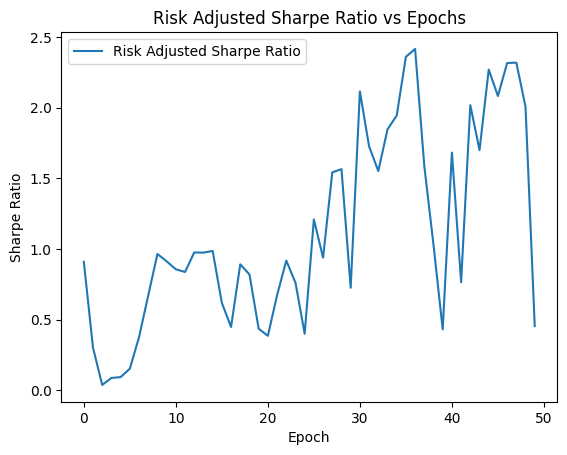

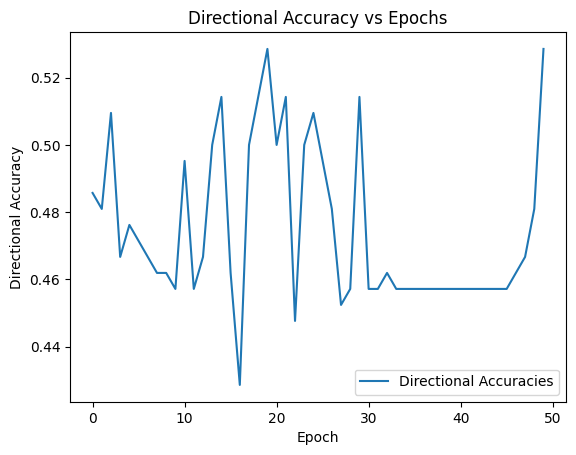

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(






=========Sequence Length=180==========


Epoch 1/50: 100%|██████████| 278/278 [00:02<00:00, 136.47it/s]


Epoch 1/50 | Train Loss: 0.0574 | Test Loss: 0.0132
Train RMSE: 0.2396 | Test RMSE: 0.1180
Sharpe Ratio: 0.2510306228163742


Epoch 2/50: 100%|██████████| 278/278 [00:02<00:00, 135.17it/s]


Epoch 2/50 | Train Loss: 0.0186 | Test Loss: 0.0050
Train RMSE: 0.1366 | Test RMSE: 0.0715
Sharpe Ratio: -0.0018106351259480945


Epoch 3/50: 100%|██████████| 278/278 [00:02<00:00, 136.26it/s]


Epoch 3/50 | Train Loss: 0.0094 | Test Loss: 0.0020
Train RMSE: 0.0967 | Test RMSE: 0.0459
Sharpe Ratio: -0.022234881173934788


Epoch 4/50: 100%|██████████| 278/278 [00:02<00:00, 136.31it/s]


Epoch 4/50 | Train Loss: 0.0056 | Test Loss: 0.0011
Train RMSE: 0.0749 | Test RMSE: 0.0330
Sharpe Ratio: 0.025542395940258724


Epoch 5/50: 100%|██████████| 278/278 [00:02<00:00, 136.72it/s]


Epoch 5/50 | Train Loss: 0.0037 | Test Loss: 0.0006
Train RMSE: 0.0610 | Test RMSE: 0.0253
Sharpe Ratio: -0.0030087036910430107


Epoch 6/50: 100%|██████████| 278/278 [00:02<00:00, 136.43it/s]


Epoch 6/50 | Train Loss: 0.0028 | Test Loss: 0.0006
Train RMSE: 0.0529 | Test RMSE: 0.0244
Sharpe Ratio: 0.3030999616456071


Epoch 7/50: 100%|██████████| 278/278 [00:02<00:00, 135.22it/s]


Epoch 7/50 | Train Loss: 0.0022 | Test Loss: 0.0004
Train RMSE: 0.0468 | Test RMSE: 0.0198
Sharpe Ratio: 0.7876257316752716


Epoch 8/50: 100%|██████████| 278/278 [00:02<00:00, 136.79it/s]


Epoch 8/50 | Train Loss: 0.0016 | Test Loss: 0.0003
Train RMSE: 0.0398 | Test RMSE: 0.0166
Sharpe Ratio: 1.0200906410616


Epoch 9/50: 100%|██████████| 278/278 [00:02<00:00, 136.63it/s]


Epoch 9/50 | Train Loss: 0.0013 | Test Loss: 0.0002
Train RMSE: 0.0359 | Test RMSE: 0.0152
Sharpe Ratio: 1.4458252529364584


Epoch 10/50: 100%|██████████| 278/278 [00:02<00:00, 136.29it/s]


Epoch 10/50 | Train Loss: 0.0010 | Test Loss: 0.0002
Train RMSE: 0.0322 | Test RMSE: 0.0144
Sharpe Ratio: 1.650305177388844


Epoch 11/50: 100%|██████████| 278/278 [00:02<00:00, 135.45it/s]


Epoch 11/50 | Train Loss: 0.0008 | Test Loss: 0.0002
Train RMSE: 0.0289 | Test RMSE: 0.0131
Sharpe Ratio: 2.11847650262783


Epoch 12/50: 100%|██████████| 278/278 [00:02<00:00, 134.92it/s]


Epoch 12/50 | Train Loss: 0.0007 | Test Loss: 0.0002
Train RMSE: 0.0265 | Test RMSE: 0.0126
Sharpe Ratio: 2.441901414152529


Epoch 13/50: 100%|██████████| 278/278 [00:02<00:00, 136.31it/s]


Epoch 13/50 | Train Loss: 0.0006 | Test Loss: 0.0001
Train RMSE: 0.0239 | Test RMSE: 0.0121
Sharpe Ratio: 2.4613104080645276


Epoch 14/50: 100%|██████████| 278/278 [00:02<00:00, 132.37it/s]


Epoch 14/50 | Train Loss: 0.0005 | Test Loss: 0.0001
Train RMSE: 0.0224 | Test RMSE: 0.0119
Sharpe Ratio: 2.449754802308974


Epoch 15/50: 100%|██████████| 278/278 [00:02<00:00, 136.29it/s]


Epoch 15/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0209 | Test RMSE: 0.0113
Sharpe Ratio: 2.3162023288927696


Epoch 16/50: 100%|██████████| 278/278 [00:02<00:00, 134.69it/s]


Epoch 16/50 | Train Loss: 0.0004 | Test Loss: 0.0001
Train RMSE: 0.0196 | Test RMSE: 0.0111
Sharpe Ratio: 2.4043063420522635


Epoch 17/50: 100%|██████████| 278/278 [00:02<00:00, 137.04it/s]


Epoch 17/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0183 | Test RMSE: 0.0111
Sharpe Ratio: 2.562260043334786


Epoch 18/50: 100%|██████████| 278/278 [00:02<00:00, 136.96it/s]


Epoch 18/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0177 | Test RMSE: 0.0116
Sharpe Ratio: 1.6888463763505863


Epoch 19/50: 100%|██████████| 278/278 [00:02<00:00, 137.53it/s]


Epoch 19/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0167 | Test RMSE: 0.0109
Sharpe Ratio: 1.7435153238245926


Epoch 20/50: 100%|██████████| 278/278 [00:02<00:00, 137.01it/s]


Epoch 20/50 | Train Loss: 0.0003 | Test Loss: 0.0001
Train RMSE: 0.0159 | Test RMSE: 0.0107
Sharpe Ratio: 0.9809767112091929


Epoch 21/50: 100%|██████████| 278/278 [00:02<00:00, 134.92it/s]


Epoch 21/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0153 | Test RMSE: 0.0109
Sharpe Ratio: 0.9526493346981711


Epoch 22/50: 100%|██████████| 278/278 [00:02<00:00, 137.81it/s]


Epoch 22/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0146 | Test RMSE: 0.0109
Sharpe Ratio: 0.8598139901972036


Epoch 23/50: 100%|██████████| 278/278 [00:02<00:00, 136.99it/s]


Epoch 23/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0142 | Test RMSE: 0.0107
Sharpe Ratio: 0.8213316090511473


Epoch 24/50: 100%|██████████| 278/278 [00:02<00:00, 136.76it/s]


Epoch 24/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0138 | Test RMSE: 0.0106
Sharpe Ratio: 0.5698468707218672


Epoch 25/50: 100%|██████████| 278/278 [00:02<00:00, 136.43it/s]


Epoch 25/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0135 | Test RMSE: 0.0106
Sharpe Ratio: 0.5442411363368777


Epoch 26/50: 100%|██████████| 278/278 [00:02<00:00, 135.89it/s]


Epoch 26/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0130 | Test RMSE: 0.0106
Sharpe Ratio: 0.28684217562910913


Epoch 27/50: 100%|██████████| 278/278 [00:02<00:00, 136.81it/s]


Epoch 27/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0128 | Test RMSE: 0.0104
Sharpe Ratio: 0.22663880473305245


Epoch 28/50: 100%|██████████| 278/278 [00:02<00:00, 134.36it/s]


Epoch 28/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0126 | Test RMSE: 0.0103
Sharpe Ratio: 0.1103570093613247


Epoch 29/50: 100%|██████████| 278/278 [00:02<00:00, 137.91it/s]


Epoch 29/50 | Train Loss: 0.0002 | Test Loss: 0.0001
Train RMSE: 0.0124 | Test RMSE: 0.0104
Sharpe Ratio: 0.3988681671260011


Epoch 30/50: 100%|██████████| 278/278 [00:02<00:00, 136.37it/s]


Epoch 30/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0122 | Test RMSE: 0.0103
Sharpe Ratio: 0.3445001129852654


Epoch 31/50: 100%|██████████| 278/278 [00:02<00:00, 135.07it/s]


Epoch 31/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0120 | Test RMSE: 0.0103
Sharpe Ratio: 1.4539392775615219


Epoch 32/50: 100%|██████████| 278/278 [00:02<00:00, 137.17it/s]


Epoch 32/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0103
Sharpe Ratio: 2.145358492579143


Epoch 33/50: 100%|██████████| 278/278 [00:02<00:00, 137.47it/s]


Epoch 33/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0103
Sharpe Ratio: 2.2260939693285398


Epoch 34/50: 100%|██████████| 278/278 [00:02<00:00, 137.59it/s]


Epoch 34/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0117 | Test RMSE: 0.0103
Sharpe Ratio: 2.383453537012364


Epoch 35/50: 100%|██████████| 278/278 [00:02<00:00, 137.55it/s]


Epoch 35/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0116 | Test RMSE: 0.0103
Sharpe Ratio: 2.3103292606693255


Epoch 36/50: 100%|██████████| 278/278 [00:02<00:00, 135.88it/s]


Epoch 36/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0103
Sharpe Ratio: 2.3745012442695845


Epoch 37/50: 100%|██████████| 278/278 [00:02<00:00, 136.99it/s]


Epoch 37/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0115 | Test RMSE: 0.0103
Sharpe Ratio: 1.4430185057508131


Epoch 38/50: 100%|██████████| 278/278 [00:02<00:00, 137.58it/s]


Epoch 38/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0114 | Test RMSE: 0.0103
Sharpe Ratio: 1.7780208614239548


Epoch 39/50: 100%|██████████| 278/278 [00:02<00:00, 137.47it/s]


Epoch 39/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0103
Sharpe Ratio: 0.7249116175377652


Epoch 40/50: 100%|██████████| 278/278 [00:02<00:00, 135.94it/s]


Epoch 40/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0103
Sharpe Ratio: 1.6544983990430082


Epoch 41/50: 100%|██████████| 278/278 [00:02<00:00, 135.87it/s]


Epoch 41/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0113 | Test RMSE: 0.0103
Sharpe Ratio: 1.226255329010578


Epoch 42/50: 100%|██████████| 278/278 [00:02<00:00, 136.74it/s]


Epoch 42/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0112 | Test RMSE: 0.0103
Sharpe Ratio: 1.3502064992247211


Epoch 43/50: 100%|██████████| 278/278 [00:02<00:00, 137.14it/s]


Epoch 43/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0104
Sharpe Ratio: 1.8973026843112673


Epoch 44/50: 100%|██████████| 278/278 [00:02<00:00, 137.39it/s]


Epoch 44/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0104
Sharpe Ratio: 0.26475496246233177


Epoch 45/50: 100%|██████████| 278/278 [00:02<00:00, 135.40it/s]


Epoch 45/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0111 | Test RMSE: 0.0104
Sharpe Ratio: 0.465186416254782


Epoch 46/50: 100%|██████████| 278/278 [00:02<00:00, 132.55it/s]


Epoch 46/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0104
Sharpe Ratio: 0.052734292997309945


Epoch 47/50: 100%|██████████| 278/278 [00:02<00:00, 138.24it/s]


Epoch 47/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0103
Sharpe Ratio: 0.3398614087880079


Epoch 48/50: 100%|██████████| 278/278 [00:02<00:00, 137.06it/s]


Epoch 48/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0103
Sharpe Ratio: 0.2251078905378839


Epoch 49/50: 100%|██████████| 278/278 [00:02<00:00, 137.20it/s]


Epoch 49/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0104
Sharpe Ratio: 0.5876508422874566


Epoch 50/50: 100%|██████████| 278/278 [00:02<00:00, 135.48it/s]


Epoch 50/50 | Train Loss: 0.0001 | Test Loss: 0.0001
Train RMSE: 0.0110 | Test RMSE: 0.0103
Sharpe Ratio: 0.29557758757241176


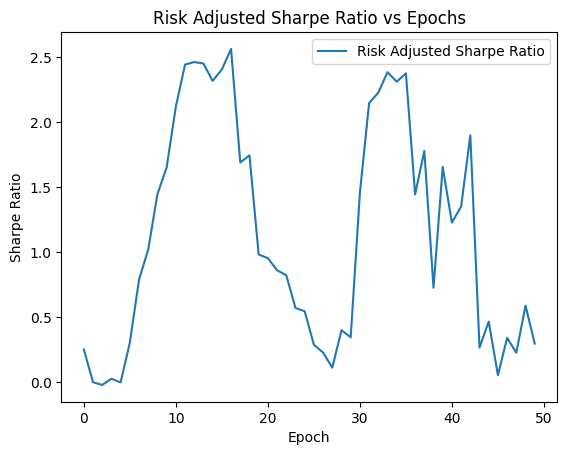

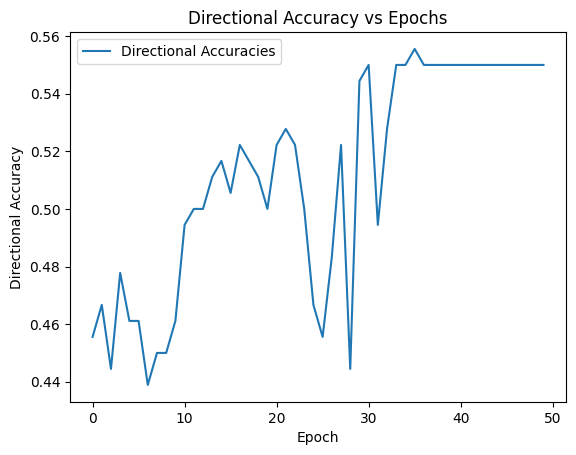

In [96]:
sequence_lengths = [30, 60, 90, 120, 150, 180]
for seq in sequence_lengths:
    train_seq_dataset = SequentialDataset(X_train_final,y_train, seq)
    test_seq_dataset = SequentialDataset(X_test_final, y_test, seq)
    
    train_loader = DataLoader(train_seq_dataset, batch_size=32, shuffle=False, drop_last=False)
    test_loader = DataLoader(test_seq_dataset, batch_size=32, shuffle=False, drop_last=False)
    print(f"\n\n\n\n=========Sequence Length={seq}==========")
    sharpe_ratios = []
    directional_acc_lst = []

    model = LSTM_Architecture(input_dim=INPUT_DIM, 
                              hidden_size_1=HIDDEN_SIZE_1,
                              hidden_size_2=HIDDEN_SIZE_2,
                              hidden_size_3=HIDDEN_SIZE_3, 
                              mlp_output_dim=1, dropout=DROPOUT).to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    model_training(model, optimizer, criterion, train_loader, test_loader, seq, epochs=50)

    plot_sharpe_ratio(sharpe_ratios)
    plot_directional_accuracy(directional_acc_lst)

In [97]:
# rf_importances_sorted.plot(kind='bar', figsize=(10,5), title='Random Forest Feature Importances')
# plt.show()

# xgb_importances_sorted.plot(kind='bar', figsize=(10,5), title='XGBoost Feature Importances')
# plt.show()